# Optimization Methods

Until now, you've always used Gradient Descent to update the parameters and minimize the cost. In this notebook, you will learn more advanced optimization methods that can speed up learning and perhaps even get you to a better final value for the cost function. Having a good optimization algorithm can be the difference between waiting days vs. just a few hours to get a good result. 

Gradient descent goes "downhill" on a cost function $J$. Think of it as trying to do this: 
<img src="images/cost.jpg" style="width:650px;height:300px;">
<caption><center> <u> **Figure 1** </u>: **Minimizing the cost is like finding the lowest point in a hilly landscape**<br> At each step of the training, you update your parameters following a certain direction to try to get to the lowest possible point. </center></caption>

**Notations**: As usual, $\frac{\partial J}{\partial a } = $ `da` for any variable `a`.

To get started, run the following code to import the libraries you will need.

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import math
import sklearn
import sklearn.datasets

from opt_utils import load_params_and_grads, initialize_parameters, forward_propagation, backward_propagation
from opt_utils import compute_cost, predict, predict_dec, plot_decision_boundary, load_dataset
from testCases import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

import inspect
import re


def describe(arg):
    frame = inspect.currentframe()
    callerframeinfo = inspect.getframeinfo(frame.f_back)
    try:
        context = inspect.getframeinfo(frame.f_back).code_context
        caller_lines = ''.join([line.strip() for line in context])
        m = re.search(r'describe\s*\((.+?)\)$', caller_lines)
        if m:
            caller_lines = m.group(1)
            position = str(callerframeinfo.filename) + "@" + str(callerframeinfo.lineno)
            
            # Add additional info such as array shape or string length
            additional = ''
            if hasattr(arg, "shape"):
                additional += "[shape={}]".format(arg.shape)
            elif hasattr(arg, "__len__"):  # shape includes length information
                additional += "[len={}]".format(len(arg))
            
            # Use str() representation if it is printable
            str_arg = str(arg)
            str_arg = str_arg if str_arg.isprintable() else repr(arg)
            
            print(position, "describe(" + caller_lines + ") = ", end='')
            print(arg.__class__.__name__ + "(" + str_arg + ")", additional)
        else:
            print("Describe: couldn't find caller context")
    
    finally:
        del frame
        del callerframeinfo

## 1 - Gradient Descent

A simple optimization method in machine learning is gradient descent (GD). When you take gradient steps with respect to all $m$ examples on each step, it is also called Batch Gradient Descent. 

**Warm-up exercise**: Implement the gradient descent update rule. The  gradient descent rule is, for $l = 1, ..., L$: 
$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{1}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{2}$$

where L is the number of layers and $\alpha$ is the learning rate. All parameters should be stored in the `parameters` dictionary. Note that the iterator `l` starts at 0 in the `for` loop while the first parameters are $W^{[1]}$ and $b^{[1]}$. You need to shift `l` to `l+1` when coding.

In [64]:
# GRADED FUNCTION: update_parameters_with_gd

def update_parameters_with_gd(parameters, grads, learning_rate):
    """
    Update parameters using one step of gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters to be updated:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients to update each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    learning_rate -- the learning rate, scalar.
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """

    L = len(parameters) // 2 # number of layers in the neural networks

    # Update rule for each parameter
    for l in range(L):
        ### START CODE HERE ### (approx. 2 lines)
        parameters["W" + str(l+1)] -= learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] -= learning_rate * grads["db" + str(l+1)]
        ### END CODE HERE ###
        
    return parameters

In [65]:
parameters, grads, learning_rate = update_parameters_with_gd_test_case()

parameters = update_parameters_with_gd(parameters, grads, learning_rate)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.63535156 -0.62320365 -0.53718766]
 [-1.07799357  0.85639907 -2.29470142]]
b1 = [[ 1.74604067]
 [-0.75184921]]
W2 = [[ 0.32171798 -0.25467393  1.46902454]
 [-2.05617317 -0.31554548 -0.3756023 ]
 [ 1.1404819  -1.09976462 -0.1612551 ]]
b2 = [[-0.88020257]
 [ 0.02561572]
 [ 0.57539477]]


**Expected Output**:

<table> 
    <tr>
    <td > **W1** </td> 
           <td > [[ 1.63535156 -0.62320365 -0.53718766]
 [-1.07799357  0.85639907 -2.29470142]] </td> 
    </tr> 
    
    <tr>
    <td > **b1** </td> 
           <td > [[ 1.74604067]
 [-0.75184921]] </td> 
    </tr> 
    
    <tr>
    <td > **W2** </td> 
           <td > [[ 0.32171798 -0.25467393  1.46902454]
 [-2.05617317 -0.31554548 -0.3756023 ]
 [ 1.1404819  -1.09976462 -0.1612551 ]] </td> 
    </tr> 
    
    <tr>
    <td > **b2** </td> 
           <td > [[-0.88020257]
 [ 0.02561572]
 [ 0.57539477]] </td> 
    </tr> 
</table>


A variant of this is Stochastic Gradient Descent (SGD), which is equivalent to mini-batch gradient descent where each mini-batch has just 1 example. The update rule that you have just implemented does not change. What changes is that you would be computing gradients on just one training example at a time, rather than on the whole training set. The code examples below illustrate the difference between stochastic gradient descent and (batch) gradient descent. 

- **(Batch) Gradient Descent**:

``` python
X = data_input
Y = labels
parameters = initialize_parameters(layers_dims)
for i in range(0, num_iterations):
    # Forward propagation
    a, caches = forward_propagation(X, parameters)
    # Compute cost.
    cost = compute_cost(a, Y)
    # Backward propagation.
    grads = backward_propagation(a, caches, parameters)
    # Update parameters.
    parameters = update_parameters(parameters, grads)
        
```

- **Stochastic Gradient Descent**:

```python
X = data_input
Y = labels
parameters = initialize_parameters(layers_dims)
for i in range(0, num_iterations):
    for j in range(0, m):
        # Forward propagation
        a, caches = forward_propagation(X[:,j], parameters)
        # Compute cost
        cost = compute_cost(a, Y[:,j])
        # Backward propagation
        grads = backward_propagation(a, caches, parameters)
        # Update parameters.
        parameters = update_parameters(parameters, grads)
```


In Stochastic Gradient Descent, you use only 1 training example before updating the gradients. When the training set is large, SGD can be faster. But the parameters will "oscillate" toward the minimum rather than converge smoothly. Here is an illustration of this: 

<img src="images/kiank_sgd.png" style="width:750px;height:250px;">
<caption><center> <u> <font color='purple'> **Figure 1** </u><font color='purple'>  : **SGD vs GD**<br> "+" denotes a minimum of the cost. SGD leads to many oscillations to reach convergence. But each step is a lot faster to compute for SGD than for GD, as it uses only one training example (vs. the whole batch for GD). </center></caption>

**Note** also that implementing SGD requires 3 for-loops in total:
1. Over the number of iterations
2. Over the $m$ training examples
3. Over the layers (to update all parameters, from $(W^{[1]},b^{[1]})$ to $(W^{[L]},b^{[L]})$)

In practice, you'll often get faster results if you do not use neither the whole training set, nor only one training example, to perform each update. Mini-batch gradient descent uses an intermediate number of examples for each step. With mini-batch gradient descent, you loop over the mini-batches instead of looping over individual training examples.

<img src="images/kiank_minibatch.png" style="width:750px;height:250px;">
<caption><center> <u> <font color='purple'> **Figure 2** </u>: <font color='purple'>  **SGD vs Mini-Batch GD**<br> "+" denotes a minimum of the cost. Using mini-batches in your optimization algorithm often leads to faster optimization. </center></caption>

<font color='blue'>
**What you should remember**:
- The difference between gradient descent, mini-batch gradient descent and stochastic gradient descent is the number of examples you use to perform one update step.
- You have to tune a learning rate hyperparameter $\alpha$.
- With a well-turned mini-batch size, usually it outperforms either gradient descent or stochastic gradient descent (particularly when the training set is large).

## 2 - Mini-Batch Gradient descent

Let's learn how to build mini-batches from the training set (X, Y).

There are two steps:
- **Shuffle**: Create a shuffled version of the training set (X, Y) as shown below. Each column of X and Y represents a training example. Note that the random shuffling is done synchronously between X and Y. Such that after the shuffling the $i^{th}$ column of X is the example corresponding to the $i^{th}$ label in Y. The shuffling step ensures that examples will be split randomly into different mini-batches. 

<img src="images/kiank_shuffle.png" style="width:550px;height:300px;">

- **Partition**: Partition the shuffled (X, Y) into mini-batches of size `mini_batch_size` (here 64). Note that the number of training examples is not always divisible by `mini_batch_size`. The last mini batch might be smaller, but you don't need to worry about this. When the final mini-batch is smaller than the full `mini_batch_size`, it will look like this: 

<img src="images/kiank_partition.png" style="width:550px;height:300px;">

**Exercise**: Implement `random_mini_batches`. We coded the shuffling part for you. To help you with the partitioning step, we give you the following code that selects the indexes for the $1^{st}$ and $2^{nd}$ mini-batches:
```python
first_mini_batch_X = shuffled_X[:, 0 : mini_batch_size]
second_mini_batch_X = shuffled_X[:, mini_batch_size : 2 * mini_batch_size]
...
```

Note that the last mini-batch might end up smaller than `mini_batch_size=64`. Let $\lfloor s \rfloor$ represents $s$ rounded down to the nearest integer (this is `math.floor(s)` in Python). If the total number of examples is not a multiple of `mini_batch_size=64` then there will be $\lfloor \frac{m}{mini\_batch\_size}\rfloor$ mini-batches with a full 64 examples, and the number of examples in the final mini-batch will be ($m-mini_\_batch_\_size \times \lfloor \frac{m}{mini\_batch\_size}\rfloor$). 

In [66]:
# GRADED FUNCTION: random_mini_batches

def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    mini_batch_size -- size of the mini-batches, integer
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    np.random.seed(seed)            # To make your "random" minibatches the same as ours
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    
    #describe(X)
    #describe(Y)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1,m))   # probably be better as an assert - already that shape.

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = shuffled_X[:, k*mini_batch_size : (k+1) * mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k*mini_batch_size : (k+1) * mini_batch_size]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size - 1 : -1]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size - 1 : -1]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
 ###
 ### Above Step 2 code is bullshit
 ###
    
    mini_batches = []

 # Step 2: Partition (shuffled_X, shuffled_Y) INCLUDING the case.
        ### START CODE HERE ###  Using ceil
    num_minibatches = math.ceil(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_minibatches):
        mini_batch_X = shuffled_X[:, k*mini_batch_size : (k+1) * mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k*mini_batch_size : (k+1) * mini_batch_size]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    
    return mini_batches

In [67]:
X_assess, Y_assess, mini_batch_size = random_mini_batches_test_case()
mini_batches = random_mini_batches(X_assess, Y_assess, mini_batch_size)

print ("shape of the 1st mini_batch_X: " + str(mini_batches[0][0].shape))
print ("shape of the 2nd mini_batch_X: " + str(mini_batches[1][0].shape))
print ("shape of the 3rd mini_batch_X: " + str(mini_batches[2][0].shape))
print ("shape of the 1st mini_batch_Y: " + str(mini_batches[0][1].shape))
print ("shape of the 2nd mini_batch_Y: " + str(mini_batches[1][1].shape)) 
print ("shape of the 3rd mini_batch_Y: " + str(mini_batches[2][1].shape))
print ("mini batch sanity check: " + str(mini_batches[0][0][0][0:3]))

shape of the 1st mini_batch_X: (12288, 64)
shape of the 2nd mini_batch_X: (12288, 64)
shape of the 3rd mini_batch_X: (12288, 20)
shape of the 1st mini_batch_Y: (1, 64)
shape of the 2nd mini_batch_Y: (1, 64)
shape of the 3rd mini_batch_Y: (1, 20)
mini batch sanity check: [ 0.90085595 -0.7612069   0.2344157 ]


**Expected Output**:

<table style="width:50%"> 
    <tr>
    <td > **shape of the 1st mini_batch_X** </td> 
           <td > (12288, 64) </td> 
    </tr> 
    
    <tr>
    <td > **shape of the 2nd mini_batch_X** </td> 
           <td > (12288, 64) </td> 
    </tr> 
    
    <tr>
    <td > **shape of the 3rd mini_batch_X** </td> 
           <td > (12288, 20) </td> 
    </tr>
    <tr>
    <td > **shape of the 1st mini_batch_Y** </td> 
           <td > (1, 64) </td> 
    </tr> 
    <tr>
    <td > **shape of the 2nd mini_batch_Y** </td> 
           <td > (1, 64) </td> 
    </tr> 
    <tr>
    <td > **shape of the 3rd mini_batch_Y** </td> 
           <td > (1, 20) </td> 
    </tr> 
    <tr>
    <td > **mini batch sanity check** </td> 
           <td > [ 0.90085595 -0.7612069   0.2344157 ] </td> 
    </tr>
    
</table>

<font color='blue'>
**What you should remember**:
- Shuffling and Partitioning are the two steps required to build mini-batches
- Powers of two are often chosen to be the mini-batch size, e.g., 16, 32, 64, 128.

## 3 - Momentum

Because mini-batch gradient descent makes a parameter update after seeing just a subset of examples, the direction of the update has some variance, and so the path taken by mini-batch gradient descent will "oscillate" toward convergence. Using momentum can reduce these oscillations. 

Momentum takes into account the past gradients to smooth out the update. We will store the 'direction' of the previous gradients in the variable $v$. Formally, this will be the exponentially weighted average of the gradient on previous steps. You can also think of $v$ as the "velocity" of a ball rolling downhill, building up speed (and momentum) according to the direction of the gradient/slope of the hill. 

<img src="images/opt_momentum.png" style="width:400px;height:250px;">
<caption><center> <u><font color='purple'>**Figure 3**</u><font color='purple'>: The red arrows shows the direction taken by one step of mini-batch gradient descent with momentum. The blue points show the direction of the gradient (with respect to the current mini-batch) on each step. Rather than just following the gradient, we let the gradient influence $v$ and then take a step in the direction of $v$.<br> <font color='black'> </center>


**Exercise**: Initialize the velocity. The velocity, $v$, is a python dictionary that needs to be initialized with arrays of zeros. Its keys are the same as those in the `grads` dictionary, that is:
for $l =1,...,L$:
```python
v["dW" + str(l+1)] = ... #(numpy array of zeros with the same shape as parameters["W" + str(l+1)])
v["db" + str(l+1)] = ... #(numpy array of zeros with the same shape as parameters["b" + str(l+1)])
```
**Note** that the iterator l starts at 0 in the for loop while the first parameters are v["dW1"] and v["db1"] (that's a "one" on the superscript). This is why we are shifting l to l+1 in the `for` loop.

In [69]:
# GRADED FUNCTION: initialize_velocity

def initialize_velocity(parameters):
    """
    Initializes the velocity as a python dictionary with:
                - keys: "dW1", "db1", ..., "dWL", "dbL" 
                - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.
    Arguments:
    parameters -- python dictionary containing your parameters.
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    
    Returns:
    v -- python dictionary containing the current velocity.
                    v['dW' + str(l)] = velocity of dWl
                    v['db' + str(l)] = velocity of dbl
    """
    
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    
    # Initialize velocity
    for l in range(L):
        ### START CODE HERE ### (approx. 2 lines)
        v["dW" + str(l+1)] = np.zeros(grads["dW" + str(l+1)].shape)
        v["db" + str(l+1)] = np.zeros(grads["db" + str(l+1)].shape)
        ### END CODE HERE ###
        
    return v

In [70]:
parameters = initialize_velocity_test_case()

v = initialize_velocity(parameters)
print("v[\"dW1\"] = " + str(v["dW1"]))
print("v[\"db1\"] = " + str(v["db1"]))
print("v[\"dW2\"] = " + str(v["dW2"]))
print("v[\"db2\"] = " + str(v["db2"]))

v["dW1"] = [[0. 0. 0.]
 [0. 0. 0.]]
v["db1"] = [[0.]
 [0.]]
v["dW2"] = [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
v["db2"] = [[0.]
 [0.]
 [0.]]


**Expected Output**:

<table style="width:40%"> 
    <tr>
    <td > **v["dW1"]** </td> 
           <td > [[ 0.  0.  0.]
 [ 0.  0.  0.]] </td> 
    </tr> 
    
    <tr>
    <td > **v["db1"]** </td> 
           <td > [[ 0.]
 [ 0.]] </td> 
    </tr> 
    
    <tr>
    <td > **v["dW2"]** </td> 
           <td > [[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]] </td> 
    </tr> 
    
    <tr>
    <td > **v["db2"]** </td> 
           <td > [[ 0.]
 [ 0.]
 [ 0.]] </td> 
    </tr> 
</table>


**Exercise**:  Now, implement the parameters update with momentum. The momentum update rule is, for $l = 1, ..., L$: 

$$ \begin{cases}
v_{dW^{[l]}} = \beta v_{dW^{[l]}} + (1 - \beta) dW^{[l]} \\
W^{[l]} = W^{[l]} - \alpha v_{dW^{[l]}}
\end{cases}\tag{3}$$

$$\begin{cases}
v_{db^{[l]}} = \beta v_{db^{[l]}} + (1 - \beta) db^{[l]} \\
b^{[l]} = b^{[l]} - \alpha v_{db^{[l]}} 
\end{cases}\tag{4}$$

where L is the number of layers, $\beta$ is the momentum and $\alpha$ is the learning rate. All parameters should be stored in the `parameters` dictionary.  Note that the iterator `l` starts at 0 in the `for` loop while the first parameters are $W^{[1]}$ and $b^{[1]}$ (that's a "one" on the superscript). So you will need to shift `l` to `l+1` when coding.

In [71]:
# GRADED FUNCTION: update_parameters_with_momentum

def update_parameters_with_momentum(parameters, grads, v, beta, learning_rate):
    """
    Update parameters using Momentum
    
    Arguments:
    parameters -- python dictionary containing your parameters:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients for each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v -- python dictionary containing the current velocity:
                    v['dW' + str(l)] = ...
                    v['db' + str(l)] = ...
    beta -- the momentum hyperparameter, scalar
    learning_rate -- the learning rate, scalar
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    v -- python dictionary containing your updated velocities
    """

    L = len(parameters) // 2 # number of layers in the neural networks
    
    # Momentum update for each parameter
    for l in range(L):
        
        ### START CODE HERE ### (approx. 4 lines)
        # compute velocities
        v["dW" + str(l+1)] = beta * v["dW" + str(l+1)] + (1-beta) * grads["dW" + str(l+1)]
        v["db" + str(l+1)] = beta * v["db" + str(l+1)] + (1-beta) * grads["db" + str(l+1)]
        # update parameters
        parameters["W" + str(l+1)] -= learning_rate * v["dW" + str(l+1)]
        parameters["b" + str(l+1)] -= learning_rate * v["db" + str(l+1)]
        ### END CODE HERE ###
        
    return parameters, v

In [9]:
parameters, grads, v = update_parameters_with_momentum_test_case()

parameters, v = update_parameters_with_momentum(parameters, grads, v, beta = 0.9, learning_rate = 0.01)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
print("v[\"dW1\"] = " + str(v["dW1"]))
print("v[\"db1\"] = " + str(v["db1"]))
print("v[\"dW2\"] = " + str(v["dW2"]))
print("v[\"db2\"] = " + str(v["db2"]))

W1 = [[ 1.62544598 -0.61290114 -0.52907334]
 [-1.07347112  0.86450677 -2.30085497]]
b1 = [[ 1.74493465]
 [-0.76027113]]
W2 = [[ 0.31930698 -0.24990073  1.4627996 ]
 [-2.05974396 -0.32173003 -0.38320915]
 [ 1.13444069 -1.0998786  -0.1713109 ]]
b2 = [[-0.87809283]
 [ 0.04055394]
 [ 0.58207317]]
v["dW1"] = [[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]]
v["db1"] = [[-0.01228902]
 [-0.09357694]]
v["dW2"] = [[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]]
v["db2"] = [[0.02344157]
 [0.16598022]
 [0.07420442]]


**Expected Output**:

<table style="width:90%"> 
    <tr>
    <td > **W1** </td> 
           <td > [[ 1.62544598 -0.61290114 -0.52907334]
 [-1.07347112  0.86450677 -2.30085497]] </td> 
    </tr> 
    
    <tr>
    <td > **b1** </td> 
           <td > [[ 1.74493465]
 [-0.76027113]] </td> 
    </tr> 
    
    <tr>
    <td > **W2** </td> 
           <td > [[ 0.31930698 -0.24990073  1.4627996 ]
 [-2.05974396 -0.32173003 -0.38320915]
 [ 1.13444069 -1.0998786  -0.1713109 ]] </td> 
    </tr> 
    
    <tr>
    <td > **b2** </td> 
           <td > [[-0.87809283]
 [ 0.04055394]
 [ 0.58207317]] </td> 
    </tr> 

    <tr>
    <td > **v["dW1"]** </td> 
           <td > [[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]] </td> 
    </tr> 
    
    <tr>
    <td > **v["db1"]** </td> 
           <td > [[-0.01228902]
 [-0.09357694]] </td> 
    </tr> 
    
    <tr>
    <td > **v["dW2"]** </td> 
           <td > [[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]] </td> 
    </tr> 
    
    <tr>
    <td > **v["db2"]** </td> 
           <td > [[ 0.02344157]
 [ 0.16598022]
 [ 0.07420442]]</td> 
    </tr> 
</table>



**Note** that:
- The velocity is initialized with zeros. So the algorithm will take a few iterations to "build up" velocity and start to take bigger steps.
- If $\beta = 0$, then this just becomes standard gradient descent without momentum. 

**How do you choose $\beta$?**

- The larger the momentum $\beta$ is, the smoother the update because the more we take the past gradients into account. But if $\beta$ is too big, it could also smooth out the updates too much. 
- Common values for $\beta$ range from 0.8 to 0.999. If you don't feel inclined to tune this, $\beta = 0.9$ is often a reasonable default. 
- Tuning the optimal $\beta$ for your model might need trying several values to see what works best in term of reducing the value of the cost function $J$. 

<font color='blue'>
**What you should remember**:
- Momentum takes past gradients into account to smooth out the steps of gradient descent. It can be applied with batch gradient descent, mini-batch gradient descent or stochastic gradient descent.
- You have to tune a momentum hyperparameter $\beta$ and a learning rate $\alpha$.

## 4 - Adam

Adam is one of the most effective optimization algorithms for training neural networks. It combines ideas from RMSProp (described in lecture) and Momentum. 

**How does Adam work?**
1. It calculates an exponentially weighted average of past gradients, and stores it in variables $v$ (before bias correction) and $v^{corrected}$ (with bias correction). 
2. It calculates an exponentially weighted average of the squares of the past gradients, and  stores it in variables $s$ (before bias correction) and $s^{corrected}$ (with bias correction). 
3. It updates parameters in a direction based on combining information from "1" and "2".

The update rule is, for $l = 1, ..., L$: 

$$\begin{cases}
v_{dW^{[l]}} = \beta_1 v_{dW^{[l]}} + (1 - \beta_1) \frac{\partial \mathcal{J} }{ \partial W^{[l]} } \\
v^{corrected}_{dW^{[l]}} = \frac{v_{dW^{[l]}}}{1 - (\beta_1)^t} \\
s_{dW^{[l]}} = \beta_2 s_{dW^{[l]}} + (1 - \beta_2) (\frac{\partial \mathcal{J} }{\partial W^{[l]} })^2 \\
s^{corrected}_{dW^{[l]}} = \frac{s_{dW^{[l]}}}{1 - (\beta_1)^t} \\
W^{[l]} = W^{[l]} - \alpha \frac{v^{corrected}_{dW^{[l]}}}{\sqrt{s^{corrected}_{dW^{[l]}}} + \varepsilon}
\end{cases}$$
where:
- t counts the number of steps taken of Adam 
- L is the number of layers
- $\beta_1$ and $\beta_2$ are hyperparameters that control the two exponentially weighted averages. 
- $\alpha$ is the learning rate
- $\varepsilon$ is a very small number to avoid dividing by zero

As usual, we will store all parameters in the `parameters` dictionary  

**Exercise**: Initialize the Adam variables $v, s$ which keep track of the past information.

**Instruction**: The variables $v, s$ are python dictionaries that need to be initialized with arrays of zeros. Their keys are the same as for `grads`, that is:
for $l = 1, ..., L$:
```python
v["dW" + str(l+1)] = ... #(numpy array of zeros with the same shape as parameters["W" + str(l+1)])
v["db" + str(l+1)] = ... #(numpy array of zeros with the same shape as parameters["b" + str(l+1)])
s["dW" + str(l+1)] = ... #(numpy array of zeros with the same shape as parameters["W" + str(l+1)])
s["db" + str(l+1)] = ... #(numpy array of zeros with the same shape as parameters["b" + str(l+1)])

```

In [10]:
# GRADED FUNCTION: initialize_adam

def initialize_adam(parameters) :
    """
    Initializes v and s as two python dictionaries with:
                - keys: "dW1", "db1", ..., "dWL", "dbL" 
                - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.
    
    Arguments:
    parameters -- python dictionary containing your parameters.
                    parameters["W" + str(l)] = Wl
                    parameters["b" + str(l)] = bl
    
    Returns: 
    v -- python dictionary that will contain the exponentially weighted average of the gradient.
                    v["dW" + str(l)] = ...
                    v["db" + str(l)] = ...
    s -- python dictionary that will contain the exponentially weighted average of the squared gradient.
                    s["dW" + str(l)] = ...
                    s["db" + str(l)] = ...

    """
    
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    s = {}
    
    # Initialize v, s. Input: "parameters". Outputs: "v, s".
    for l in range(L):
    ### START CODE HERE ### (approx. 4 lines)
        v["dW" + str(l+1)] = np.zeros(parameters["W" + str(l+1)].shape)
        v["db" + str(l+1)] = np.zeros(parameters["b" + str(l+1)].shape)
        s["dW" + str(l+1)] = v["dW" + str(l+1)].copy()
        s["db" + str(l+1)] = v["db" + str(l+1)].copy()
    ### END CODE HERE ###
    
    return v, s

In [11]:
parameters = initialize_adam_test_case()

v, s = initialize_adam(parameters)
print("v[\"dW1\"] = " + str(v["dW1"]))
print("v[\"db1\"] = " + str(v["db1"]))
print("v[\"dW2\"] = " + str(v["dW2"]))
print("v[\"db2\"] = " + str(v["db2"]))
print("s[\"dW1\"] = " + str(s["dW1"]))
print("s[\"db1\"] = " + str(s["db1"]))
print("s[\"dW2\"] = " + str(s["dW2"]))
print("s[\"db2\"] = " + str(s["db2"]))


v["dW1"] = [[0. 0. 0.]
 [0. 0. 0.]]
v["db1"] = [[0.]
 [0.]]
v["dW2"] = [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
v["db2"] = [[0.]
 [0.]
 [0.]]
s["dW1"] = [[0. 0. 0.]
 [0. 0. 0.]]
s["db1"] = [[0.]
 [0.]]
s["dW2"] = [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
s["db2"] = [[0.]
 [0.]
 [0.]]


**Expected Output**:

<table style="width:40%"> 
    <tr>
    <td > **v["dW1"]** </td> 
           <td > [[ 0.  0.  0.]
 [ 0.  0.  0.]] </td> 
    </tr> 
    
    <tr>
    <td > **v["db1"]** </td> 
           <td > [[ 0.]
 [ 0.]] </td> 
    </tr> 
    
    <tr>
    <td > **v["dW2"]** </td> 
           <td > [[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]] </td> 
    </tr> 
    
    <tr>
    <td > **v["db2"]** </td> 
           <td > [[ 0.]
 [ 0.]
 [ 0.]] </td> 
    </tr> 
    <tr>
    <td > **s["dW1"]** </td> 
           <td > [[ 0.  0.  0.]
 [ 0.  0.  0.]] </td> 
    </tr> 
    
    <tr>
    <td > **s["db1"]** </td> 
           <td > [[ 0.]
 [ 0.]] </td> 
    </tr> 
    
    <tr>
    <td > **s["dW2"]** </td> 
           <td > [[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]] </td> 
    </tr> 
    
    <tr>
    <td > **s["db2"]** </td> 
           <td > [[ 0.]
 [ 0.]
 [ 0.]] </td> 
    </tr>

</table>


**Exercise**:  Now, implement the parameters update with Adam. Recall the general update rule is, for $l = 1, ..., L$: 

$$\begin{cases}
v_{W^{[l]}} = \beta_1 v_{W^{[l]}} + (1 - \beta_1) \frac{\partial J }{ \partial W^{[l]} } \\
v^{corrected}_{W^{[l]}} = \frac{v_{W^{[l]}}}{1 - (\beta_1)^t} \\
s_{W^{[l]}} = \beta_2 s_{W^{[l]}} + (1 - \beta_2) (\frac{\partial J }{\partial W^{[l]} })^2 \\
s^{corrected}_{W^{[l]}} = \frac{s_{W^{[l]}}}{1 - (\beta_2)^t} \\
W^{[l]} = W^{[l]} - \alpha \frac{v^{corrected}_{W^{[l]}}}{\sqrt{s^{corrected}_{W^{[l]}}}+\varepsilon}
\end{cases}$$


**Note** that the iterator `l` starts at 0 in the `for` loop while the first parameters are $W^{[1]}$ and $b^{[1]}$. You need to shift `l` to `l+1` when coding.

In [74]:
# GRADED FUNCTION: update_parameters_with_adam

def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate = 0.01,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    """
    Update parameters using Adam
    
    Arguments:
    parameters -- python dictionary containing your parameters:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients for each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    learning_rate -- the learning rate, scalar.
    beta1 -- Exponential decay hyperparameter for the first moment estimates 
    beta2 -- Exponential decay hyperparameter for the second moment estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates

    Returns:
    parameters -- python dictionary containing your updated parameters 
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    """
    
    L = len(parameters) // 2                 # number of layers in the neural networks
    v_corrected = {}                         # Initializing first moment estimate, python dictionary
    s_corrected = {}                         # Initializing second moment estimate, python dictionary
    
    # Perform Adam update on all parameters
    for l in range(L):
        # Moving average of the gradients. Inputs: "v, grads, beta1". Output: "v".
        ### START CODE HERE ### (approx. 2 lines)
        v["dW" + str(l+1)] *= beta1
        v["dW" + str(l+1)] += (1 - beta1) * grads["dW" + str(l+1)]
        v["db" + str(l+1)] *= beta1
        v["db" + str(l+1)] += (1 - beta1) * grads["db" + str(l+1)]
        ### END CODE HERE ###

        # Compute bias-corrected first moment estimate. Inputs: "v, beta1, t". Output: "v_corrected".
        ### START CODE HERE ### (approx. 2 lines)
        v_corrected["dW" + str(l+1)] = v["dW" + str(l+1)] / (1 - beta1 ** t)
        v_corrected["db" + str(l+1)] = v["db" + str(l+1)] / (1 - beta1 ** t)
        ### END CODE HERE ###

        # Moving average of the squared gradients. Inputs: "s, grads, beta2". Output: "s".
        ### START CODE HERE ### (approx. 2 lines)
        s["dW" + str(l+1)] *= beta2
        s["dW" + str(l+1)] += (1 - beta2) * grads["dW" + str(l+1)] ** 2
        s["db" + str(l+1)] *= beta2
        s["db" + str(l+1)] += (1 - beta2) * grads["db" + str(l+1)] ** 2
        ### END CODE HERE ###

        # Compute bias-corrected second raw moment estimate. Inputs: "s, beta2, t". Output: "s_corrected".
        ### START CODE HERE ### (approx. 2 lines)
        s_corrected["dW" + str(l+1)] = s["dW" + str(l+1)] / (1 - beta2 ** t)
        s_corrected["db" + str(l+1)] = s["db" + str(l+1)] / (1 - beta2 ** t)
        ### END CODE HERE ###

        # Update parameters. Inputs: "parameters, learning_rate, v_corrected, s_corrected, epsilon". Output: "parameters".
        ### START CODE HERE ### (approx. 2 lines)
        parameters["W" + str(l+1)] -= learning_rate * v_corrected["dW" + str(l+1)] / (np.sqrt(s_corrected["dW" + str(l+1)]) + epsilon)
        parameters["b" + str(l+1)] -= learning_rate * v_corrected["db" + str(l+1)] / (np.sqrt(s_corrected["db" + str(l+1)]) + epsilon)
        ### END CODE HERE ###

    return parameters, v, s

In [75]:
parameters, grads, v, s = update_parameters_with_adam_test_case()
#describe(v)
#describe(s)
parameters, v, s = update_parameters_with_adam(parameters, grads, v, s, t = 2)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
print("v[\"dW1\"] = " + str(v["dW1"]))
print("v[\"db1\"] = " + str(v["db1"]))
print("v[\"dW2\"] = " + str(v["dW2"]))
print("v[\"db2\"] = " + str(v["db2"]))
print("s[\"dW1\"] = " + str(s["dW1"]))
print("s[\"db1\"] = " + str(s["db1"]))
print("s[\"dW2\"] = " + str(s["dW2"]))
print("s[\"db2\"] = " + str(s["db2"]))

W1 = [[ 1.63178673 -0.61919778 -0.53561312]
 [-1.08040999  0.85796626 -2.29409733]]
b1 = [[ 1.75225313]
 [-0.75376553]]
W2 = [[ 0.32648046 -0.25681174  1.46954931]
 [-2.05269934 -0.31497584 -0.37661299]
 [ 1.14121081 -1.09244991 -0.16498684]]
b2 = [[-0.88529979]
 [ 0.03477238]
 [ 0.57537385]]
v["dW1"] = [[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]]
v["db1"] = [[-0.01228902]
 [-0.09357694]]
v["dW2"] = [[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]]
v["db2"] = [[0.02344157]
 [0.16598022]
 [0.07420442]]
s["dW1"] = [[0.00121136 0.00131039 0.00081287]
 [0.0002525  0.00081154 0.00046748]]
s["db1"] = [[1.51020075e-05]
 [8.75664434e-04]]
s["dW2"] = [[7.17640232e-05 2.81276921e-04 4.78394595e-04]
 [1.57413361e-04 4.72206320e-04 7.14372576e-04]
 [4.50571368e-04 1.60392066e-07 1.24838242e-03]]
s["db2"] = [[5.49507194e-05]
 [2.75494327e-03]
 [5.50629536e-04]]


**Expected Output**:

<table> 
    <tr>
    <td > **W1** </td> 
           <td > [[ 1.63178673 -0.61919778 -0.53561312]
 [-1.08040999  0.85796626 -2.29409733]] </td> 
    </tr> 
    
    <tr>
    <td > **b1** </td> 
           <td > [[ 1.75225313]
 [-0.75376553]] </td> 
    </tr> 
    
    <tr>
    <td > **W2** </td> 
           <td > [[ 0.32648046 -0.25681174  1.46954931]
 [-2.05269934 -0.31497584 -0.37661299]
 [ 1.14121081 -1.09245036 -0.16498684]] </td> 
    </tr> 
    
    <tr>
    <td > **b2** </td> 
           <td > [[-0.88529978]
 [ 0.03477238]
 [ 0.57537385]] </td> 
    </tr> 
    <tr>
    <td > **v["dW1"]** </td> 
           <td > [[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]] </td> 
    </tr> 
    
    <tr>
    <td > **v["db1"]** </td> 
           <td > [[-0.01228902]
 [-0.09357694]] </td> 
    </tr> 
    
    <tr>
    <td > **v["dW2"]** </td> 
           <td > [[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]] </td> 
    </tr> 
    
    <tr>
    <td > **v["db2"]** </td> 
           <td > [[ 0.02344157]
 [ 0.16598022]
 [ 0.07420442]] </td> 
    </tr> 
    <tr>
    <td > **s["dW1"]** </td> 
           <td > [[ 0.00121136  0.00131039  0.00081287]
 [ 0.0002525   0.00081154  0.00046748]] </td> 
    </tr> 
    
    <tr>
    <td > **s["db1"]** </td> 
           <td > [[  1.51020075e-05]
 [  8.75664434e-04]] </td> 
    </tr> 
    
    <tr>
    <td > **s["dW2"]** </td> 
           <td > [[  7.17640232e-05   2.81276921e-04   4.78394595e-04]
 [  1.57413361e-04   4.72206320e-04   7.14372576e-04]
 [  4.50571368e-04   1.60392066e-07   1.24838242e-03]] </td> 
    </tr> 
    
    <tr>
    <td > **s["db2"]** </td> 
           <td > [[  5.49507194e-05]
 [  2.75494327e-03]
 [  5.50629536e-04]] </td> 
    </tr>
</table>


You now have three working optimization algorithms (mini-batch gradient descent, Momentum, Adam). Let's implement a model with each of these optimizers and observe the difference.

## 5 - Model with different optimization algorithms

Lets use the following "moons" dataset to test the different optimization methods. (The dataset is named "moons" because the data from each of the two classes looks a bit like a crescent-shaped moon.) 

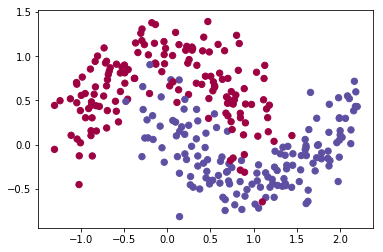

In [56]:
train_X, train_Y = load_dataset()

We have already implemented a 3-layer neural network. You will train it with: 
- Mini-batch **Gradient Descent**: it will call your function:
    - `update_parameters_with_gd()`
- Mini-batch **Momentum**: it will call your functions:
    - `initialize_velocity()` and `update_parameters_with_momentum()`
- Mini-batch **Adam**: it will call your functions:
    - `initialize_adam()` and `update_parameters_with_adam()`

In [57]:
def model(X, Y, layers_dims, optimizer, learning_rate = 0.0007, mini_batch_size = 64, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 10000, print_cost = True):
    """
    3-layer neural network model which can be run in different optimizer modes.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    layers_dims -- python list, containing the size of each layer
    learning_rate -- the learning rate, scalar.
    mini_batch_size -- the size of a mini batch
    beta -- Momentum hyperparameter
    beta1 -- Exponential decay hyperparameter for the past gradients estimates 
    beta2 -- Exponential decay hyperparameter for the past squared gradients estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates
    num_epochs -- number of epochs
    print_cost -- True to print the cost every 1000 epochs

    Returns:
    parameters -- python dictionary containing your updated parameters 
    """

    L = len(layers_dims)             # number of layers in the neural networks
    costs = []                       # to keep track of the cost
    t = 0                            # initializing the counter required for Adam update
    seed = 10                        # For grading purposes, so that your "random" minibatches are the same as ours
    
    # Initialize parameters
    parameters = initialize_parameters(layers_dims)

    # Initialize the optimizer
    if optimizer == "gd":
        pass # no initialization required for gradient descent
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    
    # Optimization loop
    for i in range(num_epochs):
        
        # Define the random minibatches. We increment the seed to reshuffle differently the dataset after each epoch
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)

        for minibatch in minibatches:

            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch

            # Forward propagation
            a3, caches = forward_propagation(minibatch_X, parameters)

            # Compute cost
            cost = compute_cost(a3, minibatch_Y)

            # Backward propagation
            grads = backward_propagation(minibatch_X, minibatch_Y, caches)

            # Update parameters
            if optimizer == "gd":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1 # Adam counter
                parameters, v, s = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        
        # Print the cost every 1000 epoch
        if print_cost and i % 1000 == 0:
            print ("Cost after epoch %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
                
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters

You will now run this 3 layer neural network with each of the 3 optimization methods.

### 5.1 - Mini-batch Gradient descent

Run the following code to see how the model does with mini-batch gradient descent.

Cost after epoch 0: 0.690736
Cost after epoch 1000: 0.685273
Cost after epoch 2000: 0.647072
Cost after epoch 3000: 0.619525
Cost after epoch 4000: 0.576584
Cost after epoch 5000: 0.607243
Cost after epoch 6000: 0.529403
Cost after epoch 7000: 0.460768
Cost after epoch 8000: 0.465586
Cost after epoch 9000: 0.464518


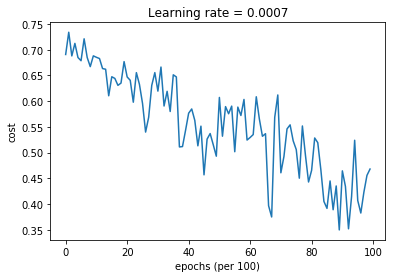

Accuracy: 0.7966666666666666


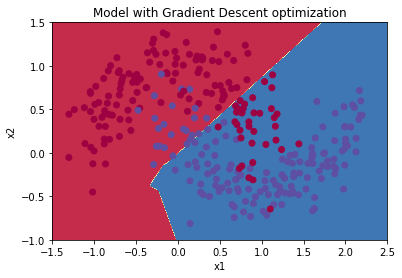

In [58]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "gd")

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Gradient Descent optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

### 5.2 - Mini-batch gradient descent with momentum

Run the following code to see how the model does with momentum. Because this example is relatively simple, the gains from using momemtum are small; but for more complex problems you might see bigger gains.

In [59]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, beta = 0.9, optimizer = "momentum")

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Momentum optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

KeyError: 'dW3'

### 5.3 - Mini-batch with Adam mode

Run the following code to see how the model does with Adam.

In [60]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "adam")

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Adam optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00249241,  0.00236369],
       [ 0.00203895, -0.00221488],
       [ 0.00530742, -0.00366238],
       [ 0.00486061, -0.00433661],
       [ 0.00014225, -0.00012692]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00249241,  0.00236369],
       [ 0.00203895, -0.00221488],
       [ 0.00530742, -0.00366238],
       [ 0.00486061, -0.00433661],
       [ 0.00014225, -0.00012692]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[-0.00449164  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[-0.00449164  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[-0.00449164  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00505315,  0.0051994 ],
       [ 0.00378629, -0.00411783],
       [ 0.0141647

<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00816451,  0.01433675, -0.00254945,  0.00367257,  0.00300769],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00816451,  0.01433675, -0.00254945,  0.00367257,  0.00300769],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[-0.00326647  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7b

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.0074937 ,  0.00802494],
       [ 0.00631537, -0.00647057],
       [ 0.02274222, -0.01309672],
       [ 0.01803223, -0.0127816 ],
       [ 0.00045055, -0.00035691]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.0074937 ,  0.00802494],
       [ 0.00631537, -0.00647057],
       [ 0.02274222, -0.01309672],
       [ 0.01803223, -0.0127816 ],
       [ 0.00045055, -0.00035691]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00930687,  0.009597  ],
       [ 0.00799771, -0.00780091],
       [ 0.02862557, -0.0162667 ],
       [ 0.02336733, -0.01546992],
       [ 0.00056122, -0.00042758]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00930687,  0.009597  ],
       [ 0.00799771, -0.00780091],
       [ 0.02862557, -0.0162667 ],
       [ 0.02336733, -0.01546992],
       [ 0.00056122, -0.00042758]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.01748029,  0.03023101, -0.0040273 ,  0.00792789,  0.00644062],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.01748029,  0.03023101, -0.0040273 ,  0.00792789,  0.00644062],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[-0.00747417  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7b

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[-0.00636738  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.01133948,  0.0112207 ],
       [ 0.00879757, -0.00834302],
       [ 0.03271429, -0.01803944],
       [ 0.02383974, -0.0165598 ],
       [ 0.00057197, -0.00045696]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01133948,  0.0112207 ],
       [ 0.00879757, -0.00834302],
       [ 0.03271429, -0.01803944],
       [ 0.02383974, -0.0165598 ],
       [ 0.00057197, -0.00045696]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01224627,  0.01262014],
       [ 0.00975941, -0.00990751],
       [ 0.0336635 , -0.01925855],
       [ 0.02785618, -0.01962002],
       [ 0.00068286, -0.00054218]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.01978272,  0.03466308, -0.00460846,  0.00916094,  0.00742047],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.01978272,  0.03466308, -0.00460846,  0.00916094,  0.00742047],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_correct

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[-0.00871669  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[-0.00871669  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[-0.00871669  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[-0.00871669  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe(

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[-0.00891228  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[-0.00891228  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.0130403 ,  0.01365927],
       [ 0.01044925, -0.00986052],
       [ 0.035058  , -0.01964573],
       [ 0.02896955, -0.01944739],
       [ 0.00072977, -0.00053857]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.0130403 ,  0.01365927],
       [ 0.01044925, -0.00986052],
       [ 0.035058  , -0.01964573],
       [ 0.02896955, -0.01944739],
       [ 0.00072977, -0.00053857]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" 

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[-0.00988599  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[-0.00988599  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.01389092,  0.01426956],
       [ 0.01094155, -0.011848  ],
       [ 0.03650504, -0.02254029],
       [ 0.02924423, -0.02339033],
       [ 0.00071249, -0.00064564]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01389092,  0.01426956],
       [ 0.01094155, -0.011848  ],
       [ 0.03650504, -0.02254029],
       [ 0.02924423, -0.02339033],
       [ 0.00071249, -0.00064564]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" 

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.01249153,  0.013     ],
       [ 0.00983361, -0.01073839],
       [ 0.0359656 , -0.0214839 ],
       [ 0.0281538 , -0.02130907],
       [ 0.00067733, -0.00058686]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01249153,  0.013     ],
       [ 0.00983361, -0.01073839],
       [ 0.0359656 , -0.0214839 ],
       [ 0.0281538 , -0.02130907],
       [ 0.00067733, -0.00058686]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[-0.00892899  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[-0.00892899  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[-0.00892899  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[-0.00892899  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.01286377,  0.01336213],
       [ 0.01047976, -0.0106282 ],
       [ 0.03788682, -0.02216085],
       [ 0.0294492 , -0.02098607],
       [ 0.00072718, -0.0005785 ]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01286377,  0.01336213],
       [ 0.01047976, -0.0106282 ],
       [ 0.03788682, -0.02216085],
       [ 0.0294492 , -0.02098607],
       [ 0.00072718, -0.0005785 ]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

       [ 0.00072506, -0.00058007]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01218832,  0.01258561],
       [ 0.00999695, -0.01065923],
       [ 0.03843983, -0.02238466],
       [ 0.02960609, -0.021066  ],
       [ 0.00072506, -0.00058007]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01218832,  0.01258561],
       [ 0.00999695, -0.01065923],
       [ 0.03843983, -0.02238466],
       [ 0.02960609, -0.021066  ],
       [ 0.00072506, -0.00058007]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01407939,  0.01463754],
       [ 0.01123528, -0.01132103],
       [ 0.03900649, -0.02303564],
       [ 0.03118698, -0.02238194],
       [ 0.00076411, -0.00061553]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.02268701,  0.03961922, -0.00490942,  0.01048046,  0.00847384],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.02268701,  0.03961922, -0.00490942,  0.01048046,  0.00847384],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_correct

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[-0.00892328  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[-0.00892328  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.01483379,  0.01530618],
       [ 0.01159907, -0.01130454],
       [ 0.04055494, -0.0239576 ],
       [ 0.03085949, -0.02228663],
       [ 0.00078413, -0.00061561]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01483379,  0.01530618],
       [ 0.01159907, -0.01130454],
       [ 0.04055494, -0.0239576 ],
       [ 0.03085949, -0.02228663],
       [ 0.00078

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.02174338,  0.03886117, -0.00509823,  0.01020011,  0.00826763],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.02174338,  0.03886117, -0.00509823,  0.01020011,  0.00826763],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.02174338,  0.03886117, -0.005

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.0143447 ,  0.01510214],
       [ 0.01185439, -0.01191057],
       [ 0.03946391, -0.02309101],
       [ 0.03452652, -0.02359095],
       [ 0.00083241, -0.0006455 ]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.0143447 ,  0.01510214],
       [ 0.01185439, -0.01191057],
       [ 0.03946391, -0.02309101],
       [ 0.03452652, -0.02359095],
       [ 0.00083241, -0.0006455 ]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.02171682,  0.03864199, -0.0049708 ,  0.01022249,  0.00826226],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.02171682,  0.03864199, -0.0049708 ,  0.01022249,  0.00826226],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[-0.01013262  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[-0.01013262  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipytho

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[-0.01057069  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.01289215,  0.01332128],
       [ 0.01013168, -0.01089002],
       [ 0.03767048, -0.02284416],
       [ 0.02886847, -0.02154516],
       [ 0.00070275, -0.00059076]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01289215,  0.01332128],
       [ 0.01013168, -0.01089002],
       [ 0.03767048, -0.02284416],
       [ 0.02886847, -0.02154516],
       [ 0.00070275, -0.00059076]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.01269444,  0.01339095],
       [ 0.01026246, -0.01027608],
       [ 0.0385405 , -0.02174471],
       [ 0.03044401, -0.0203057 ],
       [ 0.00073248, -0.00055368]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01269444,  0.01339095],
       [ 0.01026246, -0.01027608],
       [ 0.0385405 , -0.02174471],
       [ 0.03044401, -0.0203057 ],
       [ 0.00073248, -0.00055368]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[-0.00876308  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[-0.00876308  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[-0.00876308  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.0147379 ,  0.01513786],
       [ 0.01178175, -0.01191471],
       [ 0.040229 

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[-0.01023214  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.01290887,  0.01334142],
       [ 0.01094058, -0.01074666],
       [ 0.03901658, -0.02293238],
       [ 0.02952082, -0.02122095],
       [ 0.00071603, -0.00057896]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01290887,  0.01334142],
       [ 0.01094058, -0.01074666],
       [ 0.03901658, -0.02293238],
       [ 0.02952082, -0.02122095],
       [ 0.00071603, -0.00057896]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01369361,  0.01439543],
       [ 0.01096533, -0.01101707],
       [ 0.04101502, -0.02367342],
       [ 0.03040159, -0.0217395 ],
       [ 0.00074676, -0.0005926 ]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.02200525,  0.03854953, -0.00556824,  0.01013807,  0.00819897],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.02200525,  0.03854953, -0.00556824,  0.01013807,  0.00819897],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dty

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[-0.01039867  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[-0.01039867  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[-0.01039867  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[-0.01039867  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe(

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.02058184,  0.03600816, -0.00548669,  0.00943986,  0.00764078],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.02058184,  0.03600816, -0.00548669,  0.00943986,  0.00764078],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.02058184,  0.03600816, -0.005

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[-0.00776804  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[-0.00776804  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.01404362,  0.01466431],
       [ 0.01099118, -0.01146049],
       [ 0.03946297, -0.0235196 ],
       [ 0.02990265, -0.02259467],
       [ 0.0007264 , -0.00061068]])) [shape=(5, 2)]
<ipython-input

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.01347817,  0.01373158],
       [ 0.01069985, -0.01038299],
       [ 0.04009408, -0.02208707],
       [ 0.03143256, -0.02056656],
       [ 0.00074671, -0.0005515 ]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01347817,  0.01373158],
       [ 0.01069985, -0.01038299],
       [ 0.04009408, -0.02208707],
       [ 0.03143256, -0.02056656],
       [ 0.00074671, -0.0005515 ]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01269655,  0.01321501],
       [ 0.01037799, -0.01075464],
       [ 0.03902541, -0.023243  ],
       [ 0.02872887, -0.02121399],
       [ 0.00070099, -0.00056953]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01269655,  0.01321501],
       [ 0.01037799, -0.01075464],
       [ 0.03902541, -0.023243  ],
       [ 0.02872887, -0.02121399],
       [ 0.00070099, -0.00056953]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.02049499,  0.03756997, -0.004929  ,  0.00992736,  0.00800647],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l

<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.01371242,  0.01485227],
       [ 0.01076896, -0.01101702],
       [ 0.0384098 , -0.02295069],
       [ 0.02938658, -0.02173731],
       [ 0.00071179, -0.00057832]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01371242,  0.01485227],
       [ 0.01076896, -0.01101702],
       [ 0.0384098 , -0.02295069],
       [ 0.02938658, -0.02173731],
       [ 0.00071179, -0.00057832]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01371242,  0.01485227],
       [ 0.01076896, -0.01101702],
 

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01373297,  0.01534203],
       [ 0.01062428, -0.01124896],
       [ 0.03736299, -0.02218013],
       [ 0.03008997, -0.02213934],
       [ 0.00074235, -0.00058797]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01373297,  0.01534203],
       [ 0.01062428, -0.01124896],
       [ 0.03736299, -0.02218013],
       [ 0.03008997, -0.02213934],
       [ 0.00074235, -0.00058797]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.02163583,  0.03925005, -0.00480737,  0.01031624,  0.00832231],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[-0.00985783  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[-0.00985783  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[-0.00985783  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[-0.00985783  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe(

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[-0.01015765  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[-0.01015765  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[-0.01015765  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.01383215,  0.01494952],
       [ 0.01072163, -0.01109424],
       [ 0.0397821

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[-0.00879554  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[-0.00879554  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.01370097,  0.01554535],
       [ 0.01115735, -0.01019722],
       [ 0.0388743 , -0.02236446],
       [ 0.02950546, -0.02015474],
       [ 0.00068768, -0.00052011]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01370097,  0.01554535],
       [ 0.01115735, -0.01019722],
       [ 0.0388743 , -0.02236446],
       [ 0.02950546, -0.02015474],
       [ 0.00068

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[-0.00744793  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[-0.00744793  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.01475334,  0.01704059],
       [ 0.01124959, -0.01141096],
       [ 0.03998873, -0.02441698],
       [ 0.03004937, -0.02248067],
       [ 0.0006947 , -0.00057122]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01475334,  0.01704059],
       [ 0.01124959, -0.01141096],
       [ 0.03998873, -0.02441698],
       [ 0.03004937, -0.02248067],
       [ 0.0006947 , -0.00057122]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" 

<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[-0.00853774  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[-0.00853774  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[-0.00853774  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[-0.00853774  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[-0.0090611  0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[-0.0090611  0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[-0.0090611  0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.0135909 ,  0.01576123],
       [ 0.0104727 , -0.01048073],
       [ 0.04076099, -0.

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.01251823,  0.0150557 ],
       [ 0.00966995, -0.00937638],
       [ 0.0415131 , -0.0231927 ],
       [ 0.02931739, -0.01881239],
       [ 0.0005926 , -0.00045473]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01251823,  0.0150557 ],
       [ 0.00966995, -0.00937638],
       [ 0.0415131 , -0.0231927 ],
       [ 0.02931739, -0.01881239],
       [ 0.0005926 , -0.00045473]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.0224581 ,  0.03707061, -0.00610184,  0.00936256,  0.00758015],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.0224581 ,  0.03707061, -0.00610184,  0.00936256,  0.00758015],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[-0.00669573  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7b

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.02063522,  0.03871549, -0.00574973,  0.00999632,  0.0080337 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[-0.00928347  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[-0.00928347  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[-0.00928347  0.        ]]) [shape=(1, 2)]

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.01323734,  0.01551483],
       [ 0.01030602, -0.01031305],
       [ 0.040542  , -0.02359894],
       [ 0.02991255, -0.02053614],
       [ 0.00059714, -0.00046214]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01323734,  0.01551483],
       [ 0.01030602, -0.01031305],
       [ 0.040542  , -0.02359894],
       [ 0.02991255, -0.02053614],
       [ 0.00059714, -0.00046214]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.02042042,  0.03439089, -0.00654407,  0.00853442,  0.0069055 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.02042042,  0.03439089, -0.00654407,  0.00853442,  0.0069055 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.02042042,  0.03439089, -0.00654407,  0.00853442,  0.0069055 ],
       [ 0.        ,  0.        ,  0.        ,  0. 

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[-0.00842322  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[-0.00842322  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.01458669,  0.01730895],
       [ 0.01108184, -0.01211285],
       [ 0.04020148, -0.02537028],
       [ 0.03005334, -0.02403701],
       [ 0.00056885, -0.00050167]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01458669,  0.01730895],
       [ 0.01108184, -0.01211285],
       [ 0.04020148, -0.02537028],
       [ 0.03005334, -0.02403701],
       [ 0.00056885, -0.00050167]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" 

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.01300228,  0.01535424],
       [ 0.00998146, -0.01055501],
       [ 0.03902984, -0.0239848 ],
       [ 0.02787688, -0.02095705],
       [ 0.0005099 , -0.00042633]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01300228,  0.01535424],
       [ 0.00998146, -0.01055501],
       [ 0.03902984, -0.0239848 ],
       [ 0.02787688, -0.02095705],
       [ 0.0005099 , -0.00042633]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[-0.0068715  0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[-0.0068715  0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.01255402,  0.01459123],
       [ 0.01005246, -0.01059405],
       [ 0.04226402, -0.02521507],
       [ 0.02948585, -0.02122225],
       [ 0.00052685, -0.00041094]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01255402,  0.01459123],
       [ 0.01005246, -0.01059405],
       [ 0.04226402, -0.02521507],
       [ 0.02948585, -0.02122225],
       [ 0.00052685, -0.00041094]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + st

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01233202,  0.01459656],
       [ 0.00928873, -0.00980971],
       [ 0.03939837, -0.02319475],
       [ 0.02751887, -0.01965612],
       [ 0.00046788, -0.00036352]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01233202,  0.01459656],
       [ 0.00928873, -0.00980971],
       [ 0.03939837, -0.02319475],
       [ 0.02751887, -0.01965612],
       [ 0.00046788, -0.00036352]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [le

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[-0.00465113  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[-0.00465113  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[-0.00465113  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[-0.00465113  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe(

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.01176296,  0.01344142],
       [ 0.00912873, -0.00940525],
       [ 0.03979048, -0.02342861],
       [ 0.02713424, -0.0188896 ],
       [ 0.00041649, -0.00031459]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01176296,  0.01344142],
       [ 0.00912873, -0.00940525],
       [ 0.03979048, -0.02342861],
       [ 0.02713424, -0.0188896 ],
       [ 0.00041649, -0.00031459]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01205236,  0.0135409 ],
       [ 0.00895594, -0.0093659 ],
       [ 0.04002402, -0.02392749],
       [ 0.02683134, -0.01879561],
       [ 0.00039537, -0.00029635]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01205236,  0.0135409 ],
       [ 0.00895594, -0.0093659 ],
       [ 0.04002402, -0.02392749],
       [ 0.02683134, -0.01879561],
       [ 0.00039537, -0.00029635]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.0195050

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.01944175,  0.03134236, -0.00758246,  0.00730965,  0.00587065],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.01944175,  0.03134236, -0.00758246,  0.00730965,  0.00587065],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.01944175,  0.03134236, -0.007

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[-0.0052371  0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[-0.0052371  0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[-0.0052371  0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[-0.0052371  0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter c

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[-0.00421725  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[-0.00421725  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.01106411,  0.01355348],
       [ 0.00857605, -0.00887081],
       [ 0.04027035, -0.02350287],
       [ 0.02652537, -0.01799271],
       [ 0.00029786, -0.00021964]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01106411,  0.01355348],
       [ 0.00857605, -0.00887081],
       [ 0.04027035, -0.02350287],
       [ 0.02652537, -0.01799271],
       [ 0.00029

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.01144642,  0.01427587],
       [ 0.00847652, -0.0084497 ],
       [ 0.0396253 , -0.02216757],
       [ 0.02705041, -0.01715056],
       [ 0.00026726, -0.00018712]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01144642,  0.01427587],
       [ 0.00847652, -0.0084497 ],
       [ 0.0396253 , -0.02216757],
       [ 0.02705041, -0.01715056],
       [ 0.00026726, -0.00018712]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[-0.00173967  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[-0.00173967  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[-0.00173967  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[-0.00173967  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe(

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00996226,  0.01263866],
       [ 0.00749041, -0.0078772 ],
       [ 0.0393904 , -0.02306091],
       [ 0.02279154, -0.01590065],
       [ 0.00018628, -0.00013617]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00996226,  0.01263866],
       [ 0.00749041, -0.0078772 ],
       [ 0.0393904 , -0.02306091],
       [ 0.02279154, -0.01590065],
       [ 0.00018628, -0.00013617]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.01441281,  0.0267542 , -0.00875908,  0.00596965,  0.00480696],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[-0.00049995  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[-0.00049995  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[-0.00049995  0.        ]]) [shape=(1, 2)]

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[-0.00147787  0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-8.93727709e-03,  1.29982637e-02],
       [ 6.71165541e-03, -7.45753795e-03],
       [ 3.98556088e-02, -2.36403019e-02],
       [ 2.18987751e-02, -1.52767913e-02],
       [ 1.13908224e-04, -8.33714219e-05]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-8.93727709e-03,  1.29982637e-02],
       [ 6.71165541e-03, -7.45753795e-03],
       [ 3.98556088e-02, -2.36403019e-02],
       [ 2.18987751e-02, -1.52767913e-02],
       [ 1.13908224e-04, -8.33714219e-05]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.01165873,  0.0228095 , -0.00923529,  0.00482954,  0.00393957],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.01165873,  0.0228095 , -0.00923529,  0.00482954,  0.00393957],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_co

<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-8.90773465e-03,  1.57151133e-02],
       [ 5.63999576e-03, -6.68009031e-03],
       [ 3.90866855e-02, -2.33009469e-02],
       [ 2.06500508e-02, -1.36460208e-02],
       [ 3.55071985e-05, -2.55439435e-05]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-8.90773465e-03,  1.57151133e-02],
       [ 5.63999576e-03, -6.68009031e-03],
       [ 3.90866855e-02, -2.33009469e-02],
       [ 2.06500508e-02, -1.36460208e-02],
       [ 3.55071985e-05, -2.55439435e-05]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-8.58624828e-03,  1.39977667e-02],
       [ 5.64908107e-03, -6.89266831e-03],
       [ 4.12807718e-02, -2.52450880e-02],
       [ 2.04463876e-02, -1.40682969e-02],
       [ 1.49960537e-06, -6.57213553e-07]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-8.58624828e-03,  1.39977667e-02],
       [ 5.64908107e-03, -6.89266831e-03],
       [ 4.12807718e-02, -2.52450880e-02],
       [ 2.04463876e-02, -1.40682969e-02],
       [ 1.49960537e-06, -6.57213553e-07]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-7.09668732e-03,  1.19851185e-02],
       [ 5.50422264e-03, -6.13309973e-03],
       [ 4.00670690e-02, -2.36863330e-02],
       [ 2.01965487e-02, -1.26557761e-02],
       [-2.38383459e-05,  1.32367873e-05]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-7.09668732e-03,  1.19851185e-02],
       [ 5.50422264e-03, -6.13309973e-03],
       [ 4.00670690e-02, -2.36863330e-02],
       [ 2.01965487e-02, -1.26557761e-02],
       [-2.38383459e-05,  1.32367873e-05]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.00995078,  0.02110799, -0.00987376,  0.00431501,  0.00355948],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.      

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-7.11316527e-03,  1.29031288e-02],
       [ 5.06744669e-03, -5.43981863e-03],
       [ 4.03367322e-02, -2.38457759e-02],
       [ 1.91956301e-02, -1.12653632e-02],
       [-5.60882029e-05,  3.08835461e-05]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-7.11316527e-03,  1.29031288e-02],
       [ 5.06744669e-03, -5.43981863e-03],
       [ 4.03367322e-02, -2.38457759e-02],
       [ 1.91956301e-02, -1.12653632e-02],
       [-5.60882029e-05,  3.08835461e-05]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00443809 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00443809 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00443809 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00443809 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_correc

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00880204,  0.0182197 , -0.01109861,  0.00329383,  0.00294333],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00453406 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00453406 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00369809 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00369809 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00369809 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00369809 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter c

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00849398,  0.0179028 , -0.01092404,  0.00331747,  0.00304041],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00849398,  0.0179028 , -0.01092404,  0.00331747,  0.00304041],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00849398,  0.0179028 , -0.01092404,  0.00331747,

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00562689,  0.01200141],
       [ 0.00446996, -0.00528203],
       [ 0.04243526, -0.02648339],
       [ 0.01816329, -0.0110387 ],
       [-0.00017222,  0.00011371]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00562689,  0.01200141],
       [ 0.00446996, -0.00528203],
       [ 0.04243526, -0.02648339],
       [ 0.01816329, -0.0110387 ],
       [-0.00017222,  0.00011371]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [le

<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.00726146,  0.0189971 , -0.01155579,  0.00364855,  0.00349657],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00726146,  0.0189971 , -0.01155579,  0.00364855,  0.00349657],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00726146,  0.0189971 , -0.01155579,  0.00364855,  0.00349657],
       [ 0.        ,  0.        ,  0.        ,  0. 

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00642813,  0.01543451, -0.01202754,  0.00259371,  0.00268081],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00642813,  0.01543451, -0.01202754,  0.00259371,  0.00268081],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_co

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00495634 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00495634 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00495634 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00495634 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter c

<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00552255 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00552255 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00509122,  0.01057364],
       [ 0.00409398, -0.00452571],
       [ 0.04420361, -0.02861106],
       [ 0.01622909, -0.0093831 ],
       [-0.00024543,  0.00014664]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00509122,  0.01057364],
       [ 0.004093

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00538046,  0.01069081],
       [ 0.00420232, -0.00528841],
       [ 0.04355405, -0.0286108 ],
       [ 0.01714723, -0.01109601],
       [-0.00025374,  0.00019122]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00538046,  0.01069081],
       [ 0.00420232, -0.00528841],
       [ 0.04355405, -0.0286108 ],
       [ 0.01714723, -0.01109601],
       [-0.00025374,  0.00019122]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.00758282,  0.01789605, -0.01204847,  0.00314115,  0.00347153],
       [ 0.        ,  0.        ,  0.        ,  0.  

       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00714286,  0.01650467, -0.01141632,  0.0028589 ,  0.00325466],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00714286,  0.01650467, -0.01141632,  0.0028589 ,  0.00325466],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describ

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00480881,  0.01007836],
       [ 0.0038079 , -0.00438484],
       [ 0.04429009, -0.03032341],
       [ 0.016891  , -0.00935749],
       [-0.00029502,  0.00018145]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00480881,  0.01007836],
       [ 0.0038079 , -0.00438484],
       [ 0.04429009, -0.03032341],
       [ 0.016891  , -0.00935749],
       [-0.00029502,  0.00018145]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00898643 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00898643 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00898643 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00898643 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter c

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00790634 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00790634 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00790634 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00790634 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter c

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00508944,  0.01118142],
       [ 0.00345817, -0.00479989],
       [ 0.04560829, -0.03318903],
       [ 0.01592461, -0.01025174],
       [-0.00032691,  0.00024635]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00508944,  0.01118142],
       [ 0.00345817, -0.00479989],
       [ 0.04560829, -0.03318903],
       [ 0.01592461, -0.01025174],
       [-0.00032691,  0.00024635]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [le

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00464762,  0.0097543 ],
       [ 0.00361081, -0.00420159],
       [ 0.0456064 , -0.03232709],
       [ 0.01673734, -0.00918137],
       [-0.00031252,  0.0002196 ]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.0064112 ,  0.01433235, -0.01367307,  0.00215521,  0.00305256],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.0064112 ,  0.01433235, -0.01367307,  0.00215521,  0.00305256],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dty

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00483781,  0.01029171],
       [ 0.00368887, -0.00424505],
       [ 0.04804925, -0.0335634 ],
       [ 0.01670494, -0.0092739 ],
       [-0.00034091,  0.00024225]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.00664453,  0.01452165, -0.01517935,  0.00214753,  0.00318084],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00664453,  0.01452165, -0.01517935,  0.00214753,  0.00318084],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dty

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00498584,  0.0104392 ],
       [ 0.00367147, -0.00439546],
       [ 0.04638055, -0.03390578],
       [ 0.01553303, -0.00950002],
       [-0.00036522,  0.00027724]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.00700709,  0.01498804, -0.01424739,  0.00223027,  0.00343384],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00700709,  0.01498804, -0.01424739,  0.00223027,  0.00343384],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dty

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00840434 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00840434 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00840434 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00840434 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter c

<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00401284,  0.00920373],
       [ 0.00291095, -0.00387412],
       [ 0.04649701, -0.03536476],
       [ 0.01465617, -0.00852419],
       [-0.0003437 ,  0.00026242]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00401284,  0.00920373],
       [ 0.00291095, -0.00387412],
       [ 0.04649701, -0.03536476],
       [ 0.01465617, -0.00852419],
       [-0.0003437 ,  0.00026242]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.0053851

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00484174,  0.01041455],
       [ 0.00386227, -0.0047266 ],
       [ 0.04884614, -0.03802194],
       [ 0.01512571, -0.01017471],
       [-0.00041803,  0.00034378]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.00698729,  0.01608167, -0.01499921,  0.0023658 ,  0.00392054],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00698729,  0.01608167, -0.01499921,  0.0023658 ,  0.00392054],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dty

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00445438,  0.01023465],
       [ 0.00323487, -0.0040612 ],
       [ 0.0479166 , -0.03607819],
       [ 0.01567246, -0.00907123],
       [-0.00040449,  0.00030532]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00445438,  0.01023465],
       [ 0.00323487, -0.0040612 ],
       [ 0.0479166 , -0.03607819],
       [ 0.01567246, -0.00907123],
       [-0.00040449,  0.00030532]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00552968,  0.01193401, -0.0160983 ,  0.00147023,  0.00294248],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01255519 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01255519 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01255519 0.        ]]) [shape=(1, 2)]
<ipyt

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01091868 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01091868 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00438856,  0.01092324],
       [ 0.00349399, -0.00484178],
       [ 0.04711966, -0.0366092 ],
       [ 0.0161712 , -0.01082523],
       [-0.0004372 ,  0.00040886]])) [shape=(5, 2)]
<ipython-input-54-

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.0096478 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00427461,  0.00993528],
       [ 0.00307326, -0.0045806 ],
       [ 0.04978884, -0.0383772 ],
       [ 0.01582773, -0.01032535],
       [-0.00040904,  0.0003934 ]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00427461,  0.00993528],
       [ 0.00307326, -0.0045806 ],
       [ 0.04978884, -0.0383772 ],
       [ 0.01582773, -0.01032535],
       [-0.00040904,  0.0003934 ]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dt

<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00505062,  0.01200857, -0.01687997,  0.00133697,  0.00310481],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00505062,  0.01200857, -0.01687997,  0.00133697,  0.00310481],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01275948 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00343986,  0.00852432],
       [ 0.00289919, -0.00360595],
       [ 0.04729539, -0.03770829],
       [ 0.01498983, -0.00827605],
       [-0.00044028,  0.00032779]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00343986,  0.00852432],
       [ 0.00289919, -0.00360595],
       [ 0.04729539, -0.03770829],
       [ 0.01498983, -0.00827605],
       [-0.00044028,  0.00032779]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00512726,  0.01197857, -0.01748559,  0.00126016,  0.00324989],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00512726,  0.01197857, -0.01748559,  0.00126016,  0.00324989],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describ

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00518048,  0.01287886, -0.01835446,  0.00143075,  0.00353228],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01387664 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01387664 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01469412 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01469412 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00328087,  0.00666994],
       [ 0.00286683, -0.0033996 ],
       [ 0.04886577, -0.03686435],
       [ 0.01741217, -0.00807236],
       [-0.00052734,  0.00034158]])) [shape=(5, 2)]
<ipython-input-54-

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00269338,  0.00529639],
       [ 0.00268856, -0.00328931],
       [ 0.04831823, -0.03738899],
       [ 0.01439724, -0.0076216 ],
       [-0.00046332,  0.00034616]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00269338,  0.00529639],
       [ 0.00268856, -0.00328931],
       [ 0.04831823, -0.03738899],
       [ 0.01439724, -0.0076216 ],
       [-0.00046332,  0.00034616]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00446612,  0.01140164, -0.01810568,  0.00126719,  0.00337255],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00446612,  0.01140164, -0.01810568,  0.00126719,  0.00337255],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01382044 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01382044 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc

<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00321882,  0.00728445],
       [ 0.00275971, -0.00383429],
       [ 0.04715098, -0.03680339],
       [ 0.01479493, -0.00886659],
       [-0.00048566,  0.00043042]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00321882,  0.00728445],
       [ 0.00275971, -0.00383429],
       [ 0.04715098, -0.03680339],
       [ 0.01479493, -0.00886659],
       [-0.00048566,  0.00043042]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00321882,  0.00728445],
       [ 0.00275971, -0.00383429],
 

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00255279,  0.00536325],
       [ 0.00251973, -0.00321902],
       [ 0.04798142, -0.03738967],
       [ 0.01516756, -0.0075918 ],
       [-0.0004989 ,  0.00036162]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00255279,  0.00536325],
       [ 0.00251973, -0.00321902],
       [ 0.04798142, -0.03738967],
       [ 0.01516756, -0.0075918 ],
       [-0.0004989 ,  0.00036162]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.00455156,  0.0109346 , -0.01914161,  0.00098141,  0.00322396],
       [ 0.        ,  0.        ,  0.        ,  0.  

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01709651 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01709651 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00258699,  0.00543263],
       [ 0.00235306, -0.0029551 ],
       [ 0.0502491 , -0.03918969],
       [ 0.01478497, -0.00704463],
       [-0.00046387,  0.00034141]])) [shape=(5, 2)]
<ipython-input-54-

<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00445545,  0.00927287, -0.02186773,  0.00033024,  0.00287377],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00445545,  0.00927287, -0.02186773,  0.00033024,  0.00287377],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01876071 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00560918,  0.01121709, -0.02033304,  0.00085285,  0.00361963],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00560918,  0.01121709, -0.02033304,  0.00085285,  0.00361963],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00560918,  0.01121709, -0.02033304,  0.00085285,

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00324779,  0.00698418],
       [ 0.00289473, -0.00369467],
       [ 0.05035716, -0.03943729],
       [ 0.01578445, -0.00877983],
       [-0.00053355,  0.00046954]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00324779,  0.00698418],
       [ 0.00289473, -0.00369467],
       [ 0.05035716, -0.03943729],
       [ 0.01578445, -0.00877983],
       [-0.00053355,  0.00046954]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00317675,  0.0063607 ],
       [ 0.00327951, -0.00323098],
       [ 0.04908967, -0.03653209],
       [ 0.01762597, -0.00788204],
       [-0.00059859,  0.00041676]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00317675,  0.0063607 ],
       [ 0.00327951, -0.00323098],
       [ 0.04908967, -0.03653209],
       [ 0.01762597, -0.00788204],
       [-0.00059859,  0.00041676]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.00577225,  0.01090643, -0.02090408,  0.00050452,  0.00352176],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l

<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00565325,  0.01180651, -0.02204864,  0.00086543,  0.00386342],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00565325,  0.01180651, -0.02204864,  0.00086543,  0.00386342],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01869026 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.0170826 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.0170826 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.0023729 ,  0.00507994],
       [ 0.0025006 , -0.00288138],
       [ 0.04615947, -0.03638242],
       [ 0.01432691, -0.00702651],
       [-0.00046699,  0.00038449]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.0023729 ,  0.00507994],
       [ 0.0025006 , -0.00288138],
       [ 0.04615947, -0.03638242],
       [ 0.01432691, -0.00702651],
       [-0.00046699,  0.00038449]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00238864,  0.0047575 ],
       [ 0.00254098, -0.00267263],
       [ 0.04753783, -0.03712555],
       [ 0.01435762, -0.00669493],
       [-0.00044631,  0.00036466]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00238864,  0.0047575 ],
       [ 0.00254098, -0.00267263],
       [ 0.04753783, -0.03712555],
       [ 0.01435762, -0.00669493],
       [-0.00044631,  0.00036466]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00450734,  0.01043754, -0.02237061,  0.00068275,  0.00353365],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00450734,  0.01043754, -0.02237061,  0.00068275,  0.00353365],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00450734,  0.01043754, -0.02237061,  0.00068275,

<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00437656,  0.01089784, -0.02196871,  0.00072408,  0.00375459],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00437656,  0.01089784, -0.02196871,  0.00072408,  0.00375459],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01813451 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.0157908 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.0157908 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.0157908 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.0157908 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = 

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.0042997 ,  0.00998192, -0.02242379,  0.00048992,  0.003559  ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.0042997 ,  0.00998192, -0.02242379,  0.00048992,  0.003559  ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.0042997 ,  0.00998192, -0.022

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01952287 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01952287 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00224461,  0.0065503 ],
       [ 0.00239145, -0.00287403],
       [ 0.04779238, -0.04009266],
       [ 0.01292264, -0.00722763],
       [-0.00044012,  0.0004455 ]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00224461,  0.0065503 ],
       [ 0.00239145, -0.00287403],
       [ 0.04779238, -0.04009266],
       [ 0.01292264, -0.00722763],
       [-0.00044012,  0.0004455 ]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + st

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00351478,  0.00853696, -0.02234705,  0.00028236,  0.00310165],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00351478,  0.00853696, -0.02234705,  0.00028236,  0.00310165],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00351478,  0.00853696, -0.02234705,  0.00028236,

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00198614,  0.00458311],
       [ 0.00236859, -0.00297007],
       [ 0.04574876, -0.03752153],
       [ 0.01248322, -0.00738439],
       [-0.00045414,  0.00047933]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00198614,  0.00458311],
       [ 0.00236859, -0.00297007],
       [ 0.04574876, -0.03752153],
       [ 0.01248322, -0.00738439],
       [-0.00045414,  0.00047933]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [le

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00181724,  0.00379803],
       [ 0.00269392, -0.00254981],
       [ 0.04961862, -0.03858659],
       [ 0.01446332, -0.00653537],
       [-0.00053812,  0.0004201 ]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00181724,  0.00379803],
       [ 0.00269392, -0.00254981],
       [ 0.04961862, -0.03858659],
       [ 0.01446332, -0.00653537],
       [-0.00053812,  0.0004201 ]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.0039283 ,  0.00857195, -0.0241134 ,  0.00013308,  0.00324987],
       [ 0.        ,  0.        ,  0.        ,  0.  

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.00356698,  0.00871473, -0.02318526,  0.00039147,  0.00340454],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00356698,  0.00871473, -0.02318526,  0.00039147,  0.00340454],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00356698,  0.00871473, -0.023

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.02103251 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00157062,  0.00351955],
       [ 0.00260931, -0.0021327 ],
       [ 0.04749621, -0.03621803],
       [ 0.01385133, -0.00558871],
       [-0.0005289 ,  0.00036758]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00157062,  0.00351955],
       [ 0.00260931, -0.0021327 ],
       [ 0.04749621, -0.03621803],
       [ 0.01385133, -0.00558871],
       [-0.0005289 ,  0.00036758]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.02155473 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00189472,  0.00417335],
       [ 0.00283682, -0.00260647],
       [ 0.04886365, -0.03895277],
       [ 0.01435723, -0.0066628 ],
       [-0.00058703,  0.00045972]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00189472,  0.00417335],
       [ 0.00283682, -0.00260647],
       [ 0.04886365, -0.03895277],
       [ 0.01435723, -0.0066628 ],
       [-0.00058703,  0.00045972]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00132995,  0.00248694],
       [ 0.00242969, -0.00217188],
       [ 0.04820153, -0.03781416],
       [ 0.0126811 , -0.00567678],
       [-0.00048531,  0.00037833]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 3.36027539e-03,  7.25354185e-03, -2.43746863e-02,
        -2.49101979e-05,  2.92415321e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 3.36027539e-03,  7.25354185e-03, -2.43746863e-02,
        -2.49101979e-05,  2.92415321e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_cor

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00182764,  0.0043635 ],
       [ 0.00263451, -0.00248431],
       [ 0.04797107, -0.03859589],
       [ 0.0139821 , -0.00649484],
       [-0.00055455,  0.00045127]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00182764,  0.0043635 ],
       [ 0.00263451, -0.00248431],
       [ 0.04797107, -0.03859589],
       [ 0.0139821 , -0.00649484],
       [-0.00055455,  0.00045127]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.0210786 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.0210786 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00140375,  0.00322318],
       [ 0.00243308, -0.00199861],
       [ 0.04810616, -0.03862722],
       [ 0.01382446, -0.00542957],
       [-0.00055596,  0.0003666 ]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00140375,  0.00322318],
       [ 0.00243308, -0.00199861],
       [ 0.04810616, -0.03862722],
       [ 0.01382446, -0.00542957],
       [-0.00055596,  0.

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.02276471 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.02276471 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00193562,  0.00526956],
       [ 0.00238261, -0.00268395],
       [ 0.04922355, -0.04310891],
       [ 0.01381091, -0.00704706],
       [-0.00050731,  0.00050948]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00193562,  0.00526956],
       [ 0.00238261, -0.00268395],
       [ 0.04922355, -0.04310891],
       [ 0.01381091, -0.00704706],
       [-0.00050731,

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00203871,  0.00561732],
       [ 0.00247254, -0.00302622],
       [ 0.04882322, -0.04294491],
       [ 0.01354332, -0.0077343 ],
       [-0.00057267,  0.00058561]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00203871,  0.00561732],
       [ 0.00247254, -0.00302622],
       [ 0.04882322, -0.04294491],
       [ 0.01354332, -0.0077343 ],
       [-0.00057267,  0.00058561]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00192435,  0.00637902],
       [ 0.00223864, -0.00241398],
       [ 0.05021499, -0.04605483],
       [ 0.01361869, -0.00647736],
       [-0.00048608,  0.00046711]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00192435,  0.00637902],
       [ 0.00223864, -0.00241398],
       [ 0.05021499, -0.04605483],
       [ 0.01361869, -0.00647736],
       [-0.00048608,  0.00046711]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 3.14265546e-03,  8.13651494e-03, -2.58311681e-02,
         5.53711021e-05,  3.46839883e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00]])) [shape=(2, 5)]
<i

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00167261,  0.00548415],
       [ 0.00194699, -0.00216228],
       [ 0.04914215, -0.04601591],
       [ 0.0131106 , -0.00615442],
       [-0.00044591,  0.00041936]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00167261,  0.00548415],
       [ 0.00194699, -0.00216228],
       [ 0.04914215, -0.04601591],
       [ 0.0131106 , -0.00615442],
       [-0.00044591,  0.00041936]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.02276099 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.02276099 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.02276099 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.02276099 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter c

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.02307512 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00215528,  0.00863713],
       [ 0.00258686, -0.00258948],
       [ 0.05158682, -0.05002243],
       [ 0.01594403, -0.00734474],
       [-0.00060726,  0.00053831]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00215528,  0.00863713],
       [ 0.00258686, -0.00258948],
       [ 0.05158682, -0.05002243],
       [ 0.01594403, -0.00734474],
       [-0.00060726,  0.00053831]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 descri

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00146422,  0.00598004],
       [ 0.00184519, -0.00190963],
       [ 0.04762761, -0.04552821],
       [ 0.01316978, -0.00566858],
       [-0.00034421,  0.0003668 ]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00146422,  0.00598004],
       [ 0.00184519, -0.00190963],
       [ 0.04762761, -0.04552821],
       [ 0.01316978, -0.00566858],
       [-0.00034421,  0.0003668 ]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [le

<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00362816,  0.00979332, -0.02637577,  0.00014799,  0.00447558],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00362816,  0.00979332, -0.02637577,  0.00014799,  0.00447558],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.02284338 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.0230162 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.0230162 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.0230162 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.0230162 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = 

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.02345061 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00215297,  0.00978619],
       [ 0.00204101, -0.0029379 ],
       [ 0.04983142, -0.05013787],
       [ 0.01326947, -0.00799152],
       [-0.00050872,  0.00063645]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00215297,  0.00978619],
       [ 0.00204101, -0.0029379 ],
       [ 0.04983142, -0.05013787],
       [ 0.01326947, -0.00799152],
       [-0.00050872,  0.00063645]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00324093,  0.00822125, -0.02703679, -0.0001974 ,  0.00400192],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00324093,  0.00822125, -0.02703679, -0.0001974 ,  0.00400192],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_co

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00228056,  0.00986624],
       [ 0.00227446, -0.00279743],
       [ 0.05020473, -0.05021471],
       [ 0.01664979, -0.00845099],
       [-0.00051339,  0.00060664]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00228056,  0.00986624],
       [ 0.00227446, -0.00279743],
       [ 0.05020473, -0.05021471],
       [ 0.01664979, -0.00845099],
       [-0.00051339,  0.00060664]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.0029236 ,  0.00806803, -0.02861611, -0.00014266,  0.0040025 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.0029236 ,  0.00806803, -0.02861611, -0.00014266,  0.0040025 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.02548067 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.02548067 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.0017567 ,  0.00605585],
       [ 0.00241126, -0.00241416],
       [ 0.04940234, -0.04762287],
       [ 0.01546539, -0.00719566],
       [-0.00057008,  0.00053602]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.0017567 ,  0.00605585],
       [ 0.00241126, -0.00241416],
       [ 0.04940234, -0.04762287],
       [ 0.01546539, -0.00719566],
       [-0.00057008,  0.00053602]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.02301631 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.02301631 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.02301631 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00200768,  0.00801523],
       [ 0.00222097, -0.00239642],
       [ 0.04856068, -0.

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.0015231 ,  0.00630266],
       [ 0.00193305, -0.00188178],
       [ 0.04771801, -0.04632563],
       [ 0.01461405, -0.00622058],
       [-0.00044877,  0.00041257]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.0015231 ,  0.00630266],
       [ 0.00193305, -0.00188178],
       [ 0.04771801, -0.04632563],
       [ 0.01461405, -0.00622058],
       [-0.00044877,  0.00041257]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00166757,  0.00710463],
       [ 0.00220494, -0.0022294 ],
       [ 0.04786465, -0.04660855],
       [ 0.01566152, -0.00720822],
       [-0.00043509,  0.00049646]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00166757,  0.00710463],
       [ 0.00220494, -0.0022294 ],
       [ 0.04786465, -0.04660855],
       [ 0.01566152, -0.00720822],
       [-0.00043509,  0.00049646]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.00266956,  0.00708066, -0.02777085, -0.00032668,  0.00379626],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00266956,  0.00708066, -0.02777085, -0.00032668,  0.00379626],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00266956,  0.00708066, -0.027

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.0020501 ,  0.0094263 ],
       [ 0.00240552, -0.00247819],
       [ 0.04910374, -0.05016734],
       [ 0.01560112, -0.00776357],
       [-0.00052754,  0.00059079]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.00305212,  0.00835359, -0.02886937, -0.00023761,  0.00435373],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00305212,  0.00835359, -0.02886937, -0.00023761,  0.00435373],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_correct

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00211423,  0.00594509, -0.02873792, -0.00063371,  0.00343402],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00211423,  0.00594509, -0.02873792, -0.00063371,  0.00343402],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00211423,  0.00594509, -0.02873792, -0.00063371,

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00185778,  0.00950298],
       [ 0.00190853, -0.00169346],
       [ 0.04691023, -0.04673529],
       [ 0.0159698 , -0.00636514],
       [-0.00035185,  0.00037831]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00185778,  0.00950298],
       [ 0.00190853, -0.00169346],
       [ 0.04691023, -0.04673529],
       [ 0.0159698 , -0.00636514],
       [-0.00035185,  0.00037831]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [le

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.0015008 ,  0.00845323],
       [ 0.00192741, -0.00154979],
       [ 0.04763421, -0.04639036],
       [ 0.01717597, -0.00627806],
       [-0.00045908,  0.00035842]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.0015008 ,  0.00845323],
       [ 0.00192741, -0.00154979],
       [ 0.04763421, -0.04639036],
       [ 0.01717597, -0.00627806],
       [-0.00045908,  0.00035842]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00223994,  0.01339738],
       [ 0.0017188 , -0.00219174],
       [ 0.04712741, -0.05118152],
       [ 0.0174172 , -0.00838156],
       [-0.00039207,  0.00056207]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00223994,  0.01339738],
       [ 0.0017188 , -0.00219174],
       [ 0.04712741, -0.05118152],
       [ 0.0174172 , -0.00838156],
       [-0.00039207,  0.00056207]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00125338,  0.00697695, -0.02964777, -0.00058595,  0.00404629],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.02638568 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.02638568 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.02805901 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.02805901 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.02805901 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.02805901 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter c

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.02766092 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00176934,  0.01075025],
       [ 0.00188208, -0.00173224],
       [ 0.04669957, -0.04843457],
       [ 0.01872645, -0.00755792],
       [-0.00038569,  0.00043091]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00176934,  0.01075025],
       [ 0.00188208, -0.00173224],
       [ 0.04669957, -0.04843457],
       [ 0.01872645, -0.00755792],
       [-0.00038569,  0.00043091]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].

<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00199526,  0.01195737],
       [ 0.00158861, -0.00193893],
       [ 0.04656289, -0.05058259],
       [ 0.01700977, -0.00795703],
       [-0.00039137,  0.0005305 ]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00199526,  0.01195737],
       [ 0.00158861, -0.00193893],
       [ 0.04656289, -0.05058259],
       [ 0.01700977, -0.00795703],
       [-0.00039137,  0.0005305 ]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00199526,  0.01195737],
       [ 0.00158861, -0.00193893],
 

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00191539,  0.00685753, -0.02982999, -0.00057768,  0.00449245],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.02673744 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.02673744 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.02673744 0.        ]]) [shape=(1, 2)]
<ipyt

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00193614,  0.01378243],
       [ 0.00162227, -0.00196123],
       [ 0.04637685, -0.05163422],
       [ 0.01752397, -0.00817446],
       [-0.00040489,  0.00055442]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00193614,  0.01378243],
       [ 0.00162227, -0.00196123],
       [ 0.04637685, -0.05163422],
       [ 0.01752397, -0.00817446],
       [-0.00040489,  0.00055442]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00043101,  0.00457102, -0.03109906, -0.00105592,  0.0031623 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.02816954 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.02816954 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.02816954 0.        ]]) [shape=(1, 2)]
<ipyt

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00018951,  0.0050325 , -0.03235212, -0.00091115,  0.00341005],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00018951,  0.0050325 , -0.03235212, -0.00091115,  0.00341005],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.02924057 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.02924057 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc

<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00055368,  0.00426717, -0.03158422, -0.00130569,  0.00306483],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00055368,  0.00426717, -0.03158422, -0.00130569,  0.00306483],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.02871492 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00016768,  0.00416138, -0.03045631, -0.00129148,  0.00326818],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00016768,  0.00416138, -0.03045631, -0.00129148,  0.00326818],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00016768,  0.00416138, -0.030

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00055714,  0.00560602, -0.03138361, -0.00122608,  0.00394121],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00055714,  0.00560602, -0.03138361, -0.00122608,  0.00394121],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00055714,  0.00560602, -0.03138361, -0.00122608,

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00148191,  0.01380053],
       [ 0.00128648, -0.00124789],
       [ 0.045207  , -0.0508228 ],
       [ 0.0196382 , -0.00790614],
       [-0.00024186,  0.00034764]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00148191,  0.01380053],
       [ 0.00128648, -0.00124789],
       [ 0.045207  , -0.0508228 ],
       [ 0.0196382 , -0.00790614],
       [-0.00024186,  0.00034764]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00154036,  0.01422017],
       [ 0.00118585, -0.00145338],
       [ 0.04344903, -0.05062184],
       [ 0.01930575, -0.00833596],
       [-0.00023967,  0.00042359]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00154036,  0.01422017],
       [ 0.00118585, -0.00145338],
       [ 0.04344903, -0.05062184],
       [ 0.01930575, -0.00833596],
       [-0.00023967,  0.00042359]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [le

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.02807124 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00172766,  0.01584504],
       [ 0.00111669, -0.00152754],
       [ 0.04349292, -0.05257823],
       [ 0.01911317, -0.00869974],
       [-0.00021776,  0.00045736]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00172766,  0.01584504],
       [ 0.00111669, -0.00152754],
       [ 0.04349292, -0.05257823],
       [ 0.01911317, -0.00869974],
       [-0.00021776,  0.00045736]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 descri

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00142067,  0.01462143],
       [ 0.00120384, -0.0013234 ],
       [ 0.04390182, -0.05262884],
       [ 0.01884374, -0.00789862],
       [-0.00025107,  0.00039146]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00142067,  0.01462143],
       [ 0.00120384, -0.0013234 ],
       [ 0.04390182, -0.05262884],
       [ 0.01884374, -0.00789862],
       [-0.00025107,  0.00039146]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00027961,  0.00407575, -0.03261854, -0.00163011,  0.00337951],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.02960951 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.02960951 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.03046079 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.03046079 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.03046079 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.03046079 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter c

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.02975295 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.02975295 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.02975295 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.02975295 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter c

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00178904,  0.01661555],
       [ 0.00124402, -0.00138239],
       [ 0.04670786, -0.05272875],
       [ 0.02339801, -0.00980934],
       [-0.0004725 ,  0.00044655]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00178904,  0.01661555],
       [ 0.00124402, -0.00138239],
       [ 0.04670786, -0.05272875],
       [ 0.02339801, -0.00980934],
       [-0.0004725 ,  0.00044655]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00060803,  0.00440476, -0.03504082, -0.00193192,  0.00365738],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.65042005e-05,  5.59366693e-03, -3.29321185e-02,
        -1.39771565e-03,  4.57998344e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.65042005e-05,  5.59366693e-03, -3.29321185e-02,
        -1.39771565e-03,  4.57998344e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00]])) [shape=(2, 5)]
<ipython-input-54-18d

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00038127,  0.0041256 , -0.03350678, -0.00169254,  0.00350343],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.03031176 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.03031176 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.03031176 0.        ]]) [shape=(1, 2)]
<ipyt

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.0017383 ,  0.01612142],
       [ 0.00105498, -0.00167696],
       [ 0.04267789, -0.05090743],
       [ 0.02338349, -0.01155046],
       [-0.00035164,  0.00059819]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.0017383 ,  0.01612142],
       [ 0.00105498, -0.00167696],
       [ 0.04267789, -0.05090743],
       [ 0.02338349, -0.01155046],
       [-0.00035164,  0.00059819]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00120392,  0.01349857],
       [ 0.00096749, -0.00150965],
       [ 0.04094228, -0.04938282],
       [ 0.0235258 , -0.0114346 ],
       [-0.00021033,  0.00049196]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00120392,  0.01349857],
       [ 0.00096749, -0.00150965],
       [ 0.04094228, -0.04938282],
       [ 0.0235258 , -0.0114346 ],
       [-0.00021033,  0.00049196]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00156066,  0.01683071],
       [ 0.00106523, -0.00152637],
       [ 0.04128055, -0.0515583 ],
       [ 0.02349223, -0.01142504],
       [-0.0003515 ,  0.0005307 ]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00156066,  0.01683071],
       [ 0.00106523, -0.00152637],
       [ 0.04128055, -0.0515583 ],
       [ 0.02349223, -0.01142504],
       [-0.0003515 ,  0.0005307 ]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.02787104 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00148687,  0.01710141],
       [ 0.00129823, -0.0015592 ],
       [ 0.04330422, -0.05386566],
       [ 0.02481017, -0.01166191],
       [-0.00047679,  0.00056957]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00148687,  0.01710141],
       [ 0.00129823, -0.0015592 ],
       [ 0.04330422, -0.05386566],
       [ 0.02481017, -0.01166191],
       [-0.00047679,  0.00056957]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00149328,  0.01626729],
       [ 0.00087214, -0.00149135],
       [ 0.04190242, -0.05287797],
       [ 0.0243528 , -0.01225546],
       [-0.00029451,  0.00053229]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00149328,  0.01626729],
       [ 0.00087214, -0.00149135],
       [ 0.04190242, -0.05287797],
       [ 0.0243528 , -0.01225546],
       [-0.00029451,  0.00053229]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00053856,  0.00420349, -0.03095453, -0.00194896,  0.00425916],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00053856,  0.00420349, -0.03095453, -0.00194896,  0.00425916],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.02798805 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.02798805 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-in

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00048386,  0.00549959, -0.03394673, -0.00182827,  0.00473589],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00048386,  0.00549959, -0.03394673, -0.00182827,  0.00473589],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00048386,  0.00549959, -0.03394673, -0.00182827,

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.03162025 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00150334,  0.01662781],
       [ 0.00085304, -0.00161119],
       [ 0.04147615, -0.0520194 ],
       [ 0.02682511, -0.01410539],
       [-0.00032825,  0.00061783]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00150334,  0.01662781],
       [ 0.00085304, -0.00161119],
       [ 0.04147615, -0.0520194 ],
       [ 0.02682511, -0.01410539],
       [-0.00032825,  0.00061783]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00151745,  0.01664479],
       [ 0.00075469, -0.00116581],
       [ 0.0415179 , -0.05291758],
       [ 0.02643363, -0.0129895 ],
       [-0.00026345,  0.0004246 ]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00151745,  0.01664479],
       [ 0.00075469, -0.00116581],
       [ 0.0415179 , -0.05291758],
       [ 0.02643363, -0.0129895 ],
       [-0.00026345,  0.0004246 ]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00212889,  0.00533612, -0.03195932, -0.00168489,  0.00495122],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00212889,  0.00533612, -0.03195932, -0.00168489,  0.00495122],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00212889,  0.00533612, -0.03195932, -0.00168489,

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.02825507 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.02825507 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.02825507 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.02825507 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter c

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.02913318 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.02913318 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.02913318 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00238122,  0.02312879],
       [ 0.00103446, -0.00160213],
       [ 0.04013468, -0.

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00128794,  0.00459988, -0.032299  , -0.00239131,  0.00536125],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00128794,  0.00459988, -0.032299  , -0.00239131,  0.00536125],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00128794,  0.00459988, -0.032

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.02817244 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.02817244 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00208975,  0.02430727],
       [ 0.00076683, -0.00143141],
       [ 0.03878134, -0.05583387],
       [ 0.02691486, -0.01459636],
       [-0.00025115,  0.00049972]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00208975,  0.02430727],
       [ 0.00076683, -0.00143141],
       [ 0.03878134, -0.05583387],
       [ 0.02691486, -0.01459636],
       [-0.00025115,

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.03031074 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.03031074 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00192788,  0.02347029],
       [ 0.00096474, -0.00139162],
       [ 0.04040623, -0.0555259 ],
       [ 0.0276605 , -0.01435217],
       [-0.00044786,  0.00053082]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00192788,  0.02347029],
       [ 0.00096474, -0.00139162],
       [ 0.04040623, -0.0555259 ],
       [ 0.0276605 , -0.01435217],
       [-0.00044786,  0.00053082]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + st

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.02711489 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.02711489 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.02711489 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00181959,  0.02083213],
       [ 0.00082138, -0.00161617],
       [ 0.03911516, -0.

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.03132118 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.03132118 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00220309,  0.02539   ],
       [ 0.00084519, -0.00170087],
       [ 0.04097957, -0.05926033],
       [ 0.0279693 , -0.01627416],
       [-0.00058665,  0.00073997]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00220309,  0.02539   ],
       [ 0.00084519, -0.00170087],
       [ 0.04097957, -0.05926033],
       [ 0.0279693 , -0.01627416],
       [-0.00058665,

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00067027,  0.00436736, -0.03420918, -0.00290888,  0.00526599],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00067027,  0.00436736, -0.03420918, -0.00290888,  0.00526599],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00067027,  0.00436736, -0.03420918, -0.00290888,

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00247874,  0.02466351],
       [ 0.00087547, -0.00175738],
       [ 0.03889368, -0.05698425],
       [ 0.02758732, -0.01653412],
       [-0.00047152,  0.00064255]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00247874,  0.02466351],
       [ 0.00087547, -0.00175738],
       [ 0.03889368, -0.05698425],
       [ 0.02758732, -0.01653412],
       [-0.00047152,  0.00064255]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [le

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.03092738 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.03092738 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00265442,  0.01891615],
       [ 0.00076496, -0.00150459],
       [ 0.03751384, -0.05012083],
       [ 0.02535723, -0.01501211],
       [-0.00042941,  0.00053966]])) [shape=(5, 2)]
<ipython-input-54-

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00283261,  0.02653501],
       [ 0.00076734, -0.00132117],
       [ 0.0379523 , -0.05632857],
       [ 0.02681458, -0.01564694],
       [-0.00043108,  0.00046229]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00283261,  0.02653501],
       [ 0.00076734, -0.00132117],
       [ 0.0379523 , -0.05632857],
       [ 0.02681458, -0.01564694],
       [-0.00043108,  0.00046229]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00322316,  0.02747871],
       [ 0.00086745, -0.00164202],
       [ 0.0386938 , -0.05729645],
       [ 0.02739801, -0.01650643],
       [-0.00053935,  0.00059618]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00322316,  0.02747871],
       [ 0.00086745, -0.00164202],
       [ 0.0386938 , -0.05729645],
       [ 0.02739801, -0.01650643],
       [-0.00053935,  0.00059618]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00320381,  0.02606248],
       [ 0.00058268, -0.00146738],
       [ 0.03673292, -0.0551652 ],
       [ 0.02537715, -0.01564689],
       [-0.00035026,  0.00049196]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00320381,  0.02606248],
       [ 0.00058268, -0.00146738],
       [ 0.03673292, -0.0551652 ],
       [ 0.02537715, -0.01564689],
       [-0.00035026,  0.00049196]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00147562,  0.00468477, -0.03069288, -0.00261715,  0.00640605],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.02893986 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.02893986 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.02988956 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00236287,  0.02153554],
       [ 0.00079422, -0.0011798 ],
       [ 0.03568122, -0.05246637],
       [ 0.02489302, -0.0146644 ],
       [-0.0004054 ,  0.00034249]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00236287,  0.02153554],
       [ 0.00079422, -0.0011798 ],
       [ 0.03568122, -0.05246637],
       [ 0.02489302, -0.0146644 ],
       [-0.0004054 ,  0.00034249]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 descri

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00056144,  0.00295305, -0.02936286, -0.00289336,  0.00535714],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00056144,  0.00295305, -0.02936286, -0.00289336,  0.00535714],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_co

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.02715219 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00258605,  0.0214686 ],
       [ 0.00075581, -0.00130476],
       [ 0.03665473, -0.05263464],
       [ 0.02571537, -0.01543214],
       [-0.00043547,  0.00043704]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00258605,  0.0214686 ],
       [ 0.00075581, -0.00130476],
       [ 0.03665473, -0.05263464],
       [ 0.02571537, -0.01543214],
       [-0.00043547,  0.00043704]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 descri

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00225662,  0.02078242],
       [ 0.00071435, -0.00126969],
       [ 0.0364859 , -0.05198164],
       [ 0.0263198 , -0.01578484],
       [-0.00039869,  0.00040406]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00225662,  0.02078242],
       [ 0.00071435, -0.00126969],
       [ 0.0364859 , -0.05198164],
       [ 0.0263198 , -0.01578484],
       [-0.00039869,  0.00040406]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.00117235,  0.00372409, -0.03088592, -0.00335932,  0.00595023],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00237362,  0.02220368],
       [ 0.00057274, -0.00105829],
       [ 0.03581849, -0.05329691],
       [ 0.0254508 , -0.01484566],
       [-0.00039625,  0.00022308]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00237362,  0.02220368],
       [ 0.00057274, -0.00105829],
       [ 0.03581849, -0.05329691],
       [ 0.0254508 , -0.01484566],
       [-0.00039625,  0.00022308]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.0022797 ,  0.00531822, -0.02723693, -0.00303577,  0.007556  ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.0022797 ,  0.00531822, -0.02723693, -0.00303577,  0.007556  ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.0022797 ,  0.00531822, -0.02723693, -0.00303577,

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00253787,  0.02401251],
       [ 0.00078025, -0.00146035],
       [ 0.03607649, -0.0561379 ],
       [ 0.02465731, -0.01561354],
       [-0.00052031,  0.00035274]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00253787,  0.02401251],
       [ 0.00078025, -0.00146035],
       [ 0.03607649, -0.0561379 ],
       [ 0.02465731, -0.01561354],
       [-0.00052031,  0.00035274]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.0276322 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.0276322 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.0276322 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00222085,  0.02353692],
       [ 0.00070307, -0.00113633],
       [ 0.03238119, -0.051471

       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00099393,  0.00413125, -0.02818328, -0.00310587,  0.00691319],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.026587 0.      ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.026587 0.      ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correcit

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00259473,  0.02066498],
       [ 0.00052297, -0.00163117],
       [ 0.03420553, -0.05140926],
       [ 0.02610296, -0.01833579],
       [-0.00030117,  0.00052397]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00259473,  0.02066498],
       [ 0.00052297, -0.00163117],
       [ 0.03420553, -0.05140926],
       [ 0.02610296, -0.01833579],
       [-0.00030117,  0.00052397]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00236972,  0.02193339],
       [ 0.00055116, -0.00137144],
       [ 0.03282725, -0.04951881],
       [ 0.02557574, -0.01688736],
       [-0.00044246,  0.00038807]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00236972,  0.02193339],
       [ 0.00055116, -0.00137144],
       [ 0.03282725, -0.04951881],
       [ 0.02557574, -0.01688736],
       [-0.00044246,  0.00038807]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.00158636,  0.00404734, -0.0284492 , -0.00334023,  0.00687516],
       [ 0.        ,  0.        ,  0.        ,  0.  

<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.02972845 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.02972845 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00240447,  0.02174681],
       [ 0.00077652, -0.00106259],
       [ 0.0345793 , -0.05093928],
       [ 0.02670055, -0.0163994 ],
       [-0.00053033,  0.00014975]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00240447,  0.02174681],
       [ 0.000776

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00222459,  0.02162503],
       [ 0.00057139, -0.00147003],
       [ 0.0317109 , -0.04834107],
       [ 0.02495792, -0.01687833],
       [-0.00028922,  0.00045924]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00222459,  0.02162503],
       [ 0.00057139, -0.00147003],
       [ 0.0317109 , -0.04834107],
       [ 0.02495792, -0.01687833],
       [-0.00028922,  0.00045924]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00185464,  0.00365819, -0.02551384, -0.00329511,  0.00751354],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00185464,  0.00365819, -0.02551384, -0.00329511,  0.00751354],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_co

       [-0.00047627,  0.00073829]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00248634,  0.02388884],
       [ 0.00047074, -0.00170412],
       [ 0.03130203, -0.05023588],
       [ 0.02295188, -0.01651433],
       [-0.00047627,  0.00073829]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00248634,  0.02388884],
       [ 0.00047074, -0.00170412],
       [ 0.03130203, -0.05023588],
       [ 0.02295188, -0.01651433],
       [-0.00047627,  0.00073829]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00219077,  0.02439651],
       [ 0.00060906, -0.00156551],
       [ 0.03305517, -0.05194328],
       [ 0.0247639 , -0.0169269 ],
       [-0.00040499,  0.00050461]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00219077,  0.02439651],
       [ 0.00060906, -0.00156551],
       [ 0.03305517, -0.05194328],
       [ 0.0247639 , -0.0169269 ],
       [-0.00040499,  0.00050461]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00228609,  0.0250376 ],
       [ 0.00058534, -0.00151144],
       [ 0.03010648, -0.0511684 ],
       [ 0.02176931, -0.0158396 ],
       [-0.00024372,  0.00035421]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00228609,  0.0250376 ],
       [ 0.00058534, -0.00151144],
       [ 0.03010648, -0.0511684 ],
       [ 0.02176931, -0.0158396 ],
       [-0.00024372,  0.00035421]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.0007943

<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.02716637 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.02716637 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.02716637 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.02716637 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_correc

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00217606,  0.0240909 ],
       [ 0.00053923, -0.00141574],
       [ 0.03156392, -0.05179116],
       [ 0.02362934, -0.0169163 ],
       [-0.00044937,  0.00046112]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00217606,  0.0240909 ],
       [ 0.00053923, -0.00141574],
       [ 0.03156392, -0.05179116],
       [ 0.02362934, -0.0169163 ],
       [-0.00044937,  0.00046112]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00200213,  0.02336028],
       [ 0.00058411, -0.00110571],
       [ 0.03029696, -0.04864446],
       [ 0.02244127, -0.01387712],
       [-0.00045069,  0.00020975]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00200213,  0.02336028],
       [ 0.00058411, -0.00110571],
       [ 0.03029696, -0.04864446],
       [ 0.02244127, -0.01387712],
       [-0.00045069,  0.00020975]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00199946,  0.02404981],
       [ 0.00062489, -0.00157034],
       [ 0.0317511 , -0.0524392 ],
       [ 0.02341895, -0.01675665],
       [-0.00048006,  0.00056935]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00199946,  0.02404981],
       [ 0.00062489, -0.00157034],
       [ 0.0317511 , -0.0524392 ],
       [ 0.02341895, -0.01675665],
       [-0.00048006,  0.00056935]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.95102466e-05,  3.39687651e-03, -2.79056998e-02,
        -3.62139774e-03,  7.75769976e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.95102466e-05,  3.39687651e-03, -2.79056998e-02,
        -3.62139774e-03,  7.75769976e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.02645439 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.0010314 ,  0.00431287, -0.0289329 , -0.00350137,  0.00792344],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.0010314 ,  0.00431287, -0.0289329 , -0.00350137,  0.00792344],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.02703116 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.02703116 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.02637949 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.02637949 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00200672,  0.0256808 ],
       [ 0.00049067, -0.00150181],
       [ 0.02957409, -0.05096846],
       [ 0.02296174, -0.01754917],
       [-0.00047771,  0.00042778]])) [shape=(5, 2)]
<ipython-input-54-

<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 4.22208436e-06,  3.52282017e-03, -2.58334963e-02,
        -3.76439363e-03,  8.19717605e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 4.22208436e-06,  3.52282017e-03, -2.58334963e-02,
        -3.76439363e-03,  8.19717605e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00179534,  0.00307999, -0.02732067, -0.00386354,  0.00778784],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.02696937 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.02696937 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00201689,  0.0242526 ],
       [ 0.00035814, -0.00124457],
       [ 0.02775317, -0.04882513],
       [ 0.02190216, -0.01676039],
       [-0.0004289 ,  0.00019173]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00201689,  0.0242526 ],
       [ 0.00035814, -0.00124457],
       [ 0.02775317, -0.04882513],
       [ 0.02190216, -0.01676039],
       [-0.0004289 ,  0.00019173]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [le

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00248644,  0.02610126],
       [ 0.00034676, -0.00132053],
       [ 0.02749825, -0.05099765],
       [ 0.02132198, -0.01680222],
       [-0.00047301,  0.00020563]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00248644,  0.02610126],
       [ 0.00034676, -0.00132053],
       [ 0.02749825, -0.05099765],
       [ 0.02132198, -0.01680222],
       [-0.00047301,  0.00020563]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00167502,  0.02212202],
       [ 0.00045038, -0.00113992],
       [ 0.0276744 , -0.04758772],
       [ 0.0231923 , -0.01728486],
       [-0.00072885,  0.00027221]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00167502,  0.02212202],
       [ 0.00045038, -0.00113992],
       [ 0.0276744 , -0.04758772],
       [ 0.0231923 , -0.01728486],
       [-0.00072885,  0.00027221]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.02339859 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.02339859 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00138787,  0.02223881],
       [ 0.00063654, -0.00121802],
       [ 0.02565786, -0.04252348],
       [ 0.02301697, -0.01810596],
       [-0.00072215,  0.00042444]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00138787,  0.02223881],
       [ 0.00063654, -0.00121802],
       [ 0.02565786, -0.04252348],
       [ 0.02301697, -0.01810596],
       [-0.00072215,  0.00042444]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + st

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.0015805 ,  0.02433896],
       [ 0.00062069, -0.00129571],
       [ 0.02858819, -0.05006431],
       [ 0.02524936, -0.02077006],
       [-0.00044281,  0.00030123]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.0015805 ,  0.02433896],
       [ 0.00062069, -0.00129571],
       [ 0.02858819, -0.05006431],
       [ 0.02524936, -0.02077006],
       [-0.00044281,  0.00030123]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00078222,  0.00294702, -0.02385826, -0.00373973,  0.00839513],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00078222,  0.00294702, -0.02385826, -0.00373973,  0.00839513],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.02258982 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.02258982 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00203431,  0.02558118],
       [ 0.00061911, -0.00116284],
       [ 0.02614987, -0.04882648],
       [ 0.02332987, -0.01969722],
       [-0.00038895,  0.00012072]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00203431,  0.02558118],
       [ 0.00061911, -0.00116284],
       [ 0.02614987, -0.04882648],
       [ 0.02332987, -0.01969722],
       [-0.00038895,  0.00012072]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00181587,  0.02548388],
       [ 0.0007723 , -0.00154655],
       [ 0.02550613, -0.04917236],
       [ 0.02309487, -0.02080676],
       [-0.00053692,  0.00051862]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00181587,  0.02548388],
       [ 0.0007723 , -0.00154655],
       [ 0.02550613, -0.04917236],
       [ 0.02309487, -0.02080676],
       [-0.00053692,  0.00051862]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00184544,  0.00423651, -0.02186322, -0.0028939 ,  0.01021693],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00184544,  0.00423651, -0.02186322, -0.0028939 ,  0.01021693],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00184544,  0.00423651, -0.02186322, -0.0028939 ,

<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.0230543 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.0230543 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.0230543 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.0230543 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW"

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-1.37219555e-03,  2.68468629e-02],
       [ 7.89250076e-04, -1.01912238e-03],
       [ 2.59738457e-02, -5.11369659e-02],
       [ 2.43821878e-02, -1.98276063e-02],
       [-5.51131756e-04, -5.99825846e-05]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00143745,  0.00317479, -0.02680902, -0.00399644,  0.00770121],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00143745,  0.00317479, -0.02680902, -0.00399644,  0.00770121],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00081808,  0.00422105, -0.02373693, -0.00353991,  0.00926813],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00081808,  0.00422105, -0.02373693, -0.00353991,  0.00926813],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00081808,  0.00422105, -0.023

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00176321,  0.00339994, -0.0236445 , -0.0036731 ,  0.00896249],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.02163796 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.02163796 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.02163796 0.        ]]) [shape=(1, 2)]
<ipyt

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.0011054 ,  0.02925489],
       [ 0.00064969, -0.00097208],
       [ 0.02448317, -0.05304759],
       [ 0.02220286, -0.0190149 ],
       [-0.00036982,  0.00030049]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.0011054 ,  0.02925489],
       [ 0.00064969, -0.00097208],
       [ 0.02448317, -0.05304759],
       [ 0.02220286, -0.0190149 ],
       [-0.00036982,  0.00030049]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00015643,  0.00396445, -0.01902657, -0.00309257,  0.00999468],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00015643,  0.00396445, -0.01902657, -0.00309257,  0.00999468],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_co

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01924359 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01924359 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00109569,  0.02756629],
       [ 0.00072834, -0.00126413],
       [ 0.02305151, -0.04933687],
       [ 0.02146706, -0.01952219],
       [-0.00047618,  0.00035133]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00109569,  0.02756629],
       [ 0.00072834, -0.00126413],
       [ 0.02305151, -0.04933687],
       [ 0.02146706, -0.01952219],
       [-0.00047618,

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.02227942 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.02227942 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-7.27101997e-04,  2.75962812e-02],
       [ 6.69526925e-04, -1.12752039e-03],
       [ 2.34057727e-02, -5.00667256e-02],
       [ 2.25014132e-02, -1.96776195e-02],
       [-1.95814865e-04,  7.77204414e-

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.02092246 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00139805,  0.03115576],
       [ 0.00068723, -0.0013426 ],
       [ 0.02323508, -0.05217844],
       [ 0.02216599, -0.02009113],
       [-0.0001908 ,  0.00025256]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00139805,  0.03115576],
       [ 0.00068723, -0.0013426 ],
       [ 0.02323508, -0.05217844],
       [ 0.02216599, -0.02009113],
       [-0.0001908 ,  0.00025256]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 descri

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00048654,  0.00469378, -0.02329272, -0.00341664,  0.01094963],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00048654,  0.00469378, -0.02329272, -0.00341664,  0.01094963],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.02168558 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.02168558 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-in

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00137276,  0.0285344 ],
       [ 0.00064304, -0.00117472],
       [ 0.02282698, -0.04978087],
       [ 0.02141   , -0.01921709],
       [-0.00042941,  0.0002026 ]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00105765,  0.0035591 , -0.02322253, -0.00360165,  0.00980441],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00105765,  0.0035591 , -0.02322253, -0.00360165,  0.00980441],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dty

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00047722,  0.00285981, -0.02225425, -0.00400395,  0.00890391],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00047722,  0.00285981, -0.02225425, -0.00400395,  0.00890391],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00047722,  0.00285981, -0.022

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.0005973 ,  0.00231645, -0.02273419, -0.00362505,  0.00858468],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.0005973 ,  0.00231645, -0.02273419, -0.00362505,  0.00858468],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_co

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00155521,  0.02300253],
       [ 0.00061191, -0.00103072],
       [ 0.02218048, -0.04414929],
       [ 0.0213832 , -0.01981584],
       [-0.00038818,  0.00015781]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00155521,  0.02300253],
       [ 0.00061191, -0.00103072],
       [ 0.02218048, -0.04414929],
       [ 0.0213832 , -0.01981584],
       [-0.00038818,  0.00015781]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.00135537,  0.0028716 , -0.02044959, -0.00356411,  0.00995593],
       [ 0.        ,  0.        ,  0.        ,  0.  

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00170342,  0.02376417],
       [ 0.00078382, -0.00122463],
       [ 0.02305966, -0.04678813],
       [ 0.02189155, -0.02015858],
       [-0.00064711,  0.00011633]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.00184344,  0.00371025, -0.0218583 , -0.00374192,  0.01041223],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00184344,  0.00371025, -0.0218583 , -0.00374192,  0.01041223],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_correct

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00041289,  0.00300531, -0.02272994, -0.00388538,  0.00930915],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.02179463 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.02179463 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00106938,  0.02475138],
       [ 0.00066309, -0.00104221],
       [ 0.02134883, -0.04683469],
       [ 0.02083466, -0.01965197],
       [-0.00023168, -0.00021867]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00106938,  0.02475138],
       [ 0.00066309, -0.00104221],
       [ 0.02134883, -0.04683469],
       [ 0.02083466, -0.01965197],
       [-0.00023168, -0.00021867]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [le

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.02047629 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.02047629 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00099407,  0.02470675],
       [ 0.00055134, -0.000938  ],
       [ 0.0214904 , -0.04623272],
       [ 0.02152635, -0.02035045],
       [-0.00017851, -0.00013131]])) [shape=(5, 2)]
<ipython-input-54-

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.02269132 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-1.57290988e-03,  2.63236220e-02],
       [ 5.88492563e-04, -1.05786347e-03],
       [ 2.24879966e-02, -4.84375510e-02],
       [ 2.18804283e-02, -2.03127246e-02],
       [-3.34507100e-04,  1.69540332e-05]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-1.57290988e-03,  2.63236220e-02],
       [ 5.88492563e-04, -1.05786347e-03],
       [ 2.24879966e-02, -4.84375510e-02],
       [ 2.18804283e-02, -2.03127246e-02],
       [-3.34507100e-04,  1.69540332e-05]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [sha

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.0208102 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.0017758 ,  0.02291893],
       [ 0.00055736, -0.00093551],
       [ 0.02075752, -0.04286575],
       [ 0.01944747, -0.01717236],
       [-0.00042092, -0.00043454]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.0017758 ,  0.02291893],
       [ 0.00055736, -0.00093551],
       [ 0.02075752, -0.04286575],
       [ 0.01944747, -0.01717236],
       [-0.00042092, -0.00043454]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dt

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00086478,  0.00309242, -0.01940273, -0.00359187,  0.01065204],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00086478,  0.00309242, -0.01940273, -0.00359187,  0.01065204],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_co

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00110976,  0.02665353],
       [ 0.0005538 , -0.00092685],
       [ 0.02024038, -0.04878272],
       [ 0.01948528, -0.01904109],
       [-0.00029442, -0.00015983]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00110976,  0.02665353],
       [ 0.0005538 , -0.00092685],
       [ 0.02024038, -0.04878272],
       [ 0.01948528, -0.01904109],
       [-0.00029442, -0.00015983]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00029225,  0.00265607, -0.02180171, -0.00402401,  0.01011122],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00029225,  0.00265607, -0.02180171, -0.00402401,  0.01011122],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.02108178 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00050985,  0.00323424, -0.02166865, -0.00382389,  0.01039649],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.0213004 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.0213004 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW

<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00084956,  0.02355658],
       [ 0.00049524, -0.00079109],
       [ 0.02062097, -0.04537283],
       [ 0.01971136, -0.01770244],
       [-0.00038086, -0.0003817 ]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00084956,  0.02355658],
       [ 0.00049524, -0.00079109],
       [ 0.02062097, -0.04537283],
       [ 0.01971136, -0.01770244],
       [-0.00038086, -0.0003817 ]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00084956,  0.02355658],
       [ 0.00049524, -0.00079109],
 

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00092463,  0.02519118],
       [ 0.00056751, -0.0010177 ],
       [ 0.02105735, -0.04855003],
       [ 0.01993528, -0.01901965],
       [-0.00048762, -0.00013404]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00092463,  0.02519118],
       [ 0.00056751, -0.0010177 ],
       [ 0.02105735, -0.04855003],
       [ 0.01993528, -0.01901965],
       [-0.00048762, -0.00013404]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00012588,  0.00308759, -0.0219017 , -0.00385502,  0.01080727],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00031036,  0.00218239, -0.01948726, -0.00386764,  0.00967101],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00031036,  0.00218239, -0.01948726, -0.00386764,  0.00967101],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00031036,  0.00218239, -0.019

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00052249,  0.02558059],
       [ 0.0004158 , -0.00058502],
       [ 0.01838022, -0.04426263],
       [ 0.01831921, -0.01591715],
       [-0.00013284, -0.00072355]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00052249,  0.02558059],
       [ 0.0004158 , -0.00058502],
       [ 0.01838022, -0.04426263],
       [ 0.01831921, -0.01591715],
       [-0.00013284, -0.00072355]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.0189304 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.0189304 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00077058,  0.02197439],
       [ 0.00043373, -0.00065749],
       [ 0.01795581, -0.04172866],
       [ 0.0171216 , -0.01546013],
       [-0.00013676, -0.00088423]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00077058,  0.02197439],
       [ 0.00043373, -0.00065749],
       [ 0.01795581, -0.04172866],
       [ 0.0171216 , -0.01546013],
       [-0.00013676, -0.00088423]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00141218,  0.02085444],
       [ 0.00045692, -0.0008397 ],
       [ 0.01879152, -0.0420891 ],
       [ 0.01782476, -0.01795129],
       [-0.00015605, -0.00050164]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00141218,  0.02085444],
       [ 0.00045692, -0.0008397 ],
       [ 0.01879152, -0.0420891 ],
       [ 0.01782476, -0.01795129],
       [-0.00015605, -0.00050164]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-8.69778777e-05,  1.89506135e-03, -2.07671961e-02,
        -4.31477662e-03,  1.04811979e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-8.69778777e-05,  1.89506135e-03, -2.07671961e-02,
        -4.31477662e-03,  1.04811979e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.02035293 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00033274,  0.00303943, -0.01901438, -0.00352169,  0.01087411],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00033274,  0.00303943, -0.01901438, -0.00352169,  0.01087411],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00033274,  0.00303943, -0.01901438, -0.00352169,

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-6.45520751e-04,  2.32270020e-02],
       [ 3.96261018e-04, -8.90816242e-04],
       [ 1.69904065e-02, -4.38353482e-02],
       [ 1.68211701e-02, -1.74261373e-02],
       [-1.07564716e-05, -4.00551648e-04]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-6.45520751e-04,  2.32270020e-02],
       [ 3.96261018e-04, -8.90816242e-04],
       [ 1.69904065e-02, -4.38353482e-02],
       [ 1.68211701e-02, -1.74261373e-02],
       [-1.07564716e-05, -4.00551648e-04]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01927579 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01927579 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00059198,  0.02373073],
       [ 0.00046985, -0.00084965],
       [ 0.01828375, -0.04716109],
       [ 0.01760152, -0.01798025],
       [-0.00036834, -0.00037025]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00059198,  0.02373073],
       [ 0.00046985, -0.00084965],
       [ 0.01828375, -0.04716109],
       [ 0.01760152, -0.01798025],
       [-0.00036834,

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01874105 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01874105 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01874105 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-1.53047316e-04,  2.17977519e-02],
       [ 3.94682070e-04, -5.91165305e-04],
       [

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00099065,  0.00197597, -0.01448525, -0.00343945,  0.01131928],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00099065,  0.00197597, -0.01448525, -0.00343945,  0.01131928],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_co

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-2.96760652e-04,  2.20959823e-02],
       [ 3.67120356e-04, -5.39059684e-04],
       [ 1.65147987e-02, -4.32087646e-02],
       [ 1.72758119e-02, -1.74189735e-02],
       [ 7.39027422e-05, -4.94733259e-04]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-2.96760652e-04,  2.20959823e-02],
       [ 3.67120356e-04, -5.39059684e-04],
       [ 1.65147987e-02, -4.32087646e-02],
       [ 1.72758119e-02, -1.74189735e-02],
       [ 7.39027422e-05, -4.94733259e-04]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01481447 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01481447 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-6.19413900e-04,  1.87149942e-02],
       [ 4.04019294e-04, -8.45080148e-04],
       [ 1.67077766e-02, -3.96375421e-02],
       [ 1.73907957e-02, -1.87094274e-02],
       [-1.88499462e-05, -9.58538048e-

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00023166,  0.01966823],
       [ 0.00035534, -0.00061359],
       [ 0.01460447, -0.04045595],
       [ 0.01502352, -0.01727639],
       [ 0.00052845, -0.00039396]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00045247,  0.00197359, -0.01391508, -0.00312309,  0.0116259 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00045247,  0.00197359, -0.01391508, -0.00312309,  0.0116259 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_correct

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00030082,  0.02157586],
       [ 0.00039776, -0.0007745 ],
       [ 0.01583829, -0.04293166],
       [ 0.01625627, -0.01718353],
       [ 0.00016541, -0.00032237]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00030082,  0.02157586],
       [ 0.00039776, -0.0007745 ],
       [ 0.01583829, -0.04293166],
       [ 0.01625627, -0.01718353],
       [ 0.00016541, -0.00032237]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00011858,  0.00228793, -0.01593472, -0.00371583,  0.01149569],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00023445,  0.02140818],
       [ 0.0003863 , -0.00061018],
       [ 0.01474598, -0.04142956],
       [ 0.01506328, -0.01569644],
       [ 0.00024633, -0.00058033]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00057661,  0.00177503, -0.01528369, -0.00354264,  0.01061986],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00057661,  0.00177503, -0.01528369, -0.00354264,  0.01061986],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dty

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.00023965,  0.02238598],
       [ 0.00038361, -0.00073652],
       [ 0.01586346, -0.04282492],
       [ 0.01817473, -0.01907055],
       [ 0.00030526, -0.00030329]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00023965,  0.02238598],
       [ 0.00038361, -0.00073652],
       [ 0.01586346, -0.04282492],
       [ 0.01817473, -0.01907055],
       [ 0.00030526, -0.00030329]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.0005304 ,  0.00282331, -0.0148545 , -0.00371901,  0.01223851],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01411586 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01411586 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-3.91472851e-05,  1.90345590e-02],
       [ 4.59758560e-04, -6.84084384e-04],
       [ 1.45963128e-02, -3.96627259e-02],
       [ 1.58165162e-02, -1.71300194e-02],
       [ 4.28917141e-04, -5.31065265e-04]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-3.91472851e-05,  1.90345590e-02],
       [ 4.59758560e-04, -6.84084384e-04],
       [ 1.45963128e-02, -3.96627259e-02],
       [ 1.58165162e-02, -1.71300194e-02],
       [ 4.28917141e-04, -5.31065265e-04]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01675851 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01675851 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00011668,  0.01976054],
       [ 0.00040748, -0.00073777],
       [ 0.01457913, -0.0418031 ],
       [ 0.01535073, -0.01840477],
       [ 0.00083823, -0.0003319 ]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00011668,  0.01976054],
       [ 0.00040748, -0.00073777],
       [ 0.01457913, -0.0418031 ],
       [ 0.01535073, -0.01840477],
       [ 0.00083823,

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-6.66916262e-05,  1.90417449e-02],
       [ 3.89637184e-04, -5.27412185e-04],
       [ 1.55787592e-02, -4.11906345e-02],
       [ 1.69049908e-02, -1.91361249e-02],
       [ 4.83482529e-04, -3.47452831e-04]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-8.79264162e-05,  2.05212862e-03, -1.62566729e-02,
        -3.89683530e-03,  1.17834862e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-8.79264162e-05,  2.05212862e-03, -1.62566729e-02,
        -3.89683530e-03,  1.17834862e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.0000000

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00108835,  0.00157703, -0.01531763, -0.00388177,  0.01186844],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00108835,  0.00157703, -0.01531763, -0.00388177,  0.01186844],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01578411 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01578411 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc

<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01311828 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01311828 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01311828 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01311828 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_correc

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.00024567,  0.01979932],
       [ 0.00044001, -0.00061398],
       [ 0.01486566, -0.0425323 ],
       [ 0.01651881, -0.01881749],
       [ 0.00043613, -0.00028277]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00024567,  0.01979932],
       [ 0.00044001, -0.00061398],
       [ 0.01486566, -0.0425323 ],
       [ 0.01651881, -0.01881749],
       [ 0.00043613, -0.00028277]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.0003621 ,  0.01866882],
       [ 0.00037908, -0.0004964 ],
       [ 0.0141492 , -0.04184042],
       [ 0.01485318, -0.01698532],
       [ 0.00082853, -0.00059237]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00117907,  0.0019899 , -0.01578793, -0.00368939,  0.01150502],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00117907,  0.0019899 , -0.01578793, -0.00368939,  0.01150502],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dty

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00154747,  0.00157508, -0.01578779, -0.00425995,  0.00990843],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00154747,  0.00157508, -0.01578779, -0.00425995,  0.00990843],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01535893 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01535893 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-in

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00019615,  0.01825517],
       [ 0.00041357, -0.00047874],
       [ 0.01380498, -0.03780614],
       [ 0.01610141, -0.01840516],
       [ 0.00049305, -0.00058816]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00019615,  0.01825517],
       [ 0.00041357, -0.00047874],
       [ 0.01380498, -0.03780614],
       [ 0.01610141, -0.01840516],
       [ 0.00049305, -0.00058816]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00064706,  0.00194473, -0.01430986, -0.0039119 ,  0.01090319],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.00038427,  0.01890541],
       [ 0.00037243, -0.00057023],
       [ 0.01300936, -0.0376619 ],
       [ 0.01605993, -0.01840028],
       [ 0.00062831, -0.00062923]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00038427,  0.01890541],
       [ 0.00037243, -0.00057023],
       [ 0.01300936, -0.0376619 ],
       [ 0.01605993, -0.01840028],
       [ 0.00062831, -0.00062923]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.0152287 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.00044427,  0.01693789],
       [ 0.00041549, -0.00035265],
       [ 0.01212959, -0.03464777],
       [ 0.01425952, -0.01568568],
       [ 0.00047094, -0.00112119]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00044427,  0.01693789],
       [ 0.00041549, -0.00035265],
       [ 0.01212959, -0.03464777],
       [ 0.01425952, -0.01568568],
       [ 0.00047094, -0.00112119]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dt

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01188194 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01188194 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.00044087,  0.01650882],
       [ 0.00038323, -0.00043103],
       [ 0.01324237, -0.03667323],
       [ 0.0158865 , -0.01816126],
       [ 0.00044492, -0.0006159 ]])) [shape=(5, 2)]
<ipython-input-54-

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00065029,  0.01697175],
       [ 0.00034474, -0.00026292],
       [ 0.01378312, -0.03958228],
       [ 0.01638834, -0.01777407],
       [ 0.00047422, -0.00086213]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00065029,  0.01697175],
       [ 0.00034474, -0.00026292],
       [ 0.01378312, -0.03958228],
       [ 0.01638834, -0.01777407],
       [ 0.00047422, -0.00086213]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.0024125 ,  0.00107212, -0.017669  , -0.00415656,  0.00906969],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00108994,  0.00192842, -0.01428463, -0.0038152 ,  0.0109713 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00108994,  0.00192842, -0.01428463, -0.0038152 ,  0.0109713 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00108994,  0.00192842, -0.01428463, -0.0038152 ,

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01480283 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01480283 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.00072008,  0.01867929],
       [ 0.00034242, -0.00051949],
       [ 0.01147222, -0.03949288],
       [ 0.01397433, -0.01713444],
       [ 0.00061067, -0.00059343]])) [shape=(5, 2)]
<ipython-input-54-

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.00061167,  0.01610175],
       [ 0.00036165, -0.00040914],
       [ 0.01180255, -0.03519882],
       [ 0.01463281, -0.016374  ],
       [ 0.0005481 , -0.00091374]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00061167,  0.01610175],
       [ 0.00036165, -0.00040914],
       [ 0.01180255, -0.03519882],
       [ 0.01463281, -0.016374  ],
       [ 0.0005481 , -0.00091374]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00202391,  0.00128888, -0.01080903, -0.0036638 ,  0.011137  ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00202391,  0.00128888, -0.01080903, -0.0036638 ,  0.011137  ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00202391,  0.00128888, -0.01080903, -0.0036638 ,

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.00059634,  0.01620502],
       [ 0.00032235, -0.00019784],
       [ 0.01286929, -0.03921117],
       [ 0.01457436, -0.01657254],
       [ 0.00032986, -0.00052522]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00059634,  0.01620502],
       [ 0.00032235, -0.00019784],
       [ 0.01286929, -0.03921117],
       [ 0.01457436, -0.01657254],
       [ 0.00032986, -0.00052522]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01405394 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.00083784,  0.01488965],
       [ 0.00029352, -0.00011227],
       [ 0.01210788, -0.03720491],
       [ 0.01424492, -0.01484693],
       [ 0.00042726, -0.00119122]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00083784,  0.01488965],
       [ 0.00029352, -0.00011227],
       [ 0.01210788, -0.03720491],
       [ 0.01424492, -0.01484693],
       [ 0.00042726, -0.00119122]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 7.54456818e-04,  1.57381001e-02],
       [ 2.53433909e-04, -7.12516456e-05],
       [ 1.20566973e-02, -3.78156175e-02],
       [ 1.47486289e-02, -1.61818075e-02],
       [ 4.71562433e-04, -1.10836058e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 7.54456818e-04,  1.57381001e-02],
       [ 2.53433909e-04, -7.12516456e-05],
       [ 1.20566973e-02, -3.78156175e-02],
       [ 1.47486289e-02, -1.61818075e-02],
       [ 4.71562433e-04, -1.10836058e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01288563 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01288563 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.10244138e-03,  1.58832447e-02],
       [ 2.37386929e-04, -3.70511928e-05],
       [ 1.06066250e-02, -3.62272190e-02],
       [ 1.30812908e-02, -1.36185746e-02],
       [ 7.95753350e-04, -1.51327380e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.10244138e-03,  1.58832447e-02],
       [ 2.37386929e-04, -3.70511928e-05],
       [ 1.06066250e-02, -3.62272190e-02],
       [ 1.30812908e-02, -1.36185746e-02],
       [ 7.95753350e-04, -1.51327380e-03]])) 

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 8.37370999e-04,  1.39347734e-02],
       [ 2.36992404e-04, -1.34340936e-05],
       [ 1.08437612e-02, -3.53856295e-02],
       [ 1.30190122e-02, -1.49877535e-02],
       [ 6.18505827e-04, -1.08805494e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 8.37370999e-04,  1.39347734e-02],
       [ 2.36992404e-04, -1.34340936e-05],
       [ 1.08437612e-02, -3.53856295e-02],
       [ 1.30190122e-02, -1.49877535e-02],
       [ 6.18505827e-04, -1.08805494e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.04822501e-03,  1.34467532e-02],
       [ 2.57479284e-04,  2.10652047e-07],
       [ 1.04441556e-02, -3.26719909e-02],
       [ 1.36288758e-02, -1.52592823e-02],
       [ 5.75769257e-04, -1.50300554e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.04822501e-03,  1.34467532e-02],
       [ 2.57479284e-04,  2.10652047e-07],
       [ 1.04441556e-02, -3.26719909e-02],
       [ 1.36288758e-02, -1.52592823e-02],
       [ 5.75769257e-04, -1.50300554e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-1.93090711e-03, -1.58736254e-05, -1.1

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00141113, -0.00010637, -0.00922478, -0.00347727,  0.01042884],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00141113, -0.00010637, -0.00922478, -0.00347727,  0.01042884],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00141113, -0.00010637, -0.00922478, -0.00347727,

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00251545, -0.00016743, -0.01433924, -0.00401686,  0.00895805],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01397372 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01397372 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01397372 0.        ]]) [shape=(1, 2)]
<ipyt

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.18359349e-03,  1.47180190e-02],
       [ 2.44232153e-04,  2.80468194e-05],
       [ 1.00654378e-02, -3.52516396e-02],
       [ 1.26187715e-02, -1.44003460e-02],
       [ 8.12482812e-04, -2.22802518e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.18359349e-03,  1.47180190e-02],
       [ 2.44232153e-04,  2.80468194e-05],
       [ 1.00654378e-02, -3.52516396e-02],
       [ 1.26187715e-02, -1.44003460e-02],
       [ 8.12482812e-04, -2.22802518e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00927879 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00927879 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00927879 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00927879 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_correc

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.41462298e-03,  1.48464150e-02],
       [ 2.79638912e-04,  4.61408133e-05],
       [ 7.97963262e-03, -3.15621503e-02],
       [ 1.08096672e-02, -1.21393314e-02],
       [ 9.86124459e-04, -2.24184522e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.41462298e-03,  1.48464150e-02],
       [ 2.79638912e-04,  4.61408133e-05],
       [ 7.97963262e-03, -3.15621503e-02],
       [ 1.08096672e-02, -1.21393314e-02],
       [ 9.86124459e-04, -2.24184522e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00220807, -0.0002582 , -0.00951857, -0.00353559,  0.01085513],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00220807, -0.0002582 , -0.00951857, -0.00353559,  0.01085513],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00220807, -0.0002582 , -0.00951857, -0.00353559,

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.93206918e-03,  1.88059288e-02],
       [ 2.49955793e-04,  4.16521495e-05],
       [ 7.89720443e-03, -3.64220306e-02],
       [ 1.13702406e-02, -1.20551879e-02],
       [ 1.58384717e-03, -3.23499113e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.93206918e-03,  1.88059288e-02],
       [ 2.49955793e-04,  4.16521495e-05],
       [ 7.89720443e-03, -3.64220306e-02],
       [ 1.13702406e-02, -1.20551879e-02],
       [ 1.58384717e-03, -3.23499113e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00324657, -0.00023661, -0.01153279, -0.00406245,  0.00984556],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01094993 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01094993 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.10852859e-03,  1.61448791e-02],
       [ 2.46870703e-04, -2.08569640e-05],
       [ 6.82055964e-03, -3.55458859e-02],
       [ 1.01386021e-02, -1.28628717e-02],
       [ 1.90213733e-03, -2.47174483e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.10852859e-03,  1.61448791e-02],
       [ 2.46870703e-04, -2.08569640e-05],
       [ 6.82055964e-03, -3.55458859e-02],
       [ 1.01386021e-02, -1.28628717e-02],
       [ 1.90213733e-03, -2.47174483e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.30229228e-03,  1.63983481e-02],
       [ 2.44595365e-04, -3.81647756e-06],
       [ 8.41698600e-03, -3.38559387e-02],
       [ 1.06265436e-02, -1.04782305e-02],
       [ 1.31976617e-03, -2.99732048e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.30229228e-03,  1.63983481e-02],
       [ 2.44595365e-04, -3.81647756e-06],
       [ 8.41698600e-03, -3.38559387e-02],
       [ 1.06265436e-02, -1.04782305e-02],
       [ 1.31976617e-03, -2.99732048e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01044166 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01044166 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01044166 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01044166 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter c

<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00686978, -0.00022836, -0.012259  , -0.00365079,  0.01140987],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00686978, -0.00022836, -0.012259  , -0.00365079,  0.01140987],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01023513 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00549989, -0.00032519, -0.01117016, -0.0034878 ,  0.01066581],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00549989, -0.00032519, -0.01117016, -0.0034878 ,  0.01066581],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.0096248 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.0096248 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.85816020e-03,  1.85189167e-02],
       [ 2.16969510e-04,  9.66269045e-06],
       [ 8.17116529e-03, -3.80555858e-02],
       [ 1.03190966e-02, -9.82466102e-03],
       [ 9.92749795e-04, -1.77597938e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.85816020e-03,  1.85189167e-02],
       [ 2.16969510e-04,  9.66269045e-06],
       [ 8.17116529e-03, -3.80555858e-02],
       [ 1.03190966e-02, -9.82466102e-03],
       [ 9.92749795e-04, -1.77597938e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01121762 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01121762 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01121762 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01121762 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_correc

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.00213067e-03,  1.93428984e-02],
       [ 2.14152594e-04, -2.15917866e-05],
       [ 8.20314520e-03, -3.77593064e-02],
       [ 1.11880230e-02, -1.05775142e-02],
       [ 9.56512525e-04, -1.50702175e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.00213067e-03,  1.93428984e-02],
       [ 2.14152594e-04, -2.15917866e-05],
       [ 8.20314520e-03, -3.77593064e-02],
       [ 1.11880230e-02, -1.05775142e-02],
       [ 9.56512525e-04, -1.50702175e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.0062532 , -0.00019297, -0.01037025, -0.00344771,  0.01072809],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.0062532 , -0.00019297, -0.01037025, -0.00344771,  0.01072809],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.0062532 , -0.00019297, -0.010

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01097915 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.84638030e-03,  1.72107447e-02],
       [ 2.19198413e-04,  1.02639382e-05],
       [ 6.35342514e-03, -3.40347452e-02],
       [ 8.49421080e-03, -7.50933851e-03],
       [ 1.48026925e-03, -2.39339082e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.84638030e-03,  1.72107447e-02],
       [ 2.19198413e-04,  1.02639382e-05],
       [ 6.35342514e-03, -3.40347452e-02],
       [ 8.49421080e-03, -7.50933851e-03],
       [ 1.48026925e-03, -2.39339082e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.91350562e-03,  1.86155871e-02],
       [ 2.25836031e-04,  1.27691156e-05],
       [ 6.50929442e-03, -3.67857040e-02],
       [ 8.39910838e-03, -7.90227415e-03],
       [ 1.52112607e-03, -2.12765331e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.91350562e-03,  1.86155871e-02],
       [ 2.25836031e-04,  1.27691156e-05],
       [ 6.50929442e-03, -3.67857040e-02],
       [ 8.39910838e-03, -7.90227415e-03],
       [ 1.52112607e-03, -2.12765331e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00500634, -0.00030122, -0.01151243, -0.00359955,  0.01088879],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00500634, -0.00030122, -0.01151243, -0.00359955,  0.01088879],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00500634, -0.00030122, -0.01151243, -0.00359955,

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00374487, -0.00026449, -0.01105152, -0.00383716,  0.01093263],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00374487, -0.00026449, -0.01105152, -0.00383716,  0.01093263],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_co

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01144014 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.81479532e-03,  1.67539129e-02],
       [ 2.40207237e-04, -2.57992431e-06],
       [ 6.82160069e-03, -3.53384065e-02],
       [ 8.66790437e-03, -7.04502697e-03],
       [ 1.03357800e-03, -1.97683588e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.81479532e-03,  1.67539129e-02],
       [ 2.40207237e-04, -2.57992431e-06],
       [ 6.82160069e-03, -3.53384065e-02],
       [ 8.66790437e-03, -7.04502697e-03],
       [ 1.03357800e-03, -1.97683588e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [sha

<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00933325 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00933325 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.12306244e-03,  1.74865870e-02],
       [ 1.89820995e-04, -1.28187553e-06],
       [ 7.64026241e-03, -3.66903241e-02],
       [ 1.04137823e-02, -8.92458333e-03],
       [ 9.08547186e-04, -2.37086508e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.1

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00536597, -0.00026772, -0.00815838, -0.00330182,  0.01128178],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00536597, -0.00026772, -0.00815838, -0.00330182,  0.01128178],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_co

<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00585589 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00585589 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00585589 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00585589 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_correc

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.0050425 , -0.00028402, -0.00897508, -0.00375641,  0.01152335],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00820681 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00820681 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.00290625,  0.0221349 ],
       [ 0.00018221, -0.0001406 ],
       [ 0.00407759, -0.03907347],
       [ 0.00699161, -0.00643322],
       [ 0.0013185 , -0.00097451]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00290625,  0.0221349 ],
       [ 0.00018221, -0.0001406 ],
       [ 0.00407759, -0.03907347],
       [ 0.00699161, -0.00643322],
       [ 0.0013185 , -0.00097451]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00305688,  0.02084057],
       [ 0.00020237, -0.00010754],
       [ 0.00383806, -0.03741586],
       [ 0.00660076, -0.00526273],
       [ 0.0014317 , -0.00096792]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.0075568 , -0.00023469, -0.00933854, -0.00329641,  0.01220588],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.0075568 , -0.00023469, -0.00933854, -0.00329641,  0.01220588],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_correct

<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01102508 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01102508 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.57728545e-03,  1.95006473e-02],
       [ 1.99330327e-04, -7.33196312e-05],
       [ 5.95187005e-03, -3.84023802e-02],
       [ 9.06955931e-03, -8.27672935e-03],
       [ 9.60212114e-04, -8.56534780e-04]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.5

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01097113 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.96267699e-03,  2.08612713e-02],
       [ 2.26525406e-04, -5.05104915e-05],
       [ 5.75007347e-03, -3.89230896e-02],
       [ 9.38071424e-03, -8.06505286e-03],
       [ 5.56432246e-04, -9.99666217e-04]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.96267699e-03,  2.08612713e-02],
       [ 2.26525406e-04, -5.05104915e-05],
       [ 5.75007347e-03, -3.89230896e-02],
       [ 9.38071424e-03, -8.06505286e-03],
       [ 5.56432246e-04, -9.99666217e-04]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [sha

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.71577615e-03,  1.90291732e-02],
       [ 2.19468983e-04, -2.49915585e-05],
       [ 3.37128235e-03, -3.60995917e-02],
       [ 5.95057818e-03, -4.56616164e-03],
       [ 2.05090118e-03, -2.20155107e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.71577615e-03,  1.90291732e-02],
       [ 2.19468983e-04, -2.49915585e-05],
       [ 3.37128235e-03, -3.60995917e-02],
       [ 5.95057818e-03, -4.56616164e-03],
       [ 2.05090118e-03, -2.20155107e-03]])) [shape=(5, 2)]

<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00957265 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00957265 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 3.46461840e-03,  2.34148718e-02],
       [ 2.62029617e-04,  1.15361889e-06],
       [ 3.94290996e-03, -4.05618362e-02],
       [ 7.71702021e-03, -5.69306567e-03],
       [ 1.06915574e-03, -1.35483993e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 3.4

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00758859 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.94815688e-03,  2.18887242e-02],
       [ 2.42556146e-04,  4.68976923e-06],
       [ 2.88782748e-03, -3.78610359e-02],
       [ 5.45984521e-03, -4.03261812e-03],
       [ 1.53658559e-03, -2.50841910e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.94815688e-03,  2.18887242e-02],
       [ 2.42556146e-04,  4.68976923e-06],
       [ 2.88782748e-03, -3.78610359e-02],
       [ 5.45984521e-03, -4.03261812e-03],
       [ 1.53658559e-03, -2.50841910e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00618035 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00618035 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.99010036e-03,  2.08339547e-02],
       [ 2.17776134e-04,  1.51070286e-05],
       [ 3.15379967e-03, -3.66332886e-02],
       [ 5.96510274e-03, -4.95569063e-03],
       [ 1.30632482e-03, -1.50428866e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.99010036e-03,  2.08339547e-02],
       [ 2.17776134e-04,  1.51070286e-05],
       [ 3.15379967e-03, -3.66332886e-02],
       [ 5.96510274e-03, -4.95569063e-03],
       [ 1.30632482e-03, -1.50428866e-03]])) 

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 3.33107093e-03,  2.37870665e-02],
       [ 2.45547184e-04,  2.05291337e-05],
       [ 5.00933226e-03, -4.47626206e-02],
       [ 8.60446829e-03, -8.60181954e-03],
       [ 1.08636093e-03,  1.80193220e-04]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 3.33107093e-03,  2.37870665e-02],
       [ 2.45547184e-04,  2.05291337e-05],
       [ 5.00933226e-03, -4.47626206e-02],
       [ 8.60446829e-03, -8.60181954e-03],
       [ 1.08636093e-03,  1.80193220e-04]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00884368, -0.00024248, -0.01442149, -0.00374755,  0.01315357],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.      

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 3.11535756e-03,  2.15590731e-02],
       [ 2.33327237e-04,  2.96155303e-05],
       [ 3.64930178e-03, -4.04531627e-02],
       [ 6.38803104e-03, -5.26255505e-03],
       [ 1.23935544e-03, -1.48691073e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 3.11535756e-03,  2.15590731e-02],
       [ 2.33327237e-04,  2.96155303e-05],
       [ 3.64930178e-03, -4.04531627e-02],
       [ 6.38803104e-03, -5.26255505e-03],
       [ 1.23935544e-03, -1.48691073e-03]])) [shape=(5, 2)]

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.43598104e-03,  1.73286539e-02],
       [ 2.56424082e-04,  3.17883549e-05],
       [ 4.72208740e-03, -3.25713312e-02],
       [ 8.10354188e-03, -6.75673680e-03],
       [ 6.12775815e-04, -2.65532230e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.43598104e-03,  1.73286539e-02],
       [ 2.56424082e-04,  3.17883549e-05],
       [ 4.72208740e-03, -3.25713312e-02],
       [ 8.10354188e-03, -6.75673680e-03],
       [ 6.12775815e-04, -2.65532230e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00684746, -0.00025267, -0.009835  , -0.00330387,  0.01345619],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00684746, -0.00025267, -0.009835  , -0.00330387,  0.01345619],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_co

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 3.33386600e-03,  2.08273483e-02],
       [ 2.61872387e-04,  4.85157572e-05],
       [ 4.63481376e-03, -3.75782033e-02],
       [ 9.02733606e-03, -8.15943530e-03],
       [ 3.54713315e-04, -2.03912880e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 3.33386600e-03,  2.08273483e-02],
       [ 2.61872387e-04,  4.85157572e-05],
       [ 4.63481376e-03, -3.75782033e-02],
       [ 9.02733606e-03, -8.15943530e-03],
       [ 3.54713315e-04, -2.03912880e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00749738, -0.0002895 , -0.01058717,

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00906669, -0.00029571, -0.01023255, -0.00326972,  0.01289871],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00806356 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00806356 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00806356 0.        ]]) [shape=(1, 2)]
<ipyt

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00363613,  0.02374611],
       [ 0.00022842, -0.00010389],
       [ 0.00270858, -0.03916333],
       [ 0.00652877, -0.00325092],
       [ 0.00130395, -0.0029583 ]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00878147, -0.00026368, -0.01018227, -0.00355955,  0.01210635],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00878147, -0.00026368, -0.01018227, -0.00355955,  0.01210635],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dty

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.00324711,  0.0212527 ],
       [ 0.00021821, -0.00014037],
       [ 0.00329216, -0.03907662],
       [ 0.00683049, -0.00632183],
       [ 0.00123812, -0.00267647]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00324711,  0.0212527 ],
       [ 0.00021821, -0.00014037],
       [ 0.00329216, -0.03907662],
       [ 0.00683049, -0.00632183],
       [ 0.00123812, -0.00267647]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 3.28880764e-03,  2.25260034e-02],
       [ 2.18292072e-04, -9.61820924e-05],
       [ 3.23221114e-03, -4.02528238e-02],
       [ 6.72445309e-03, -6.12261226e-03],
       [ 1.07461955e-03, -2.69483812e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 3.28880764e-03,  2.25260034e-02],
       [ 2.18292072e-04, -9.61820924e-05],
       [ 3.23221114e-03, -4.02528238e-02],
       [ 6.72445309e-03, -6.12261226e-03],
       [ 1.07461955e-03, -2.69483812e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00774777, -0.00025248, -0.00670849, -0.00311021,  0.0150234 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00774777, -0.00025248, -0.00670849, -0.00311021,  0.0150234 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00533221 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00533221 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-in

<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00874089, -0.0002401 , -0.01209451, -0.00344901,  0.01290752],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00874089, -0.0002401 , -0.01209451, -0.00344901,  0.01290752],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01020205 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00872534 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00872534 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00872534 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00872534 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter c

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 4.11232066e-03,  2.56255911e-02],
       [ 2.32951741e-04, -5.21832449e-06],
       [ 1.05887506e-03, -4.15939565e-02],
       [ 5.27681830e-03, -3.23220614e-03],
       [ 1.29980740e-03, -3.96323570e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 4.11232066e-03,  2.56255911e-02],
       [ 2.32951741e-04, -5.21832449e-06],
       [ 1.05887506e-03, -4.15939565e-02],
       [ 5.27681830e-03, -3.23220614e-03],
       [ 1.29980740e-03, -3.96323570e-03]])) [shape=(5, 2)]

<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00728096 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00728096 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00728096 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00728096 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_correc

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00770535 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00770535 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00770535 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00770535 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter c

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 4.75977827e-03,  2.73980186e-02],
       [ 2.43621680e-04,  2.77459995e-05],
       [ 4.16008045e-04, -4.41527918e-02],
       [ 5.61385908e-03, -4.32282916e-03],
       [ 8.85880647e-04, -4.07380787e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 4.75977827e-03,  2.73980186e-02],
       [ 2.43621680e-04,  2.77459995e-05],
       [ 4.16008045e-04, -4.41527918e-02],
       [ 5.61385908e-03, -4.32282916e-03],
       [ 8.85880647e-04, -4.07380787e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 4.23713257e-03,  2.38549626e-02],
       [ 2.39603742e-04, -4.68128322e-05],
       [ 2.41376146e-03, -4.17451073e-02],
       [ 7.26767331e-03, -6.50516031e-03],
       [ 4.81760071e-04, -3.81839228e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 4.23713257e-03,  2.38549626e-02],
       [ 2.39603742e-04, -4.68128322e-05],
       [ 2.41376146e-03, -4.17451073e-02],
       [ 7.26767331e-03, -6.50516031e-03],
       [ 4.81760071e-04, -3.81839228e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 4.57105334e-03,  2.72058600e-02],
       [ 2.78883841e-04, -8.18899944e-05],
       [-1.43801581e-03, -3.78882957e-02],
       [ 4.20238445e-03, -1.74570386e-03],
       [ 1.10099992e-03, -4.96474754e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 4.57105334e-03,  2.72058600e-02],
       [ 2.78883841e-04, -8.18899944e-05],
       [-1.43801581e-03, -3.78882957e-02],
       [ 4.20238445e-03, -1.74570386e-03],
       [ 1.10099992e-03, -4.96474754e-03]])) [shape=(5, 2)]

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 5.43210587e-03,  3.20776170e-02],
       [ 2.80540339e-04, -4.25451025e-05],
       [ 1.22415531e-03, -5.02060861e-02],
       [ 7.65382346e-03, -4.82862654e-03],
       [-2.80884035e-04, -3.97578794e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 5.43210587e-03,  3.20776170e-02],
       [ 2.80540339e-04, -4.25451025e-05],
       [ 1.22415531e-03, -5.02060861e-02],
       [ 7.65382346e-03, -4.82862654e-03],
       [-2.80884035e-04, -3.97578794e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 4.86338552e-03,  2.87144923e-02],
       [ 2.64453303e-04, -2.27894701e-05],
       [ 3.27747697e-04, -4.70690482e-02],
       [ 5.75304332e-03, -4.53353211e-03],
       [ 6.83908865e-04, -4.47336754e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 4.86338552e-03,  2.87144923e-02],
       [ 2.64453303e-04, -2.27894701e-05],
       [ 3.27747697e-04, -4.70690482e-02],
       [ 5.75304332e-03, -4.53353211e-03],
       [ 6.83908865e-04, -4.47336754e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01065398 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01065398 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 4.70595903e-03,  2.78029616e-02],
       [ 2.99038192e-04, -1.16807595e-06],
       [ 4.67540108e-04, -4.64680631e-02],
       [ 5.41528486e-03, -5.06335716e-03],
       [ 5.52302588e-04, -3.82871867e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 4.7

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01267728, -0.00020729, -0.00802701, -0.00320841,  0.01539785],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01267728, -0.00020729, -0.00802701, -0.00320841,  0.01539785],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_co

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 4.41681738e-03,  2.69160981e-02],
       [ 3.16207600e-04,  1.98503302e-05],
       [ 6.89988306e-04, -4.49798939e-02],
       [ 5.30706940e-03, -3.62047164e-03],
       [ 4.17336388e-04, -4.75716817e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 4.41681738e-03,  2.69160981e-02],
       [ 3.16207600e-04,  1.98503302e-05],
       [ 6.89988306e-04, -4.49798939e-02],
       [ 5.30706940e-03, -3.62047164e-03],
       [ 4.17336388e-04, -4.75716817e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00996552, -0.0002409 , -0.01110578,

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 4.02658025e-03,  2.47170560e-02],
       [ 3.31356182e-04, -3.35333370e-05],
       [ 1.05638761e-03, -4.02644285e-02],
       [ 5.83280877e-03, -3.88132967e-03],
       [-1.39663672e-04, -4.98180311e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 4.02658025e-03,  2.47170560e-02],
       [ 3.31356182e-04, -3.35333370e-05],
       [ 1.05638761e-03, -4.02644285e-02],
       [ 5.83280877e-03, -3.88132967e-03],
       [-1.39663672e-04, -4.98180311e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00781838 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00781838 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 3.82581858e-03,  2.33768872e-02],
       [ 3.06296251e-04, -6.56641294e-05],
       [ 1.77047615e-03, -4.08177346e-02],
       [ 6.08674896e-03, -3.80452325e-03],
       [ 1.02961573e-04, -5.03143320e-

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00340199,  0.01992313],
       [ 0.00032353, -0.00010782],
       [ 0.00283071, -0.03744651],
       [ 0.00661139, -0.00488565],
       [-0.00037002, -0.00453529]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00340199,  0.01992313],
       [ 0.00032353, -0.00010782],
       [ 0.00283071, -0.03744651],
       [ 0.00661139, -0.00488565],
       [-0.00037002, -0.00453529]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00572467, -0.00028447, -0.00845764, -0.00359424,  0.01665652],
       [ 0.        ,  0.        ,  0.        ,  0.  

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00812543 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 4.19303951e-03,  2.55375193e-02],
       [ 2.88956784e-04, -6.43476886e-05],
       [ 9.97576066e-04, -4.11349950e-02],
       [ 7.10028921e-03, -5.06977526e-03],
       [-3.29229698e-04, -4.76670004e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 4.19303951e-03,  2.55375193e-02],
       [ 2.88956784e-04, -6.43476886e-05],
       [ 9.97576066e-04, -4.11349950e-02],
       [ 7.10028921e-03, -5.06977526e-03],
       [-3.29229698e-04, -4.76670004e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [sha

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 4.69714654e-03,  2.63280193e-02],
       [ 2.82925431e-04, -3.46256094e-05],
       [-3.08916189e-04, -4.26536390e-02],
       [ 6.17986830e-03, -4.22577786e-03],
       [ 2.61527133e-04, -4.90988965e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 4.69714654e-03,  2.63280193e-02],
       [ 2.82925431e-04, -3.46256094e-05],
       [-3.08916189e-04, -4.26536390e-02],
       [ 6.17986830e-03, -4.22577786e-03],
       [ 2.61527133e-04, -4.90988965e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00976151, -0.00023473, -0.0085317 ,

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00912381, -0.00025156, -0.0080535 , -0.00370536,  0.01791173],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00912381, -0.00025156, -0.0080535 , -0.00370536,  0.01791173],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00912381, -0.00025156, -0.0080535 , -0.00370536,

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 4.26291157e-03,  2.29117538e-02],
       [ 3.32359075e-04,  7.64832234e-06],
       [ 4.54814020e-04, -3.78517282e-02],
       [ 6.34221276e-03, -3.61870844e-03],
       [ 9.61314223e-05, -4.80302466e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 4.26291157e-03,  2.29117538e-02],
       [ 3.32359075e-04,  7.64832234e-06],
       [ 4.54814020e-04, -3.78517282e-02],
       [ 6.34221276e-03, -3.61870844e-03],
       [ 9.61314223e-05, -4.80302466e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00738072, -0.00020179, -0.00745301, -0.00343989,  0.01722232],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00738072, -0.00020179, -0.00745301, -0.00343989,  0.01722232],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00759482 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00759482 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-in

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 4.38678318e-03,  2.50733692e-02],
       [ 3.62620656e-04, -8.86485913e-05],
       [-2.04594555e-04, -4.16535652e-02],
       [ 5.78323990e-03, -4.46368960e-03],
       [-1.95403972e-04, -3.99048609e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 4.38678318e-03,  2.50733692e-02],
       [ 3.62620656e-04, -8.86485913e-05],
       [-2.04594555e-04, -4.16535652e-02],
       [ 5.78323990e-03, -4.46368960e-03],
       [-1.95403972e-04, -3.99048609e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00810546, -0.00034354, -0.00772128, -0.00343026,  0.01847458],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.      

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00733807 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00733807 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00733807 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00733807 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter c

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 4.11073339e-03,  2.33439073e-02],
       [ 9.47093626e-05, -1.06457814e-04],
       [-9.14013932e-05, -4.12109454e-02],
       [ 4.93124705e-03, -2.23003789e-03],
       [ 4.95325584e-04, -4.06840850e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 4.11073339e-03,  2.33439073e-02],
       [ 9.47093626e-05, -1.06457814e-04],
       [-9.14013932e-05, -4.12109454e-02],
       [ 4.93124705e-03, -2.23003789e-03],
       [ 4.95325584e-04, -4.06840850e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.0082126 , -0.00024598, -0.00857795,

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 3.88580325e-03,  2.15057336e-02],
       [ 2.04934086e-04, -7.58764648e-05],
       [ 1.51510115e-03, -4.01082061e-02],
       [ 6.67731869e-03, -4.10322410e-03],
       [-1.78993154e-04, -3.34306486e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.0078406 , -0.00026531, -0.0107921 , -0.00375427,  0.01575694],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.0078406 , -0.00026531, -0.0107921 , -0.00375427,  0.01575694],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-inpu

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00652755 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00652755 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 4.16231345e-03,  2.24835505e-02],
       [ 2.72411786e-04, -1.02200111e-05],
       [ 3.00378210e-04, -3.75634877e-02],
       [ 6.27596704e-03, -1.54941176e-03],
       [-1.37447021e-04, -5.12691368e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 4.16231345e-03,  2.24835505e-02],
       [ 2.72411786e-04, -1.02200111e-05],
       [ 3.00378210e-04, -3.75634877e-02],
       [ 6.27596704e-03, -1.54941176e-03],
       [-1.37447021e-04, -5.12691368e-03]])) 

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00813087, -0.00029263, -0.00923443, -0.00356708,  0.01738693],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00943515 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00943515 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v

<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01161676 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01161676 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01161676 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01161676 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_correc

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 4.50908720e-03,  2.64675940e-02],
       [ 1.56370073e-04, -7.49322263e-05],
       [-6.21196416e-04, -4.15341958e-02],
       [ 5.26715544e-03, -2.65606673e-03],
       [ 2.72213156e-04, -2.35697072e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 4.50908720e-03,  2.64675940e-02],
       [ 1.56370073e-04, -7.49322263e-05],
       [-6.21196416e-04, -4.15341958e-02],
       [ 5.26715544e-03, -2.65606673e-03],
       [ 2.72213156e-04, -2.35697072e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00618716 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00618716 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 4.86335506e-03,  2.60870230e-02],
       [ 1.60324842e-04, -4.77989904e-05],
       [-2.12906549e-03, -4.11428117e-02],
       [ 4.86623717e-03, -3.47894867e-03],
       [ 7.43359582e-04, -2.51182383e-

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 4.04071782e-03,  2.37708768e-02],
       [ 1.65918526e-04, -3.94793022e-05],
       [-5.75978574e-04, -3.93420648e-02],
       [ 5.64622550e-03, -4.27854931e-03],
       [ 4.05647890e-04, -2.93641246e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 4.04071782e-03,  2.37708768e-02],
       [ 1.65918526e-04, -3.94793022e-05],
       [-5.75978574e-04, -3.93420648e-02],
       [ 5.64622550e-03, -4.27854931e-03],
       [ 4.05647890e-04, -2.93641246e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 4.33751336e-03,  2.40919061e-02],
       [ 2.11703829e-04, -2.13065892e-05],
       [-3.67219266e-04, -3.99693722e-02],
       [ 7.66847577e-03, -6.86707870e-03],
       [ 2.22226339e-04, -2.27334608e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 4.33751336e-03,  2.40919061e-02],
       [ 2.11703829e-04, -2.13065892e-05],
       [-3.67219266e-04, -3.99693722e-02],
       [ 7.66847577e-03, -6.86707870e-03],
       [ 2.22226339e-04, -2.27334608e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.00784836, -0.00031557, -0.00858371, -0.00356352,  0.01845238],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00784836, -0.00031557, -0.00858371, -0.00356352,  0.01845238],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00784836, -0.00031557, -0.008

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.0097057 , -0.00031883, -0.00953865, -0.00359047,  0.01704284],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.0097057 , -0.00031883, -0.00953865, -0.00359047,  0.01704284],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00937123 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00937123 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-in

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00927932 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00927932 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 3.72248437e-03,  2.33844721e-02],
       [ 2.66185196e-04,  2.11834245e-05],
       [ 4.73435089e-05, -3.95576544e-02],
       [ 7.16556962e-03, -7.07356452e-03],
       [ 2.38668549e-05, -6.83278361e-

<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 3.72565099e-03,  2.36122197e-02],
       [ 3.51496366e-04,  2.83466870e-05],
       [ 1.70960859e-04, -3.86012583e-02],
       [ 7.42846646e-03, -5.47651622e-03],
       [-8.38272622e-05,  2.14283086e-05]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 3.72565099e-03,  2.36122197e-02],
       [ 3.51496366e-04,  2.83466870e-05],
       [ 1.70960859e-04, -3.86012583e-02],
       [ 7.42846646e-03, -5.47651622e-03],
       [-8.38272622e-05,  2.14283086e-05]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) =

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01215287 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01215287 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01215287 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01215287 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter c

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00666157, -0.00035113, -0.00913283, -0.00376358,  0.01853193],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00666157, -0.00035113, -0.00913283, -0.00376358,  0.01853193],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_co

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 3.92347143e-03,  2.37744452e-02],
       [-2.52230165e-05, -1.12125434e-04],
       [-1.79367640e-03, -3.91238274e-02],
       [ 4.55471088e-03, -4.31580210e-03],
       [ 7.63154764e-04, -1.21779849e-04]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 3.92347143e-03,  2.37744452e-02],
       [-2.52230165e-05, -1.12125434e-04],
       [-1.79367640e-03, -3.91238274e-02],
       [ 4.55471088e-03, -4.31580210e-03],
       [ 7.63154764e-04, -1.21779849e-04]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 3.97098536e-03,  2.34806210e-02],
       [ 1.04413819e-04, -5.04356054e-05],
       [-1.20606991e-03, -3.95542571e-02],
       [ 5.50964343e-03, -4.03242265e-03],
       [ 4.79791624e-04,  5.72333210e-04]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 3.97098536e-03,  2.34806210e-02],
       [ 1.04413819e-04, -5.04356054e-05],
       [-1.20606991e-03, -3.95542571e-02],
       [ 5.50964343e-03, -4.03242265e-03],
       [ 4.79791624e-04,  5.72333210e-04]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00828783 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00828783 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00828783 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00828783 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter c

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00836641, -0.00029242, -0.00856896, -0.00333981,  0.01875633],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00836641, -0.00029242, -0.00856896, -0.00333981,  0.01875633],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00836641, -0.00029242, -0.00856896, -0.00333981,

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01117393 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01117393 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01117393 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01117393 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter c

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00759318, -0.00031679, -0.00749263, -0.00345186,  0.01838096],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00759318, -0.00031679, -0.00749263, -0.00345186,  0.01838096],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_co

<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00826575 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00826575 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00826575 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00826575 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_correc

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 4.32678916e-03,  2.19879265e-02],
       [ 2.95328076e-04,  3.44027646e-05],
       [-9.75246027e-04, -3.95522986e-02],
       [ 6.15133760e-03, -5.20716977e-03],
       [ 7.62213577e-04,  1.11232966e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 4.32678916e-03,  2.19879265e-02],
       [ 2.95328076e-04,  3.44027646e-05],
       [-9.75246027e-04, -3.95522986e-02],
       [ 6.15133760e-03, -5.20716977e-03],
       [ 7.62213577e-04,  1.11232966e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01014636 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01014636 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 4.84099589e-03,  2.27759498e-02],
       [ 1.22842718e-04, -3.33790368e-05],
       [-1.78607325e-03, -3.98429007e-02],
       [ 6.32851683e-03, -5.44344679e-03],
       [ 1.19545292e-03,  1.87884894e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 4.84099589e-03,  2.27759498e-02],
       [ 1.22842718e-04, -3.33790368e-05],
       [-1.78607325e-03, -3.98429007e-02],
       [ 6.32851683e-03, -5.44344679e-03],
       [ 1.19545292e-03,  1.87884894e-03]])) 

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 4.88376788e-03,  2.39057324e-02],
       [ 2.41025501e-04, -9.13838347e-06],
       [-1.98388050e-03, -4.27153289e-02],
       [ 5.71603812e-03, -4.35377461e-03],
       [ 9.29792299e-04,  1.24741272e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 4.88376788e-03,  2.39057324e-02],
       [ 2.41025501e-04, -9.13838347e-06],
       [-1.98388050e-03, -4.27153289e-02],
       [ 5.71603812e-03, -4.35377461e-03],
       [ 9.29792299e-04,  1.24741272e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01005997, -0.00026846, -0.00969596, -0.00348202,  0.01846191],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01005997, -0.00026846, -0.00969596, -0.00348202,  0.01846191],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describ

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 5.20623476e-03,  2.43000970e-02],
       [ 1.73280838e-04, -4.81895432e-05],
       [-2.51815195e-03, -4.29988745e-02],
       [ 6.44273367e-03, -5.53082442e-03],
       [ 9.31607847e-04,  7.80165915e-04]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 5.20623476e-03,  2.43000970e-02],
       [ 1.73280838e-04, -4.81895432e-05],
       [-2.51815195e-03, -4.29988745e-02],
       [ 6.44273367e-03, -5.53082442e-03],
       [ 9.31607847e-04,  7.80165915e-04]])) [shape=(5, 2)]

<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00916832, -0.0003458 , -0.00555828, -0.00377263,  0.01976306],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.00916832, -0.0003458 , -0.00555828, -0.00377263,  0.01976306],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.0067255 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 6.19660133e-03,  2.78827970e-02],
       [ 2.32853068e-04, -6.22979270e-06],
       [-2.12401869e-03, -5.25329854e-02],
       [ 7.91227498e-03, -7.62645477e-03],
       [ 2.24540292e-04,  2.29485673e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 6.19660133e-03,  2.78827970e-02],
       [ 2.32853068e-04, -6.22979270e-06],
       [-2.12401869e-03, -5.25329854e-02],
       [ 7.91227498e-03, -7.62645477e-03],
       [ 2.24540292e-04,  2.29485673e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01350359 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 5.85378520e-03,  2.55785699e-02],
       [ 3.13719294e-04,  2.08735995e-05],
       [-3.80694624e-03, -4.41832851e-02],
       [ 5.65112977e-03, -3.95622309e-03],
       [ 1.33996170e-03,  1.10449255e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 5.85378520e-03,  2.55785699e-02],
       [ 3.13719294e-04,  2.08735995e-05],
       [-3.80694624e-03, -4.41832851e-02],
       [ 5.65112977e-03, -3.95622309e-03],
       [ 1.33996170e-03,  1.10449255e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [sha

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 5.54174429e-03,  2.23936043e-02],
       [ 1.15136040e-04, -5.82465418e-05],
       [-1.92808062e-03, -4.37759938e-02],
       [ 7.15705437e-03, -7.38902275e-03],
       [ 5.35532473e-04,  2.44147991e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 5.54174429e-03,  2.23936043e-02],
       [ 1.15136040e-04, -5.82465418e-05],
       [-1.92808062e-03, -4.37759938e-02],
       [ 7.15705437e-03, -7.38902275e-03],
       [ 5.35532473e-04,  2.44147991e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01100644 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01100644 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01100644 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01100644 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter c

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00996698 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00996698 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00996698 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 7.11790910e-03,  2.96078987e-02],
       [ 1.80824686e-04, -2.57729957e-05],
       [

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00857942 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00857942 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00857942 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00857942 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter c

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01066275 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 7.96595431e-03,  2.95363901e-02],
       [ 7.47488501e-05, -6.78801846e-05],
       [-6.70222257e-03, -4.85382037e-02],
       [ 5.80755768e-03, -4.26402827e-03],
       [ 1.17364027e-03,  4.01179374e-04]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 7.96595431e-03,  2.95363901e-02],
       [ 7.47488501e-05, -6.78801846e-05],
       [-6.70222257e-03, -4.85382037e-02],
       [ 5.80755768e-03, -4.26402827e-03],
       [ 1.17364027e-03,  4.01179374e-04]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [sha

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01755869, -0.00029401, -0.00988353, -0.0035276 ,  0.01816206],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01755869, -0.00029401, -0.00988353, -0.0035276 ,  0.01816206],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01755869, -0.00029401, -0.00988353, -0.0035276 ,

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 6.95941879e-03,  2.80861448e-02],
       [ 2.37894894e-04, -1.71675052e-05],
       [-3.25263172e-03, -5.06110489e-02],
       [ 7.88690738e-03, -7.05285175e-03],
       [-5.83469984e-04,  1.05482556e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 6.95941879e-03,  2.80861448e-02],
       [ 2.37894894e-04, -1.71675052e-05],
       [-3.25263172e-03, -5.06110489e-02],
       [ 7.88690738e-03, -7.05285175e-03],
       [-5.83469984e-04,  1.05482556e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 7.71948101e-03,  2.96102296e-02],
       [ 3.00357209e-04,  2.31290247e-05],
       [-6.54549854e-03, -5.15144702e-02],
       [ 5.18874220e-03, -4.28421750e-03],
       [ 1.01336479e-03,  1.47550779e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 7.71948101e-03,  2.96102296e-02],
       [ 3.00357209e-04,  2.31290247e-05],
       [-6.54549854e-03, -5.15144702e-02],
       [ 5.18874220e-03, -4.28421750e-03],
       [ 1.01336479e-03,  1.47550779e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.01543897, -0.00034389, -0.01151241,

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.01502106, -0.00027855, -0.00489111, -0.0032931 ,  0.02285932],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01502106, -0.00027855, -0.00489111, -0.0032931 ,  0.02285932],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01502106, -0.00027855, -0.004

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 7.61878407e-03,  2.96058116e-02],
       [ 3.49734429e-04,  3.81256539e-05],
       [-5.79786576e-03, -5.25974542e-02],
       [ 5.74011894e-03, -4.65452004e-03],
       [ 7.09419123e-04,  2.20093560e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 7.61878407e-03,  2.96058116e-02],
       [ 3.49734429e-04,  3.81256539e-05],
       [-5.79786576e-03, -5.25974542e-02],
       [ 5.74011894e-03, -4.65452004e-03],
       [ 7.09419123e-04,  2.20093560e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01446039, -0.00029596, -0.0094946 , -0.00339743,  0.01910939],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00867234 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00867234 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00867234 0.        ]]) [shape=(1, 2)]
<ipyt

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.01532   , -0.0003761 , -0.0143954 , -0.00381277,  0.01794263],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01532   , -0.0003761 , -0.0143954 , -0.00381277,  0.01794263],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01532   , -0.0003761 , -0.014

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01370514, -0.00037615, -0.00995443, -0.00367344,  0.02046446],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01370514, -0.00037615, -0.00995443, -0.00367344,  0.02046446],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_co

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01418937 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01418937 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 8.37676951e-03,  3.12109826e-02],
       [ 2.72023694e-04, -1.99181258e-05],
       [-6.45385579e-03, -5.34033880e-02],
       [ 6.79705686e-03, -5.00510786e-03],
       [ 2.95486691e-05,  5.43759600e-

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 7.50665559e-03,  2.89147105e-02],
       [ 2.43102502e-04, -6.34107992e-07],
       [-5.36161402e-03, -5.12329613e-02],
       [ 6.50987761e-03, -6.07791322e-03],
       [ 2.31953867e-04,  2.22779397e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 7.50665559e-03,  2.89147105e-02],
       [ 2.43102502e-04, -6.34107992e-07],
       [-5.36161402e-03, -5.12329613e-02],
       [ 6.50987761e-03, -6.07791322e-03],
       [ 2.31953867e-04,  2.22779397e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 8.05658018e-03,  3.12874834e-02],
       [ 2.63629804e-04,  2.05858910e-05],
       [-4.70060472e-03, -5.45865131e-02],
       [ 8.73995943e-03, -8.10854989e-03],
       [ 2.32528937e-05,  4.31727040e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.01557394, -0.00032846, -0.01643748, -0.00410205,  0.01700686],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01557394, -0.00032846, -0.01643748, -0.00410205,  0.01700686],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01292738, -0.00041272, -0.00797838, -0.00361614,  0.02078767],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00836177 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00836177 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00836177 0.        ]]) [shape=(1, 2)]
<ipyt

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 7.17919557e-03,  2.79557799e-02],
       [ 2.17418248e-04, -5.32122481e-05],
       [-5.47610839e-03, -5.08494191e-02],
       [ 6.78849336e-03, -6.88459542e-03],
       [ 6.35596856e-04,  3.59209511e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 7.17919557e-03,  2.79557799e-02],
       [ 2.17418248e-04, -5.32122481e-05],
       [-5.47610839e-03, -5.08494191e-02],
       [ 6.78849336e-03, -6.88459542e-03],
       [ 6.35596856e-04,  3.59209511e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01306277, -0.0003664 , -0.01003371, -0.00373537,  0.01926363],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01306277, -0.0003664 , -0.01003371, -0.00373537,  0.01926363],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01023413 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00989728 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00989728 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00989728 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 7.86203351e-03,  2.97411989e-02],
       [ 2.89984627e-04, -1.26733279e-05],
       [

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 7.10996973e-03,  2.65205938e-02],
       [ 3.14246123e-04, -6.30820096e-06],
       [-4.88881456e-03, -4.91576312e-02],
       [ 8.03160556e-03, -7.97610787e-03],
       [ 4.79827426e-04,  4.05811828e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 7.10996973e-03,  2.65205938e-02],
       [ 3.14246123e-04, -6.30820096e-06],
       [-4.88881456e-03, -4.91576312e-02],
       [ 8.03160556e-03, -7.97610787e-03],
       [ 4.79827426e-04,  4.05811828e-03]])) [shape=(5, 2)]

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 8.08553678e-03,  3.00498056e-02],
       [ 8.76414053e-05, -1.14151329e-04],
       [-7.71980311e-03, -5.20980882e-02],
       [ 5.90503223e-03, -5.04373353e-03],
       [ 1.66117050e-03,  4.41334118e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 8.08553678e-03,  3.00498056e-02],
       [ 8.76414053e-05, -1.14151329e-04],
       [-7.71980311e-03, -5.20980882e-02],
       [ 5.90503223e-03, -5.04373353e-03],
       [ 1.66117050e-03,  4.41334118e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01392713 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01392713 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01392713 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01392713 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_correc

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 7.83125943e-03,  2.86047128e-02],
       [ 2.42812167e-04, -4.27123938e-05],
       [-7.87671941e-03, -4.99015079e-02],
       [ 5.80153059e-03, -5.12795732e-03],
       [ 1.78026047e-03,  3.67731798e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 7.83125943e-03,  2.86047128e-02],
       [ 2.42812167e-04, -4.27123938e-05],
       [-7.87671941e-03, -4.99015079e-02],
       [ 5.80153059e-03, -5.12795732e-03],
       [ 1.78026047e-03,  3.67731798e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00787367 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00787367 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00787367 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 7.18810420e-03,  2.69714763e-02],
       [ 3.01450964e-04, -2.62005194e-06],
       [-5.83529727e-03, -5.15345114e-02],
       [ 6.47725233e-03, -6.73548529e-03],
       [ 1.08672654e-03,  5.11337745e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 7.18810420e-03,  2.69714763e-02],
       [ 3.01450964e-04, -2.62005194e-06],
       [-5.83529727e-03, -5.15345114e-02],
       [ 6.47725233e-03, -6.73548529e-03],
       [ 1.08672654e-03,  5.11337745e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 7.31140343e-03,  2.71914715e-02],
       [ 2.85116041e-04, -2.98762613e-06],
       [-6.57725506e-03, -4.92643304e-02],
       [ 6.06359556e-03, -4.95741623e-03],
       [ 1.32963364e-03,  4.18888930e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 7.31140343e-03,  2.71914715e-02],
       [ 2.85116041e-04, -2.98762613e-06],
       [-6.57725506e-03, -4.92643304e-02],
       [ 6.06359556e-03, -4.95741623e-03],
       [ 1.32963364e-03,  4.18888930e-03]])) [shape=(5, 2)]

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01453299, -0.00036391, -0.00942703, -0.00342756,  0.0215912 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01453299, -0.00036391, -0.00942703, -0.00342756,  0.0215912 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00966453 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00966453 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 7.85150613e-03,  2.87967551e-02],
       [ 2.65180330e-04, -5.79767970e-05],
       [-8.34989215e-03, -5.07422949e-02],
       [ 5.08426166e-03, -5.00925987e-03],
       [ 1.95935109e-03,  4.21422719e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 7.85150613e-03,  2.87967551e-02],
       [ 2.65180330e-04, -5.79767970e-05],
       [-8.34989215e-03, -5.07422949e-02],
       [ 5.08426166e-03, -5.00925987e-03],
       [ 1.95935109e-03,  4.21422719e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 7.74740589e-03,  2.84764944e-02],
       [ 7.80736313e-05, -1.29502919e-04],
       [-8.21544311e-03, -4.94240029e-02],
       [ 5.83734606e-03, -6.07222727e-03],
       [ 2.58573782e-03,  5.44902779e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 7.74740589e-03,  2.84764944e-02],
       [ 7.80736313e-05, -1.29502919e-04],
       [-8.21544311e-03, -4.94240029e-02],
       [ 5.83734606e-03, -6.07222727e-03],
       [ 2.58573782e-03,  5.44902779e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.01413633, -0.00033337, -0.00977215,

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 7.95869780e-03,  2.86735005e-02],
       [ 2.58139196e-04, -5.74630079e-05],
       [-9.35359703e-03, -4.86515681e-02],
       [ 5.08808273e-03, -4.84458562e-03],
       [ 3.11818586e-03,  4.73922471e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 7.95869780e-03,  2.86735005e-02],
       [ 2.58139196e-04, -5.74630079e-05],
       [-9.35359703e-03, -4.86515681e-02],
       [ 5.08808273e-03, -4.84458562e-03],
       [ 3.11818586e-03,  4.73922471e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 7.14735984e-03,  2.72533848e-02],
       [ 2.76118255e-04, -4.40819315e-05],
       [-6.89272649e-03, -4.89183712e-02],
       [ 6.40694014e-03, -6.54827426e-03],
       [ 1.61753554e-03,  5.40807584e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.01266187, -0.0002773 , -0.01029603, -0.0037254 ,  0.02148287],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01266187, -0.0002773 , -0.01029603, -0.0037254 ,  0.02148287],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-inpu

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 7.68298422e-03,  2.72153739e-02],
       [ 3.17077967e-04, -5.19030767e-06],
       [-8.22410118e-03, -4.57785648e-02],
       [ 6.01835668e-03, -5.19355662e-03],
       [ 2.50366051e-03,  3.41195979e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 7.68298422e-03,  2.72153739e-02],
       [ 3.17077967e-04, -5.19030767e-06],
       [-8.22410118e-03, -4.57785648e-02],
       [ 6.01835668e-03, -5.19355662e-03],
       [ 2.50366051e-03,  3.41195979e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01701247, -0.00025815, -0.01213427, -0.00335686,  0.02156193],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01701247, -0.00025815, -0.01213427, -0.00335686,  0.02156193],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_co

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01185844 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01185844 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 8.58385936e-03,  2.98256214e-02],
       [ 4.31931873e-04,  1.75546147e-05],
       [-8.99019989e-03, -5.02447962e-02],
       [ 6.75505946e-03, -5.96391622e-03],
       [ 2.58532457e-03,  5.53926475e-

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01327768, -0.00038121, -0.00695631, -0.00370546,  0.02052849],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01327768, -0.00038121, -0.00695631, -0.00370546,  0.02052849],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01327768, -0.00038121, -0.00695631, -0.00370546,

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 9.52171315e-03,  3.15151292e-02],
       [ 1.93105786e-04, -8.80806611e-05],
       [-1.14476742e-02, -5.14769626e-02],
       [ 5.42413158e-03, -3.05545316e-03],
       [ 3.14517154e-03,  5.42708397e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 9.52171315e-03,  3.15151292e-02],
       [ 1.93105786e-04, -8.80806611e-05],
       [-1.14476742e-02, -5.14769626e-02],
       [ 5.42413158e-03, -3.05545316e-03],
       [ 3.14517154e-03,  5.42708397e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 7.70039857e-03,  2.60154291e-02],
       [ 2.19202972e-04, -4.07580300e-05],
       [-8.43421558e-03, -4.76059051e-02],
       [ 5.15417400e-03, -4.81567321e-03],
       [ 2.86024907e-03,  6.44919616e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 7.70039857e-03,  2.60154291e-02],
       [ 2.19202972e-04, -4.07580300e-05],
       [-8.43421558e-03, -4.76059051e-02],
       [ 5.15417400e-03, -4.81567321e-03],
       [ 2.86024907e-03,  6.44919616e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 7.86871700e-03,  2.67594418e-02],
       [ 3.69130503e-04, -4.39884789e-06],
       [-7.58653920e-03, -4.93162061e-02],
       [ 6.79331653e-03, -6.06696165e-03],
       [ 2.06423151e-03,  6.90173329e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 7.86871700e-03,  2.67594418e-02],
       [ 3.69130503e-04, -4.39884789e-06],
       [-7.58653920e-03, -4.93162061e-02],
       [ 6.79331653e-03, -6.06696165e-03],
       [ 2.06423151e-03,  6.90173329e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01269202, -0.00035524, -0.00640783, -0.00373917,  0.02241422],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00834683 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00834683 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 7.70749755e-03,  2.67723466e-02],
       [ 2.61472810e-04, -7.39162448e-05],
       [-9.26560732e-03, -4.60706924e-02],
       [ 4.60847473e-03, -2.57800185e-03],
       [ 3.08284379e-03,  5.31271301e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.01341587, -0.00043493, -0.00881099, -0.00343795,  0.01991929],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01341587, -0.00043493, -0.00881099, -0.00343795,  0.01991929],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00876074 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00876074 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00876074 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00876074 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter c

<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.01570917, -0.0002726 , -0.0127778 , -0.00393207,  0.02033755],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01570917, -0.0002726 , -0.0127778 , -0.00393207,  0.02033755],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01570917, -0.0002726 , -0.0127778 , -0.00393207,  0.02033755],
       [ 0.        ,  0.        ,  0.        ,  0. 

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01523954, -0.00034466, -0.01595922, -0.00389649,  0.01841568],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01523954, -0.00034466, -0.01595922, -0.00389649,  0.01841568],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01589402 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01589402 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 7.68871533e-03,  2.65395908e-02],
       [ 3.74217794e-04, -3.96693629e-05],
       [-7.87579686e-03, -4.63787932e-02],
       [ 7.68018210e-03, -5.90466037e-03],
       [ 2.57658824e-03,  6.30585379e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 7.68871533e-03,  2.65395908e-02],
       [ 3.74217794e-04, -3.96693629e-05],
       [-7.87579686e-03, -4.63787932e-02],
       [ 7.68018210e-03, -5.90466037e-03],
       [ 2.57658824e-03,  6.30585379e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 7.89659215e-03,  2.73289909e-02],
       [ 3.36832991e-04, -1.94847930e-05],
       [-9.20337234e-03, -4.86940081e-02],
       [ 6.14091760e-03, -4.77852350e-03],
       [ 3.00032966e-03,  6.45465525e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 7.89659215e-03,  2.73289909e-02],
       [ 3.36832991e-04, -1.94847930e-05],
       [-9.20337234e-03, -4.86940081e-02],
       [ 6.14091760e-03, -4.77852350e-03],
       [ 3.00032966e-03,  6.45465525e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.0113298 , -0.0002894 , -0.00684433, -0.0037436 ,  0.0227615 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.0113298 , -0.0002894 , -0.00684433, -0.0037436 ,  0.0227615 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00968404 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01471914, -0.00031666, -0.00699326, -0.00312148,  0.02310694],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01471914, -0.00031666, -0.00699326, -0.00312148,  0.02310694],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01471914, -0.00031666, -0.00699326, -0.00312148,

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 7.50282398e-03,  2.55951172e-02],
       [ 2.74127926e-04, -4.38986000e-05],
       [-9.15204125e-03, -4.53829383e-02],
       [ 5.81732611e-03, -3.59709529e-03],
       [ 2.84394661e-03,  5.19739797e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 7.50282398e-03,  2.55951172e-02],
       [ 2.74127926e-04, -4.38986000e-05],
       [-9.15204125e-03, -4.53829383e-02],
       [ 5.81732611e-03, -3.59709529e-03],
       [ 2.84394661e-03,  5.19739797e-03]])) [shape=(5, 2)]

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01021734 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01021734 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01021734 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01021734 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter c

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 7.54362441e-03,  2.64175908e-02],
       [ 2.23575005e-04, -6.98502980e-05],
       [-1.03226355e-02, -4.53988158e-02],
       [ 4.68711043e-03, -1.64735871e-03],
       [ 3.55314074e-03,  6.19015520e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 7.54362441e-03,  2.64175908e-02],
       [ 2.23575005e-04, -6.98502980e-05],
       [-1.03226355e-02, -4.53988158e-02],
       [ 4.68711043e-03, -1.64735871e-03],
       [ 3.55314074e-03,  6.19015520e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 8.45003781e-03,  2.76111426e-02],
       [ 3.75225662e-04, -5.65730224e-06],
       [-9.36104390e-03, -5.05016082e-02],
       [ 7.67574526e-03, -5.62701377e-03],
       [ 2.75958524e-03,  7.91205681e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 8.45003781e-03,  2.76111426e-02],
       [ 3.75225662e-04, -5.65730224e-06],
       [-9.36104390e-03, -5.05016082e-02],
       [ 7.67574526e-03, -5.62701377e-03],
       [ 2.75958524e-03,  7.91205681e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 8.51093023e-03,  2.86250006e-02],
       [ 4.12499122e-04,  2.04376078e-05],
       [-1.04492028e-02, -5.12223077e-02],
       [ 6.82794509e-03, -5.98315060e-03],
       [ 3.26644902e-03,  7.59537358e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 8.51093023e-03,  2.86250006e-02],
       [ 4.12499122e-04,  2.04376078e-05],
       [-1.04492028e-02, -5.12223077e-02],
       [ 6.82794509e-03, -5.98315060e-03],
       [ 3.26644902e-03,  7.59537358e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01253623 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01253623 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01253623 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 8.11760397e-03,  2.59523710e-02],
       [ 4.37435110e-04,  2.50054364e-05],
       [

       [ 2.61380958e-03,  8.90595891e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.01403766, -0.00038932, -0.01167885, -0.00381129,  0.02118263],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01403766, -0.00038932, -0.01167885, -0.00381129,  0.02118263],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + s

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.08984151e-02,  3.16885509e-02],
       [ 3.36305030e-04, -3.84254977e-05],
       [-1.47074815e-02, -5.63157278e-02],
       [ 5.72648005e-03, -2.39773089e-03],
       [ 5.10146663e-03,  1.14252332e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.08984151e-02,  3.16885509e-02],
       [ 3.36305030e-04, -3.84254977e-05],
       [-1.47074815e-02, -5.63157278e-02],
       [ 5.72648005e-03, -2.39773089e-03],
       [ 5.10146663e-03,  1.14252332e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01949878, -0.00038661, -0.01628528, -0.00408196,  0.0184625 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01949878, -0.00038661, -0.01628528, -0.00408196,  0.0184625 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01949878, -0.00038661, -0.01628528, -0.00408196,

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.0209434 , -0.00030995, -0.0121587 , -0.00405004,  0.01956149],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.0209434 , -0.00030995, -0.0121587 , -0.00405004,  0.01956149],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01134167 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01134167 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-in

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.0095351 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.0095351 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.0095351 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.0095351 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = 

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01695606, -0.00041029, -0.0086558 , -0.00372083,  0.02171404],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00970566 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00970566 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00970566 0.        ]]) [shape=(1, 2)]
<ipyt

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00992121 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00992121 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 8.18913702e-03,  2.28609435e-02],
       [ 3.65885925e-04, -2.37812379e-05],
       [-1.12432632e-02, -4.40483534e-02],
       [ 5.87764446e-03, -2.68656914e-03],
       [ 3.43550498e-03,  5.84169038e-

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 9.79187787e-03,  2.69888478e-02],
       [ 4.92877618e-04,  7.76051516e-06],
       [-1.30088548e-02, -5.07867841e-02],
       [ 6.94532343e-03, -2.88261749e-03],
       [ 4.55076217e-03,  9.26160396e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 9.79187787e-03,  2.69888478e-02],
       [ 4.92877618e-04,  7.76051516e-06],
       [-1.30088548e-02, -5.07867841e-02],
       [ 6.94532343e-03, -2.88261749e-03],
       [ 4.55076217e-03,  9.26160396e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01738765, -0.00039025, -0.01242739, -0.00371694,  0.01882479],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01738765, -0.00039025, -0.01242739, -0.00371694,  0.01882479],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01738765, -0.00039025, -0.01242739, -0.00371694,

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.00985561,  0.02639304],
       [ 0.00014781, -0.0001064 ],
       [-0.01353308, -0.0491936 ],
       [ 0.00726504, -0.0049281 ],
       [ 0.00489887,  0.00868166]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00985561,  0.02639304],
       [ 0.00014781, -0.0001064 ],
       [-0.01353308, -0.0491936 ],
       [ 0.00726504, -0.0049281 ],
       [ 0.00489887,  0.00868166]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.08399218e-02,  2.90053562e-02],
       [ 2.13790581e-04, -5.97233576e-05],
       [-1.59097398e-02, -5.28695467e-02],
       [ 6.15278109e-03, -4.19962562e-03],
       [ 5.56717456e-03,  8.62364792e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.08399218e-02,  2.90053562e-02],
       [ 2.13790581e-04, -5.97233576e-05],
       [-1.59097398e-02, -5.28695467e-02],
       [ 6.15278109e-03, -4.19962562e-03],
       [ 5.56717456e-03,  8.62364792e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.01016011e-02,  2.73164925e-02],
       [ 4.28803421e-04, -9.76705835e-06],
       [-1.32644724e-02, -4.73272815e-02],
       [ 7.31921431e-03, -3.05912812e-03],
       [ 4.21551090e-03,  5.73574028e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.01016011e-02,  2.73164925e-02],
       [ 4.28803421e-04, -9.76705835e-06],
       [-1.32644724e-02, -4.73272815e-02],
       [ 7.31921431e-03, -3.05912812e-03],
       [ 4.21551090e-03,  5.73574028e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01780039, -0.00040058, -0.00540609, -0.00347719,  0.02300318],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01780039, -0.00040058, -0.00540609, -0.00347719,  0.02300318],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01780039, -0.00040058, -0.00540609, -0.00347719,

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 9.68852672e-03,  2.66120180e-02],
       [ 5.59085291e-04,  3.12692839e-05],
       [-1.37367425e-02, -4.69158651e-02],
       [ 6.03754949e-03, -2.61715926e-03],
       [ 4.59871294e-03,  7.09839737e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 9.68852672e-03,  2.66120180e-02],
       [ 5.59085291e-04,  3.12692839e-05],
       [-1.37367425e-02, -4.69158651e-02],
       [ 6.03754949e-03, -2.61715926e-03],
       [ 4.59871294e-03,  7.09839737e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.01674457, -0.00038667, -0.00755677, -0.00371309,  0.02229022],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.      

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.03601051e-02,  2.86972792e-02],
       [ 9.50431055e-05, -1.67655643e-04],
       [-1.54196260e-02, -5.01414966e-02],
       [ 6.04010973e-03, -5.35510202e-03],
       [ 4.64256987e-03,  7.47066846e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.03601051e-02,  2.86972792e-02],
       [ 9.50431055e-05, -1.67655643e-04],
       [-1.54196260e-02, -5.01414966e-02],
       [ 6.04010973e-03, -5.35510202e-03],
       [ 4.64256987e-03,  7.47066846e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.00920198,  0.02570453],
       [ 0.00020474, -0.00010423],
       [-0.01439997, -0.04559884],
       [ 0.00493389, -0.00227174],
       [ 0.00526706,  0.007019  ]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00920198,  0.02570453],
       [ 0.00020474, -0.00010423],
       [-0.01439997, -0.04559884],
       [ 0.00493389, -0.00227174],
       [ 0.00526706,  0.007019  ]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 9.20087125e-03,  2.70836937e-02],
       [ 3.16133658e-04, -6.20078889e-05],
       [-1.37626871e-02, -4.59911946e-02],
       [ 5.66983404e-03, -2.87931537e-03],
       [ 4.34545387e-03,  5.92441445e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 9.20087125e-03,  2.70836937e-02],
       [ 3.16133658e-04, -6.20078889e-05],
       [-1.37626871e-02, -4.59911946e-02],
       [ 5.66983404e-03, -2.87931537e-03],
       [ 4.34545387e-03,  5.92441445e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.0173353 , -0.00035902, -0.0115728 , -0.0037364 ,  0.0194366 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.0173353 , -0.00035902, -0.0115728 , -0.0037364 ,  0.0194366 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01220495 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01220495 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01312806 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01312806 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01312806 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 9.87615991e-03,  2.75369936e-02],
       [ 4.33688930e-04, -3.54366554e-06],
       [

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 8.95200198e-03,  2.51718534e-02],
       [ 6.24758353e-04,  5.90369402e-05],
       [-1.30411888e-02, -4.24357458e-02],
       [ 6.82423821e-03, -2.89949218e-03],
       [ 4.16874418e-03,  5.26067035e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 8.95200198e-03,  2.51718534e-02],
       [ 6.24758353e-04,  5.90369402e-05],
       [-1.30411888e-02, -4.24357458e-02],
       [ 6.82423821e-03, -2.89949218e-03],
       [ 4.16874418e-03,  5.26067035e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 9.51070125e-03,  2.63737705e-02],
       [ 4.38103659e-04, -4.41471459e-05],
       [-1.43669516e-02, -4.29093495e-02],
       [ 6.54642546e-03, -3.63319714e-03],
       [ 4.47273630e-03,  5.42506848e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.01591547, -0.00046978, -0.00452226, -0.00384827,  0.02386412],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01591547, -0.00046978, -0.00452226, -0.00384827,  0.02386412],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-inpu

<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01199643 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01199643 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.00937612,  0.02579739],
       [ 0.00023855, -0.0001375 ],
       [-0.01302621, -0.04661994],
       [ 0.00622154, -0.00213223],
       [ 0.00404702,  0.0067389 ]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.00937612,  0.02579739],
       [ 0.000238

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 8.95490820e-03,  2.47346699e-02],
       [ 3.98020944e-04, -7.60098452e-05],
       [-1.23713100e-02, -4.41303881e-02],
       [ 7.04823052e-03, -2.49259575e-03],
       [ 3.39589017e-03,  4.79526565e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 8.95490820e-03,  2.47346699e-02],
       [ 3.98020944e-04, -7.60098452e-05],
       [-1.23713100e-02, -4.41303881e-02],
       [ 7.04823052e-03, -2.49259575e-03],
       [ 3.39589017e-03,  4.79526565e-03]])) [shape=(5, 2)]

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01114088 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01114088 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01114088 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 8.34806096e-03,  2.40905207e-02],
       [ 5.17183101e-04, -1.52994352e-05],
       [

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01790608, -0.0003789 , -0.0094846 , -0.00350713,  0.02011325],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01064345 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01064345 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.0091947 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.0091947 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.0091947 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.0091947 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = 

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.01064707,  0.02919111],
       [ 0.00019552, -0.00014023],
       [-0.01576932, -0.05117888],
       [ 0.00602884, -0.00270073],
       [ 0.00518013,  0.00795328]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.01064707,  0.02919111],
       [ 0.00019552, -0.00014023],
       [-0.01576932, -0.05117888],
       [ 0.00602884, -0.00270073],
       [ 0.00518013,  0.00795328]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [le

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.18871181e-02,  2.99165497e-02],
       [ 4.97272758e-04, -5.68385199e-05],
       [-1.46944650e-02, -5.97348604e-02],
       [ 9.24908182e-03, -5.96776958e-03],
       [ 4.67007821e-03,  1.36100040e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.18871181e-02,  2.99165497e-02],
       [ 4.97272758e-04, -5.68385199e-05],
       [-1.46944650e-02, -5.97348604e-02],
       [ 9.24908182e-03, -5.96776958e-03],
       [ 4.67007821e-03,  1.36100040e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01899295, -0.00040185, -0.01040491, -0.00387868,  0.02158525],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01899295, -0.00040185, -0.01040491, -0.00387868,  0.02158525],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01170671 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01170671 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-in

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.11492625e-02,  2.72973538e-02],
       [ 3.55704299e-04, -7.38579605e-05],
       [-1.54731862e-02, -5.04559213e-02],
       [ 6.88579315e-03, -3.09774722e-03],
       [ 5.02479307e-03,  9.04710650e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.11492625e-02,  2.72973538e-02],
       [ 3.55704299e-04, -7.38579605e-05],
       [-1.54731862e-02, -5.04559213e-02],
       [ 6.88579315e-03, -3.09774722e-03],
       [ 5.02479307e-03,  9.04710650e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.10878261e-02,  2.70599505e-02],
       [ 4.46601241e-04, -5.45665683e-05],
       [-1.63734699e-02, -5.03677343e-02],
       [ 6.33809391e-03, -3.16647391e-03],
       [ 4.72375241e-03,  6.53862847e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.10878261e-02,  2.70599505e-02],
       [ 4.46601241e-04, -5.45665683e-05],
       [-1.63734699e-02, -5.03677343e-02],
       [ 6.33809391e-03, -3.16647391e-03],
       [ 4.72375241e-03,  6.53862847e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01903522, -0.00042163, -0.00658971, -0.00355645,  0.02375901],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01903522, -0.00042163, -0.00658971, -0.00355645,  0.02375901],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00865345 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00865345 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.01119225,  0.02683407],
       [ 0.00036908, -0.0001492 ],
       [-0.01581061, -0.05198421],
       [ 0.00738781, -0.00451196],
       [ 0.0036898 ,  0.00689697]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.0189546 , -0.00045397, -0.01208795, -0.00408363,  0.02113549],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.0189546 , -0.00045397, -0.01208795, -0.00408363,  0.02113549],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dty

<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01888847, -0.00045925, -0.01014362, -0.00426956,  0.02353235],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01888847, -0.00045925, -0.01014362, -0.00426956,  0.02353235],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01230413 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01626968 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01626968 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.07244931e-02,  2.58668747e-02],
       [ 5.52941851e-04, -5.09977358e-05],
       [-1.66729769e-02, -4.76111457e-02],
       [ 5.90462028e-03, -1.73412997e-03],
       [ 4.38962847e-03,  4.88462082e-

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.0168314 , -0.00050266, -0.00877839, -0.00394945,  0.02258525],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.0168314 , -0.00050266, -0.00877839, -0.00394945,  0.02258525],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01151806 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01151806 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc

       [ 4.19660868e-03,  5.72713690e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.01733758, -0.00043674, -0.00905885, -0.00386236,  0.02152052],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01733758, -0.00043674, -0.00905885, -0.00386236,  0.02152052],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + s

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01720983, -0.00050491, -0.00820972, -0.00374744,  0.01996236],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.0102087 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.0102087 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01192136 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01192136 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01192136 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01192136 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter c

<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01357136 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01357136 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01357136 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01357136 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_correc

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01165661 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.12587728e-02,  2.62357904e-02],
       [ 4.36163737e-04, -6.51778838e-05],
       [-1.82880040e-02, -4.94263891e-02],
       [ 5.71981993e-03, -2.61159244e-03],
       [ 5.92699764e-03,  6.95233378e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.12587728e-02,  2.62357904e-02],
       [ 4.36163737e-04, -6.51778838e-05],
       [-1.82880040e-02, -4.94263891e-02],
       [ 5.71981993e-03, -2.61159244e-03],
       [ 5.92699764e-03,  6.95233378e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [sha

       [ 5.04923472e-03,  5.78492792e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.01836332, -0.00034667, -0.00762177, -0.00397132,  0.0241567 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01836332, -0.00034667, -0.00762177, -0.00397132,  0.0241567 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + s

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.06209733e-02,  2.53737741e-02],
       [ 6.02623262e-04,  4.21984246e-06],
       [-1.67648874e-02, -5.04970842e-02],
       [ 7.25891139e-03, -4.59178507e-03],
       [ 5.25568112e-03,  8.68046982e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.06209733e-02,  2.53737741e-02],
       [ 6.02623262e-04,  4.21984246e-06],
       [-1.67648874e-02, -5.04970842e-02],
       [ 7.25891139e-03, -4.59178507e-03],
       [ 5.25568112e-03,  8.68046982e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.01606999, -0.00050157, -0.01048573, -0.00418213,  0.02258026],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01606999, -0.00050157, -0.01048573, -0.00418213,  0.02258026],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01606999, -0.00050157, -0.010

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01626481, -0.00041826, -0.00835042, -0.00391429,  0.02360889],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01173663 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01173663 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01336101 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.00264678e-02,  2.37240389e-02],
       [ 3.27205270e-04, -9.96060574e-05],
       [-1.48860881e-02, -5.01800111e-02],
       [ 7.24467876e-03, -4.57033783e-03],
       [ 3.34578506e-03,  6.73788427e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.00264678e-02,  2.37240389e-02],
       [ 3.27205270e-04, -9.96060574e-05],
       [-1.48860881e-02, -5.01800111e-02],
       [ 7.24467876e-03, -4.57033783e-03],
       [ 3.34578506e-03,  6.73788427e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [sha

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01736402, -0.00052758, -0.0084598 , -0.004082  ,  0.02205514],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01736402, -0.00052758, -0.0084598 , -0.004082  ,  0.02205514],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_co

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01076079 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01076079 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.01156018e-02,  2.37259815e-02],
       [ 4.82572117e-04, -7.87228289e-05],
       [-1.62329262e-02, -4.49596815e-02],
       [ 6.32422935e-03, -2.58834447e-03],
       [ 3.49113265e-03,  3.75352066e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.01156018e-02,  2.37259815e-02],
       [ 4.82572117e-04, -7.87228289e-05],
       [-1.62329262e-02, -4.495968

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.17665302e-02,  2.64171313e-02],
       [ 5.77170367e-04, -4.20782425e-05],
       [-1.90343641e-02, -5.11994555e-02],
       [ 6.84744322e-03, -2.93781110e-03],
       [ 4.36494919e-03,  6.48589721e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.17665302e-02,  2.64171313e-02],
       [ 5.77170367e-04, -4.20782425e-05],
       [-1.90343641e-02, -5.11994555e-02],
       [ 6.84744322e-03, -2.93781110e-03],
       [ 4.36494919e-03,  6.48589721e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01725207, -0.00053482, -0.00510887, -0.0033938 ,  0.02519317],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01725207, -0.00053482, -0.00510887, -0.0033938 ,  0.02519317],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describ

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.21874157e-02,  2.71148008e-02],
       [ 4.34947535e-04, -7.97453274e-05],
       [-1.91409311e-02, -5.49388791e-02],
       [ 6.68348746e-03, -4.58471698e-03],
       [ 4.62848654e-03,  8.55818298e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.21874157e-02,  2.71148008e-02],
       [ 4.34947535e-04, -7.97453274e-05],
       [-1.91409311e-02, -5.49388791e-02],
       [ 6.68348746e-03, -4.58471698e-03],
       [ 4.62848654e-03,  8.55818298e-03]])) [shape=(5, 2)]

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01720354, -0.0004679 , -0.0045305 , -0.00373022,  0.02485165],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.01720354, -0.0004679 , -0.0045305 , -0.00373022,  0.02485165],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_co

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01374053 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.01274613,  0.02642643],
       [ 0.00027735, -0.00015965],
       [-0.02151255, -0.04984149],
       [ 0.00580183, -0.00269542],
       [ 0.00574631,  0.00561122]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.01274613,  0.02642643],
       [ 0.00027735, -0.00015965],
       [-0.02151255, -0.04984149],
       [ 0.00580183, -0.00269542],
       [ 0.00574631,  0.00561122]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.01389706,  0.02861015],
       [ 0.00031228, -0.00016663],
       [-0.02336507, -0.05406411],
       [ 0.00670861, -0.00366314],
       [ 0.00697875,  0.00815726]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.01389706,  0.02861015],
       [ 0.00031228, -0.00016663],
       [-0.02336507, -0.05406411],
       [ 0.00670861, -0.00366314],
       [ 0.00697875,  0.00815726]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.02351557, -0.00047591, -0.00994419, -0.00424863,  0.02338833],
       [ 0.        ,  0.        ,  0.        ,  0.  

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01388284 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01388284 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01388284 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01388284 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter c

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01151805 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01151805 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.22259298e-02,  2.54859981e-02],
       [ 5.56403282e-04, -5.88610343e-05],
       [-1.97178913e-02, -5.03499463e-02],
       [ 7.25847822e-03, -4.49295139e-03],
       [ 5.46876131e-03,  7.11369630e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.22259298e-02,  2.54859981e-02],
       [ 5.56403282e-04, -5.88610343e-05],
       [-1.97178913e-02, -5.034994

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.02064583, -0.00041979, -0.01305702, -0.00432718,  0.02254828],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01515754 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01515754 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01505779 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01505779 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01505779 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01505779 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter c

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.37499260e-02,  2.87895689e-02],
       [ 4.16301803e-04, -9.62116380e-05],
       [-2.43930882e-02, -5.29804326e-02],
       [ 5.22247895e-03, -1.72900984e-03],
       [ 6.94152558e-03,  6.44851789e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.37499260e-02,  2.87895689e-02],
       [ 4.16301803e-04, -9.62116380e-05],
       [-2.43930882e-02, -5.29804326e-02],
       [ 5.22247895e-03, -1.72900984e-03],
       [ 6.94152558e-03,  6.44851789e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.33239492e-02,  2.70838233e-02],
       [ 7.15966700e-04, -1.24550351e-05],
       [-2.20842400e-02, -5.25776053e-02],
       [ 7.02154231e-03, -3.45789102e-03],
       [ 5.61930069e-03,  6.22786956e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.33239492e-02,  2.70838233e-02],
       [ 7.15966700e-04, -1.24550351e-05],
       [-2.20842400e-02, -5.25776053e-02],
       [ 7.02154231e-03, -3.45789102e-03],
       [ 5.61930069e-03,  6.22786956e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.02222962, -0.00057901, -0.01156802,

<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.02189144, -0.0004814 , -0.00893211, -0.00374027,  0.02255259],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.02189144, -0.0004814 , -0.00893211, -0.00374027,  0.02255259],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.02189144, -0.0004814 , -0.00893211, -0.00374027,  0.02255259],
       [ 0.        ,  0.        ,  0.        ,  0. 

<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01393883 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01393883 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.01580097,  0.03005944],
       [ 0.00044561, -0.00015429],
       [-0.02582427, -0.05965951],
       [ 0.0073452 , -0.00288156],
       [ 0.00573472,  0.00857384]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.01580097,  0.03005944],
       [ 0.000445

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.41636690e-02,  2.74731280e-02],
       [ 5.32253720e-04, -9.28283259e-05],
       [-2.35209200e-02, -5.59332788e-02],
       [ 7.32265438e-03, -3.71164610e-03],
       [ 5.65757033e-03,  8.70643366e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.41636690e-02,  2.74731280e-02],
       [ 5.32253720e-04, -9.28283259e-05],
       [-2.35209200e-02, -5.59332788e-02],
       [ 7.32265438e-03, -3.71164610e-03],
       [ 5.65757033e-03,  8.70643366e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.48187803e-02,  2.95626500e-02],
       [ 5.69893579e-04, -6.42338497e-05],
       [-2.34417941e-02, -5.74018310e-02],
       [ 9.97916713e-03, -7.18175455e-03],
       [ 4.88255163e-03,  7.62025260e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.48187803e-02,  2.95626500e-02],
       [ 5.69893579e-04, -6.42338497e-05],
       [-2.34417941e-02, -5.74018310e-02],
       [ 9.97916713e-03, -7.18175455e-03],
       [ 4.88255163e-03,  7.62025260e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01264347 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01264347 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.48939810e-02,  2.80698760e-02],
       [ 5.15905222e-04, -7.17245034e-05],
       [-2.49258910e-02, -5.44913674e-02],
       [ 7.72473554e-03, -4.37559396e-03],
       [ 5.97898254e-03,  6.20940454e-

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.01509452,  0.02885043],
       [ 0.0003235 , -0.00015583],
       [-0.02692483, -0.05685268],
       [ 0.0054478 , -0.00278155],
       [ 0.00724587,  0.00756   ]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.01509452,  0.02885043],
       [ 0.0003235 , -0.00015583],
       [-0.02692483, -0.05685268],
       [ 0.0054478 , -0.00278155],
       [ 0.00724587,  0.00756   ]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.02798826, -0.00054098, -0.01377852, -0.00425725,  0.02212191],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.02798826, -0.00054098, -0.01377852, -0.00425725,  0.02212191],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.02798826, -0.00054098, -0.013

<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.02644065, -0.0005099 , -0.01470055, -0.00442411,  0.01977537],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.02644065, -0.0005099 , -0.01470055, -0.00442411,  0.01977537],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01504582 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01168117 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01168117 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.78926038e-02,  3.18954307e-02],
       [ 4.99288854e-04, -7.62458012e-05],
       [-3.11761782e-02, -5.97793903e-02],
       [ 7.87357577e-03, -4.71318558e-03],
       [ 9.67681625e-03,  1.00241120e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.78926038e-02,  3.18954307e-02],
       [ 4.99288854e-04, -7.62458012e-05],
       [-3.11761782e-02, -5.97793903e-02],
       [ 7.87357577e-03, -4.71318558e-03],
       [ 9.67681625e-03,  1.00241120e-02]])) 

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.01855235,  0.03239272],
       [ 0.00045611, -0.00011401],
       [-0.03281545, -0.06202306],
       [ 0.00760869, -0.00398085],
       [ 0.01061397,  0.01174662]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.01855235,  0.03239272],
       [ 0.00045611, -0.00011401],
       [-0.03281545, -0.06202306],
       [ 0.00760869, -0.00398085],
       [ 0.01061397,  0.01174662]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01425045 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01425045 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01425045 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.69526956e-02,  3.11540060e-02],
       [ 5.13911973e-04, -6.90469603e-05],
       [

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.74682323e-02,  3.03660165e-02],
       [ 6.36338645e-04, -2.40164463e-05],
       [-3.02672722e-02, -5.93663429e-02],
       [ 7.46175262e-03, -4.21675416e-03],
       [ 1.03996338e-02,  1.22454906e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.03037009, -0.00056317, -0.01316498, -0.00416015,  0.02088489],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.03037009, -0.00056317, -0.01316498, -0.00416015,  0.02088489],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-inpu

<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.03499881, -0.00056163, -0.00986925, -0.00414551,  0.02293708],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.03499881, -0.00056163, -0.00986925, -0.00414551,  0.02293708],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.03499881, -0.00056163, -0.00986925, -0.00414551,  0.02293708],
       [ 0.        ,  0.        ,  0.        ,  0. 

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.97617524e-02,  3.44462286e-02],
       [ 6.64390499e-04,  2.28810513e-05],
       [-3.60623253e-02, -6.21171829e-02],
       [ 6.66360333e-03, -3.68166835e-03],
       [ 1.17037085e-02,  9.81117392e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.97617524e-02,  3.44462286e-02],
       [ 6.64390499e-04,  2.28810513e-05],
       [-3.60623253e-02, -6.21171829e-02],
       [ 6.66360333e-03, -3.68166835e-03],
       [ 1.17037085e-02,  9.81117392e-03]])) [shape=(5, 2)]

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.03844989, -0.000446  , -0.01693106, -0.00404933,  0.01680396],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01329141 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01329141 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.03543058, -0.00052083, -0.01379115, -0.00393572,  0.02096883],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01226697 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01226697 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01226697 0.        ]]) [shape=(1, 2)]
<ipyt

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01422392 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01422392 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01422392 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.03508422e-02,  3.50432004e-02],
       [ 5.82247734e-04, -6.49475474e-05],
       [

<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01282719 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01282719 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.92233718e-02,  3.29032970e-02],
       [ 6.48921866e-04, -3.06234856e-05],
       [-3.42067136e-02, -6.28984785e-02],
       [ 6.89928492e-03, -4.68087583e-03],
       [ 1.25992691e-02,  1.41809681e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.9

<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.03577852, -0.00051172, -0.01859489, -0.00424242,  0.02116432],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.03577852, -0.00051172, -0.01859489, -0.00424242,  0.02116432],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.03577852, -0.00051172, -0.01859489, -0.00424242,  0.02116432],
       [ 0.        ,  0.        ,  0.        ,  0. 

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.90531280e-02,  3.23050624e-02],
       [ 8.02128227e-04,  2.27870670e-05],
       [-3.41634005e-02, -6.11606299e-02],
       [ 7.04445875e-03, -4.08089088e-03],
       [ 1.31595626e-02,  1.41771426e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.90531280e-02,  3.23050624e-02],
       [ 8.02128227e-04,  2.27870670e-05],
       [-3.41634005e-02, -6.11606299e-02],
       [ 7.04445875e-03, -4.08089088e-03],
       [ 1.31595626e-02,  1.41771426e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01195606 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01195606 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01195606 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01195606 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter c

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01190995 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01190995 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.91410344e-02,  3.19113739e-02],
       [ 7.46001260e-04,  1.27093450e-05],
       [-3.50328319e-02, -5.74243996e-02],
       [ 8.11435478e-03, -3.72547235e-03],
       [ 1.31762090e-02,  1.04624477e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.91410344e-02,  3.19113739e-02],
       [ 7.46001260e-04,  1.27093450e-05],
       [-3.50328319e-02, -5.74243996e-02],
       [ 8.11435478e-03, -3.72547235e-03],
       [ 1.31762090e-02,  1.04624477e-02]])) 

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.03234071, -0.00048472, -0.01334358, -0.0041328 ,  0.02122375],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01315961 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01315961 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01315961 0.        ]]) [shape=(1, 2)]
<ipyt

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.0180659 ,  0.03060337],
       [ 0.00024527, -0.00015272],
       [-0.03383154, -0.05810705],
       [ 0.00654846, -0.00390427],
       [ 0.01301115,  0.01204522]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.03062564, -0.00036466, -0.01054078, -0.0040977 ,  0.02380826],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.03062564, -0.00036466, -0.01054078, -0.0040977 ,  0.02380826],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dty

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.03309192, -0.0005211 , -0.01135661, -0.00379243,  0.02125443],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.03309192, -0.0005211 , -0.01135661, -0.00379243,  0.02125443],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01113833 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01113833 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-in

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01135131 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01135131 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.08655592e-02,  3.40656458e-02],
       [ 4.62925627e-04, -1.09632983e-04],
       [-4.10857815e-02, -6.26880407e-02],
       [ 3.86017764e-03,  4.58198456e-05],
       [ 1.69229405e-02,  1.47625208e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.08655592e-02,  3.40656458e-02],
       [ 4.62925627e-04, -1.09632983e-04],
       [-4.10857815e-02, -6.268804

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.94224667e-02,  3.17101592e-02],
       [ 4.81014015e-04, -9.30087542e-05],
       [-3.62305303e-02, -5.88168819e-02],
       [ 6.74246287e-03, -3.49050447e-03],
       [ 1.42621530e-02,  1.30358464e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.03330258, -0.00050068, -0.01120328, -0.00394003,  0.02181022],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.03330258, -0.00050068, -0.01120328, -0.00394003,  0.02181022],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-inpu

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.01981078,  0.03147376],
       [ 0.00045748, -0.00012747],
       [-0.03719333, -0.06329756],
       [ 0.00699871, -0.00480277],
       [ 0.0144965 ,  0.01573331]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.01981078,  0.03147376],
       [ 0.00045748, -0.00012747],
       [-0.03719333, -0.06329756],
       [ 0.00699871, -0.00480277],
       [ 0.0144965 ,  0.01573331]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.98273847e-02,  3.30038603e-02],
       [ 4.96475854e-04, -5.71687798e-05],
       [-3.80630435e-02, -6.11111001e-02],
       [ 5.29769327e-03, -1.59201757e-03],
       [ 1.53405540e-02,  1.40162733e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.98273847e-02,  3.30038603e-02],
       [ 4.96475854e-04, -5.71687798e-05],
       [-3.80630435e-02, -6.11111001e-02],
       [ 5.29769327e-03, -1.59201757e-03],
       [ 1.53405540e-02,  1.40162733e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.03333399, -0.00052094, -0.01245071,

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.94992118e-02,  3.13281140e-02],
       [ 5.34236463e-04, -8.86228371e-05],
       [-3.83004689e-02, -5.59386269e-02],
       [ 5.33458846e-03, -5.06931738e-04],
       [ 1.56626798e-02,  1.13284618e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.03335883, -0.00058581, -0.00797784, -0.00384064,  0.02307156],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.03335883, -0.00058581, -0.00797784, -0.00384064,  0.02307156],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-inpu

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01209143 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.78650831e-02,  2.97599453e-02],
       [ 6.07930075e-04, -4.07016737e-05],
       [-3.42795348e-02, -5.36801976e-02],
       [ 6.13250442e-03, -1.74453650e-03],
       [ 1.26446653e-02,  9.20475877e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.78650831e-02,  2.97599453e-02],
       [ 6.07930075e-04, -4.07016737e-05],
       [-3.42795348e-02, -5.36801976e-02],
       [ 6.13250442e-03, -1.74453650e-03],
       [ 1.26446653e-02,  9.20475877e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [sha

<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.76197359e-02,  2.89118190e-02],
       [ 8.66862976e-04,  7.41371483e-05],
       [-3.40952936e-02, -5.34537118e-02],
       [ 5.73785319e-03, -1.37398837e-03],
       [ 1.40060771e-02,  1.11044295e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.76197359e-02,  2.89118190e-02],
       [ 8.66862976e-04,  7.41371483e-05],
       [-3.40952936e-02, -5.34537118e-02],
       [ 5.73785319e-03, -1.37398837e-03],
       [ 1.40060771e-02,  1.11044295e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01369933 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.76641917e-02,  2.83910017e-02],
       [ 5.61800367e-04, -1.86230888e-05],
       [-3.35430553e-02, -5.32545228e-02],
       [ 7.14525011e-03, -3.95216337e-03],
       [ 1.40935316e-02,  1.20979296e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.76641917e-02,  2.83910017e-02],
       [ 5.61800367e-04, -1.86230888e-05],
       [-3.35430553e-02, -5.32545228e-02],
       [ 7.14525011e-03, -3.95216337e-03],
       [ 1.40935316e-02,  1.20979296e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.65631259e-02,  2.81548180e-02],
       [ 6.91526065e-04,  4.26850566e-06],
       [-3.15359807e-02, -5.12473473e-02],
       [ 6.62016375e-03, -2.19887640e-03],
       [ 1.36646020e-02,  1.20552736e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.65631259e-02,  2.81548180e-02],
       [ 6.91526065e-04,  4.26850566e-06],
       [-3.15359807e-02, -5.12473473e-02],
       [ 6.62016375e-03, -2.19887640e-03],
       [ 1.36646020e-02,  1.20552736e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.03705615, -0.00044205, -0.01599166, -0.00375742,  0.0228663 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.03705615, -0.00044205, -0.01599166, -0.00375742,  0.0228663 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.03705615, -0.00044205, -0.01599166, -0.00375742,

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.99324287e-02,  3.13272517e-02],
       [ 5.18182869e-04, -8.32927209e-05],
       [-4.01578113e-02, -6.08214604e-02],
       [ 5.16856875e-03, -1.44669192e-03],
       [ 1.73765045e-02,  1.57100536e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.99324287e-02,  3.13272517e-02],
       [ 5.18182869e-04, -8.32927209e-05],
       [-4.01578113e-02, -6.08214604e-02],
       [ 5.16856875e-03, -1.44669192e-03],
       [ 1.73765045e-02,  1.57100536e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.03363212, -0.00057492, -0.01141675,

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01444458 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.0206596 ,  0.03207066],
       [ 0.00036139, -0.0001093 ],
       [-0.04232099, -0.05999003],
       [ 0.00399543, -0.00034277],
       [ 0.01859194,  0.01506512]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.0206596 ,  0.03207066],
       [ 0.00036139, -0.0001093 ],
       [-0.04232099, -0.05999003],
       [ 0.00399543, -0.00034277],
       [ 0.01859194,  0.01506512]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.95688381e-02,  3.00167895e-02],
       [ 6.60069349e-04, -6.19574421e-05],
       [-3.82237041e-02, -6.05744904e-02],
       [ 7.47575968e-03, -4.31810638e-03],
       [ 1.70068934e-02,  1.73266121e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.95688381e-02,  3.00167895e-02],
       [ 6.60069349e-04, -6.19574421e-05],
       [-3.82237041e-02, -6.05744904e-02],
       [ 7.47575968e-03, -4.31810638e-03],
       [ 1.70068934e-02,  1.73266121e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.03125064, -0.00059816, -0.01279671, -0.0045362 ,  0.02508964],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.03125064, -0.00059816, -0.01279671, -0.0045362 ,  0.02508964],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.03125064, -0.00059816, -0.01279671, -0.0045362 ,

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.75814313e-02,  2.75236762e-02],
       [ 7.07927501e-04,  5.10213185e-06],
       [-3.71765974e-02, -5.01846973e-02],
       [ 4.33224948e-03, -7.99206803e-04],
       [ 1.64067598e-02,  9.95161551e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.75814313e-02,  2.75236762e-02],
       [ 7.07927501e-04,  5.10213185e-06],
       [-3.71765974e-02, -5.01846973e-02],
       [ 4.33224948e-03, -7.99206803e-04],
       [ 1.64067598e-02,  9.95161551e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.63753050e-02,  2.59283964e-02],
       [ 9.15797580e-04,  1.81335588e-05],
       [-3.26447362e-02, -4.98159845e-02],
       [ 6.43179529e-03,  8.28425182e-04],
       [ 1.37918381e-02,  1.20910457e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.63753050e-02,  2.59283964e-02],
       [ 9.15797580e-04,  1.81335588e-05],
       [-3.26447362e-02, -4.98159845e-02],
       [ 6.43179529e-03,  8.28425182e-04],
       [ 1.37918381e-02,  1.20910457e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.89214261e-02,  2.89270503e-02],
       [ 5.94490274e-04, -3.47009263e-05],
       [-4.00816935e-02, -5.57935438e-02],
       [ 5.89826177e-03, -1.74123987e-03],
       [ 1.83036917e-02,  1.49964041e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.89214261e-02,  2.89270503e-02],
       [ 5.94490274e-04, -3.47009263e-05],
       [-4.00816935e-02, -5.57935438e-02],
       [ 5.89826177e-03, -1.74123987e-03],
       [ 1.83036917e-02,  1.49964041e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]

<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00720081 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00720081 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00720081 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00720081 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_correc

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.74381420e-02,  2.65406439e-02],
       [ 6.62483198e-04, -8.09209227e-05],
       [-3.85267200e-02, -4.75057404e-02],
       [ 4.45718137e-03,  8.72805640e-05],
       [ 1.73340556e-02,  8.34358865e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.74381420e-02,  2.65406439e-02],
       [ 6.62483198e-04, -8.09209227e-05],
       [-3.85267200e-02, -4.75057404e-02],
       [ 4.45718137e-03,  8.72805640e-05],
       [ 1.73340556e-02,  8.34358865e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01086083 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01086083 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.01770321,  0.02644139],
       [ 0.00045033, -0.00014634],
       [-0.03870575, -0.05425823],
       [ 0.0044383 , -0.0011733 ],
       [ 0.01734183,  0.01366717]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.01770321,  0.02644139],
       [ 0.000450

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.01795476,  0.0265904 ],
       [ 0.00073788, -0.00010269],
       [-0.03924009, -0.05475739],
       [ 0.0053276 ,  0.00056786],
       [ 0.01772351,  0.01393866]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.01795476,  0.0265904 ],
       [ 0.00073788, -0.00010269],
       [-0.03924009, -0.05475739],
       [ 0.0053276 ,  0.00056786],
       [ 0.01772351,  0.01393866]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.03029002, -0.00058934, -0.00810906, -0.0043378 ,  0.02628576],
       [ 0.        ,  0.        ,  0.        ,  0.  

<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.02747177, -0.00059066, -0.00867407, -0.00434001,  0.02555357],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.02747177, -0.00059066, -0.00867407, -0.00434001,  0.02555357],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.02747177, -0.00059066, -0.00867407, -0.00434001,  0.02555357],
       [ 0.        ,  0.        ,  0.        ,  0. 

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01137575 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01137575 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.01794244,  0.02615315],
       [ 0.00019626, -0.00026752],
       [-0.03807661, -0.05479967],
       [ 0.0044877 , -0.00367645],
       [ 0.01710774,  0.01426602]])) [shape=(5, 2)]
<ipython-input-54-

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00432175 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.56713500e-02,  2.28575854e-02],
       [ 6.07287273e-04, -7.56418897e-05],
       [-3.54072556e-02, -4.28117481e-02],
       [ 4.98017471e-03, -2.98640893e-04],
       [ 1.65393735e-02,  7.76780706e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.56713500e-02,  2.28575854e-02],
       [ 6.07287273e-04, -7.56418897e-05],
       [-3.54072556e-02, -4.28117481e-02],
       [ 4.98017471e-03, -2.98640893e-04],
       [ 1.65393735e-02,  7.76780706e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [sha

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.65328080e-02,  2.45691131e-02],
       [ 7.11840548e-04, -2.57504890e-05],
       [-3.70568187e-02, -4.92350016e-02],
       [ 4.76642118e-03,  5.10079441e-04],
       [ 1.60966514e-02,  9.76384651e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.02747967, -0.00066058, -0.00545526, -0.00383738,  0.02628432],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.02747967, -0.00066058, -0.00545526, -0.00383738,  0.02628432],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-inpu

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01474356 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01474356 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01474356 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01474356 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter c

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.01587545,  0.02298937],
       [ 0.00042101, -0.00012348],
       [-0.03565957, -0.0485427 ],
       [ 0.00592927, -0.00016174],
       [ 0.01587087,  0.01123107]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.01587545,  0.02298937],
       [ 0.00042101, -0.00012348],
       [-0.03565957, -0.0485427 ],
       [ 0.00592927, -0.00016174],
       [ 0.01587087,  0.01123107]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [le

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00999093 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00999093 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.01606285,  0.02276257],
       [ 0.00049217, -0.00010965],
       [-0.03684489, -0.04625707],
       [ 0.00628561,  0.00036063],
       [ 0.01666945,  0.00936168]])) [shape=(5, 2)]
<ipython-input-54-

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.02432503, -0.00054065, -0.00889182, -0.00428226,  0.02531234],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.02432503, -0.00054065, -0.00889182, -0.00428226,  0.02531234],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.02432503, -0.00054065, -0.008

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.02762167, -0.00058694, -0.01189829, -0.00424532,  0.02233983],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.0155104 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.0155104 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.49442085e-02,  2.17952053e-02],
       [ 5.87681905e-04, -6.11490766e-05],
       [-3.28779963e-02, -4.85785856e-02],
       [ 7.59997691e-03, -1.84241142e-03],
       [ 1.50447767e-02,  1.24884870e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.49442085e-02,  2.17952053e-02],
       [ 5.87681905e-04, -6.11490766e-05],
       [-3.28779963e-02, -4.85785856e-02],
       [ 7.59997691e-03, -1.84241142e-03],
       [ 1.50447767e-02,  1.24884870e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01134512 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01134512 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01134512 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.55193084e-02,  2.24424013e-02],
       [ 9.41466209e-04,  6.21209912e-05],
       [-3.51906189e-02, -5.09376419e-02],
       [ 7.24707899e-03, -1.26220223e-03],
       [ 1.61501699e-02,  1.38202977e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.02556979, -0.00073647, -0.00900243, -0.00424387,  0.02593847],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.02556979, -0.00073647, -0.00900243, -0.00424387,  0.02593847],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-inpu

<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01307264 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01307264 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01307264 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01307264 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_correc

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.52316590e-02,  2.15120009e-02],
       [ 1.01207009e-03,  1.75577396e-05],
       [-3.43144657e-02, -4.67923192e-02],
       [ 7.07052935e-03, -3.14460745e-04],
       [ 1.64338658e-02,  1.20574855e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.52316590e-02,  2.15120009e-02],
       [ 1.01207009e-03,  1.75577396e-05],
       [-3.43144657e-02, -4.67923192e-02],
       [ 7.07052935e-03, -3.14460745e-04],
       [ 1.64338658e-02,  1.20574855e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.66586691e-02,  2.26143686e-02],
       [ 9.69973516e-04,  9.22703339e-06],
       [-3.58050927e-02, -5.18464602e-02],
       [ 8.18700946e-03, -1.35397459e-03],
       [ 1.71887900e-02,  1.48286602e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.66586691e-02,  2.26143686e-02],
       [ 9.69973516e-04,  9.22703339e-06],
       [-3.58050927e-02, -5.18464602e-02],
       [ 8.18700946e-03, -1.35397459e-03],
       [ 1.71887900e-02,  1.48286602e-02]])) [shape=(5, 2)]

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.02560359, -0.00059143, -0.00752128, -0.00432403,  0.0238888 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.02560359, -0.00059143, -0.00752128, -0.00432403,  0.0238888 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_co

<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01204304 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01204304 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01204304 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01204304 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_correc

       [ 1.49605995e-02,  1.04443696e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.49114414e-02,  2.02670050e-02],
       [ 8.62618095e-04, -1.00360466e-05],
       [-3.24085417e-02, -4.48886770e-02],
       [ 8.92438324e-03, -2.16124153e-03],
       [ 1.49605995e-02,  1.04443696e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.02529948, -0.00062816, -0.00756788, -0.00443495,  0.02332021],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.02529948, -0.00062816, -0.00756788, -0.00443495,  0.02332021],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) 

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.50159557e-02,  2.03388443e-02],
       [ 8.34027145e-04,  1.18073987e-05],
       [-3.30180818e-02, -4.47400270e-02],
       [ 8.18339358e-03, -1.48248280e-03],
       [ 1.48264803e-02,  9.41197896e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.02556409, -0.00058341, -0.00589882, -0.00426011,  0.02601449],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.02556409, -0.00058341, -0.00589882, -0.00426011,  0.02601449],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-inpu

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.02694398, -0.00069082, -0.01077924, -0.0044609 ,  0.02346096],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.02694398, -0.00069082, -0.01077924, -0.0044609 ,  0.02346096],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01531007 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01531007 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-in

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.68225582e-02,  2.29355860e-02],
       [ 9.08552829e-04,  1.89781221e-05],
       [-3.55452826e-02, -4.74923186e-02],
       [ 1.00771736e-02, -4.05942971e-03],
       [ 1.66272315e-02,  1.18205711e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.68225582e-02,  2.29355860e-02],
       [ 9.08552829e-04,  1.89781221e-05],
       [-3.55452826e-02, -4.74923186e-02],
       [ 1.00771736e-02, -4.05942971e-03],
       [ 1.66272315e-02,  1.18205711e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.02712938, -0.00060417, -0.00469785, -0.00436419,  0.02492845],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.02712938, -0.00060417, -0.00469785, -0.00436419,  0.02492845],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.02712938, -0.00060417, -0.004

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01161959 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01161959 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.58267843e-02,  2.12373682e-02],
       [ 7.33042030e-04, -7.13801560e-05],
       [-3.76221299e-02, -4.48316463e-02],
       [ 7.25882407e-03,  6.08983722e-04],
       [ 1.88997465e-02,  1.09133171e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.58267843e-02,  2.12373682e-02],
       [ 7.33042030e-04, -7.13801560e-05],
       [-3.76221299e-02, -4.48316463e-02],
       [ 7.25882407e-03,  6.08983722e-04],
       [ 1.88997465e-02,  1.09133171e-02]])) 

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.02830546, -0.00058833, -0.0072247 , -0.00439086,  0.02357394],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.02830546, -0.00058833, -0.0072247 , -0.00439086,  0.02357394],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.02830546, -0.00058833, -0.0072247 , -0.00439086,

<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01336437 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01336437 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01336437 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01336437 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_correc

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.03024617, -0.0005825 , -0.00268354, -0.00400114,  0.02604476],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00843256 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00843256 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.89333662e-02,  2.38581854e-02],
       [ 7.74794984e-04, -6.60754347e-05],
       [-4.32005220e-02, -5.44202031e-02],
       [ 9.16686324e-03, -3.21665936e-03],
       [ 2.23507280e-02,  1.74530394e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.89333662e-02,  2.38581854e-02],
       [ 7.74794984e-04, -6.60754347e-05],
       [-4.32005220e-02, -5.44202031e-02],
       [ 9.16686324e-03, -3.21665936e-03],
       [ 2.23507280e-02,  1.74530394e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.58974478e-02,  1.99057400e-02],
       [ 8.76696457e-04,  9.30026228e-07],
       [-3.65292040e-02, -4.17229117e-02],
       [ 7.83946600e-03,  4.71304785e-04],
       [ 1.90344474e-02,  1.12423096e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.58974478e-02,  1.99057400e-02],
       [ 8.76696457e-04,  9.30026228e-07],
       [-3.65292040e-02, -4.17229117e-02],
       [ 7.83946600e-03,  4.71304785e-04],
       [ 1.90344474e-02,  1.12423096e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.02765983, -0.00075072, -0.00445769, -0.00433968,  0.02381287],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.      

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.98034711e-02,  2.37823294e-02],
       [ 7.09903951e-04, -8.27573483e-05],
       [-4.60484068e-02, -4.91569280e-02],
       [ 5.45934346e-03,  1.96086567e-03],
       [ 2.46469546e-02,  1.44717054e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.98034711e-02,  2.37823294e-02],
       [ 7.09903951e-04, -8.27573483e-05],
       [-4.60484068e-02, -4.91569280e-02],
       [ 5.45934346e-03,  1.96086567e-03],
       [ 2.46469546e-02,  1.44717054e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.72248058e-02,  2.07451113e-02],
       [ 8.88685033e-04,  6.28807443e-06],
       [-4.04837117e-02, -4.58790900e-02],
       [ 6.06147065e-03,  2.35526406e-03],
       [ 2.16797166e-02,  1.32312445e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.72248058e-02,  2.07451113e-02],
       [ 8.88685033e-04,  6.28807443e-06],
       [-4.04837117e-02, -4.58790900e-02],
       [ 6.06147065e-03,  2.35526406e-03],
       [ 2.16797166e-02,  1.32312445e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.03328323, -0.00063605, -0.00631556, -0.00416717,  0.02375463],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.03328323, -0.00063605, -0.00631556, -0.00416717,  0.02375463],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_co

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00868156 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00868156 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.05029276e-02,  2.36944324e-02],
       [ 7.99770159e-04, -6.74521120e-05],
       [-4.90388298e-02, -4.83433410e-02],
       [ 5.85788146e-03,  1.72512356e-03],
       [ 2.71168899e-02,  1.46526453e-

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01350983 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01350983 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01350983 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01350983 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter c

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.09101341e-02,  2.37392882e-02],
       [ 8.31657125e-04, -5.37584942e-05],
       [-4.87428347e-02, -5.27056076e-02],
       [ 7.35286181e-03,  3.45004190e-04],
       [ 2.44309389e-02,  1.63210036e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.09101341e-02,  2.37392882e-02],
       [ 8.31657125e-04, -5.37584942e-05],
       [-4.87428347e-02, -5.27056076e-02],
       [ 7.35286181e-03,  3.45004190e-04],
       [ 2.44309389e-02,  1.63210036e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.04072543, -0.00075566, -0.00875846, -0.00431112,  0.02483882],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.04072543, -0.00075566, -0.00875846, -0.00431112,  0.02483882],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01246209 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01246209 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.0141138 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.0141138 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.67069051e-02,  2.92625471e-02],
       [ 6.37253160e-04, -5.27886862e-05],
       [-6.36654748e-02, -6.33294344e-02],
       [ 8.02328886e-03, -1.33173938e-03],
       [ 3.24526403e-02,  2.13770289e-02]]

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.39240237e-02,  2.61230442e-02],
       [ 8.04952105e-04, -5.19511867e-05],
       [-5.82856841e-02, -5.17156577e-02],
       [ 6.27221588e-03,  1.25100112e-03],
       [ 2.54933400e-02,  9.70260940e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.39240237e-02,  2.61230442e-02],
       [ 8.04952105e-04, -5.19511867e-05],
       [-5.82856841e-02, -5.17156577e-02],
       [ 6.27221588e-03,  1.25100112e-03],
       [ 2.54933400e-02,  9.70260940e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.0421519 , -0.00069718, -0.00933982, -0.00432877,  0.02412956],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.0421519 , -0.00069718, -0.00933982, -0.00432877,  0.02412956],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01252726 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01252726 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01345305 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01345305 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01345305 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.53151576e-02,  2.72907478e-02],
       [ 8.94282566e-04,  1.71426177e-05],
       [

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01290471 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01290471 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01290471 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.02420698,  0.02533372],
       [ 0.00061489, -0.00013534],
       [-0.05750076, -0.

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01227827 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01227827 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.0259552 ,  0.02685875],
       [ 0.00041282, -0.00017874],
       [-0.06389341, -0.05515515],
       [ 0.00601735,  0.00123121],
       [ 0.03208605,  0.01465872]])) [shape=(5, 2)]
<ipython-input-54-

<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.04501951, -0.00069258, -0.0103013 , -0.00456394,  0.02136316],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.04501951, -0.00069258, -0.0103013 , -0.00456394,  0.02136316],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.04501951, -0.00069258, -0.0103013 , -0.00456394,  0.02136316],
       [ 0.        ,  0.        ,  0.        ,  0. 

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.52507680e-02,  2.51767973e-02],
       [ 7.34335743e-04, -8.42931259e-05],
       [-5.91947244e-02, -5.86343374e-02],
       [ 9.42770145e-03, -2.17349982e-03],
       [ 2.64554861e-02,  1.56067143e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.52507680e-02,  2.51767973e-02],
       [ 7.34335743e-04, -8.42931259e-05],
       [-5.91947244e-02, -5.86343374e-02],
       [ 9.42770145e-03, -2.17349982e-03],
       [ 2.64554861e-02,  1.56067143e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.02726553,  0.02667923],
       [ 0.00069617, -0.00014761],
       [-0.06799289, -0.05363041],
       [ 0.00550342,  0.00078511],
       [ 0.03415378,  0.01403947]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.02726553,  0.02667923],
       [ 0.00069617, -0.00014761],
       [-0.06799289, -0.05363041],
       [ 0.00550342,  0.00078511],
       [ 0.03415378,  0.01403947]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.68002671e-02,  2.63986375e-02],
       [ 8.82924279e-04, -6.40085351e-05],
       [-6.48437782e-02, -5.50724496e-02],
       [ 7.78634801e-03, -1.09963333e-03],
       [ 3.14555531e-02,  1.40560803e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.68002671e-02,  2.63986375e-02],
       [ 8.82924279e-04, -6.40085351e-05],
       [-6.48437782e-02, -5.50724496e-02],
       [ 7.78634801e-03, -1.09963333e-03],
       [ 3.14555531e-02,  1.40560803e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.05022655, -0.00078167, -0.00817947,

<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.63729578e-02,  2.65296221e-02],
       [ 8.64787190e-04, -8.76491394e-05],
       [-6.74470921e-02, -5.40292510e-02],
       [ 5.41475516e-03,  3.52046952e-03],
       [ 3.35139472e-02,  1.25823907e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.63729578e-02,  2.65296221e-02],
       [ 8.64787190e-04, -8.76491394e-05],
       [-6.74470921e-02, -5.40292510e-02],
       [ 5.41475516e-03,  3.52046952e-03],
       [ 3.35139472e-02,  1.25823907e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) =

       [ 3.49333836e-02,  1.67879404e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.79329297e-02,  2.67740270e-02],
       [ 6.84839262e-04, -6.90959488e-05],
       [-6.93811999e-02, -5.77125079e-02],
       [ 5.34396290e-03,  1.41959112e-03],
       [ 3.49333836e-02,  1.67879404e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.05277289, -0.00059425, -0.00968027, -0.00357612,  0.0207783 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.05277289, -0.00059425, -0.00968027, -0.00357612,  0.0207783 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) 

<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00826521 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00826521 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.70441687e-02,  2.57922853e-02],
       [ 5.64591025e-04, -5.43653077e-05],
       [-6.66166094e-02, -5.63520764e-02],
       [ 7.12221612e-03,  4.95623267e-04],
       [ 3.16270908e-02,  1.42819747e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.7

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.05843942, -0.00075615, -0.01581255, -0.00427109,  0.01905062],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01483468 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01483468 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v

<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.05386423, -0.00093592, -0.01133023, -0.00452418,  0.01973493],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.05386423, -0.00093592, -0.01133023, -0.00452418,  0.01973493],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01219088 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.05113023, -0.00098693, -0.00603432, -0.00421154,  0.02373671],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.05113023, -0.00098693, -0.00603432, -0.00421154,  0.02373671],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.05113023, -0.00098693, -0.00603432, -0.00421154,

<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01326153 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01326153 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01326153 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01326153 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_correc

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.73280921e-02,  2.49967777e-02],
       [ 9.46961767e-04, -6.70874653e-06],
       [-6.67922147e-02, -5.48280500e-02],
       [ 8.83429803e-03,  5.88490611e-04],
       [ 2.86693166e-02,  1.17726935e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.73280921e-02,  2.49967777e-02],
       [ 9.46961767e-04, -6.70874653e-06],
       [-6.67922147e-02, -5.48280500e-02],
       [ 8.83429803e-03,  5.88490611e-04],
       [ 2.86693166e-02,  1.17726935e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.05166753, -0.00093729, -0.01032291, -0.0044988 ,  0.02078582],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.05166753, -0.00093729, -0.01032291, -0.0044988 ,  0.02078582],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.05166753, -0.00093729, -0.010

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.05191602, -0.00087001, -0.008059  , -0.00448054,  0.02069202],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.05191602, -0.00087001, -0.008059  , -0.00448054,  0.02069202],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_co

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.05351826, -0.00071793, -0.01099609, -0.00429521,  0.02009005],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01248266 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01248266 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.02641499,  0.02411056],
       [ 0.00065176, -0.00012701],
       [-0.06829409, -0.05089603],
       [ 0.00669704,  0.00117298],
       [ 0.03202797,  0.01140001]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.02641499,  0.02411056],
       [ 0.00065176, -0.00012701],
       [-0.06829409, -0.05089603],
       [ 0.00669704,  0.00117298],
       [ 0.03202797,  0.01140001]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00879861 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00879861 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.0264751 ,  0.02364359],
       [ 0.00064396, -0.00010853],
       [-0.06784893, -0.04861511],
       [ 0.00810162,  0.00023676],
       [ 0.03167933,  0.00978794]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.0264751 ,  0.02364359],
       [ 0.00064396, -0.00010853],
       [-0.06784893, -0.04861511],
       [ 0.00810162,  0.00023676],
       [ 0.03167933,

<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00698536 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00698536 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.47541194e-02,  2.22311482e-02],
       [ 1.03441427e-03, -2.16952888e-06],
       [-6.30696437e-02, -4.90589061e-02],
       [ 8.78297599e-03, -7.65655555e-04],
       [ 2.82594149e-02,  9.24412526e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.4

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.04940061, -0.0007393 , -0.00651845, -0.00397192,  0.02472882],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01081385 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01081385 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01081385 0.        ]]) [shape=(1, 2)]
<ipyt

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.05045679, -0.00082117, -0.00555179, -0.00412941,  0.02242205],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.05045679, -0.00082117, -0.00555179, -0.00412941,  0.02242205],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.05045679, -0.00082117, -0.005

<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.67221033e-02,  2.31405078e-02],
       [ 8.65011340e-04, -6.16189021e-05],
       [-6.99120107e-02, -5.00335682e-02],
       [ 6.08841869e-03,  3.00374991e-03],
       [ 3.08260437e-02,  9.25502236e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.67221033e-02,  2.31405078e-02],
       [ 8.65011340e-04, -6.16189021e-05],
       [-6.99120107e-02, -5.00335682e-02],
       [ 6.08841869e-03,  3.00374991e-03],
       [ 3.08260437e-02,  9.25502236e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) =

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.05079376, -0.00081479, -0.00590282, -0.00423323,  0.0246083 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.05079376, -0.00081479, -0.00590282, -0.00423323,  0.0246083 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.05079376, -0.00081479, -0.00590282, -0.00423323,

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.05325014, -0.00086119, -0.00490655, -0.00425645,  0.0235071 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.05325014, -0.00086119, -0.00490655, -0.00425645,  0.0235071 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00910022 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00910022 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.0490675 , -0.00072886, -0.00555018, -0.00446901,  0.02482095],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.0490675 , -0.00072886, -0.00555018, -0.00446901,  0.02482095],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.0490675 , -0.00072886, -0.00555018, -0.00446901,

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.04959925, -0.00090191, -0.00306538, -0.00435522,  0.0246461 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.04959925, -0.00090191, -0.00306538, -0.00435522,  0.0246461 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.04959925, -0.00090191, -0.00306538, -0.00435522,

<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01052608 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01052608 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01052608 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01052608 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_correc

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.60367233e-02,  2.21740363e-02],
       [ 1.12869807e-03, -9.90201392e-05],
       [-6.95246473e-02, -4.61407425e-02],
       [ 7.24957760e-03,  9.50479997e-04],
       [ 3.30973469e-02,  7.87689006e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.60367233e-02,  2.21740363e-02],
       [ 1.12869807e-03, -9.90201392e-05],
       [-6.95246473e-02, -4.61407425e-02],
       [ 7.24957760e-03,  9.50479997e-04],
       [ 3.30973469e-02,  7.87689006e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.04909844, -0.00084585, -0.00338571,

<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.38496720e-02,  2.06070682e-02],
       [ 1.28810756e-03, -8.42551718e-05],
       [-6.39190740e-02, -4.09969698e-02],
       [ 7.29163799e-03,  2.01947285e-03],
       [ 2.99956578e-02,  4.77490582e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.38496720e-02,  2.06070682e-02],
       [ 1.28810756e-03, -8.42551718e-05],
       [-6.39190740e-02, -4.09969698e-02],
       [ 7.29163799e-03,  2.01947285e-03],
       [ 2.99956578e-02,  4.77490582e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) =

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01154743 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.02557235,  0.02175305],
       [ 0.00110578, -0.00011829],
       [-0.06830027, -0.04502558],
       [ 0.0074836 ,  0.00042952],
       [ 0.03334817,  0.00833343]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.02557235,  0.02175305],
       [ 0.00110578, -0.00011829],
       [-0.06830027, -0.04502558],
       [ 0.0074836 ,  0.00042952],
       [ 0.03334817,  0.00833343]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.05200129, -0.00078495, -0.00459238, -0.0040458 ,  0.02580819],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.05200129, -0.00078495, -0.00459238, -0.0040458 ,  0.02580819],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00988737 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00988737 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-in

<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01002271 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01002271 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.56461931e-02,  2.15349746e-02],
       [ 1.62875425e-03,  2.23593235e-05],
       [-6.94472505e-02, -4.70022315e-02],
       [ 8.84289946e-03,  4.30704081e-04],
       [ 3.58390380e-02,  1.13355206e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.5

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00910151 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.02687733,  0.02230799],
       [ 0.00103061, -0.00013579],
       [-0.07245039, -0.04321298],
       [ 0.00676322,  0.0015121 ],
       [ 0.03751288,  0.00835347]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.02687733,  0.02230799],
       [ 0.00103061, -0.00013579],
       [-0.07245039, -0.04321298],
       [ 0.00676322,  0.0015121 ],
       [ 0.03751288,  0.00835347]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 descri

<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.02756976,  0.02249592],
       [ 0.00108442, -0.00019795],
       [-0.07187911, -0.0479494 ],
       [ 0.00865601, -0.00168604],
       [ 0.03693932,  0.01189423]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.02756976,  0.02249592],
       [ 0.00108442, -0.00019795],
       [-0.07187911, -0.0479494 ],
       [ 0.00865601, -0.00168604],
       [ 0.03693932,  0.01189423]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.0523182

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.05099795, -0.0008464 , -0.00090987, -0.00401622,  0.02739134],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.05099795, -0.0008464 , -0.00090987, -0.00401622,  0.02739134],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.05099795, -0.0008464 , -0.00090987, -0.00401622,

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.04869206, -0.00074315,  0.00057282, -0.00423475,  0.02754959],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00690713 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00690713 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.74317122e-02,  2.22373402e-02],
       [ 1.31246592e-03, -6.68797989e-05],
       [-7.48398280e-02, -4.51340172e-02],
       [ 8.53993306e-03,  1.48711545e-04],
       [ 3.92610200e-02,  8.92922275e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.74317122e-02,  2.22373402e-02],
       [ 1.31246592e-03, -6.68797989e-05],
       [-7.48398280e-02, -4.51340172e-02],
       [ 8.53993306e-03,  1.48711545e-04],
       [ 3.92610200e-02,  8.92922275e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.05324611, -0.00080733, -0.0008293 , -0.00405425,  0.02726375],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00765452 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00765452 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v

<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.05504687, -0.00064659,  0.00134975, -0.00370453,  0.02815532],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.05504687, -0.00064659,  0.00134975, -0.00370453,  0.02815532],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.05504687, -0.00064659,  0.00134975, -0.00370453,  0.02815532],
       [ 0.        ,  0.        ,  0.        ,  0. 

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00250559 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00250559 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00250559 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00250559 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter c

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.80280771e-02,  2.16010009e-02],
       [ 1.45106696e-03, -1.36341062e-05],
       [-7.94831602e-02, -5.08965943e-02],
       [ 7.01113533e-03,  3.96642622e-03],
       [ 4.19630791e-02,  1.35941525e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.05461364, -0.00104981, -0.00786827, -0.00456919,  0.02407971],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.05461364, -0.00104981, -0.00786827, -0.00456919,  0.02407971],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.05349389, -0.00089768, -0.00228432, -0.00495015,  0.0258951 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.05349389, -0.00089768, -0.00228432, -0.00495015,  0.0258951 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00915202 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00915202 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-in

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01085534 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01085534 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.72079927e-02,  2.08852343e-02],
       [ 1.61627949e-03,  6.06611786e-05],
       [-7.55454769e-02, -4.20951227e-02],
       [ 7.94655001e-03,  3.32898951e-03],
       [ 4.01514856e-02,  7.73823659e-

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.04808192, -0.00083814,  0.00161708, -0.00402419,  0.02651428],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00608614 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00608614 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00608614 0.        ]]) [shape=(1, 2)]
<ipyt

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00383556 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00383556 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.50851383e-02,  1.97566712e-02],
       [ 1.47601244e-03,  2.56582120e-05],
       [-7.00219677e-02, -3.74987789e-02],
       [ 7.98992288e-03,  2.37279401e-03],
       [ 3.69244916e-02,  5.03804196e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.50851383e-02,  1.97566712e-02],
       [ 1.47601244e-03,  2.56582120e-05],
       [-7.00219677e-02, -3.74987789e-02],
       [ 7.98992288e-03,  2.37279401e-03],
       [ 3.69244916e-02,  5.03804196e-03]])) 

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.04690958, -0.0011835 ,  0.00230071, -0.00476457,  0.0277889 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.04690958, -0.0011835 ,  0.00230071, -0.00476457,  0.0277889 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_co

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00919427 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00919427 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00919427 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00919427 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter c

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.02558312,  0.01933141],
       [ 0.00119837, -0.00010765],
       [-0.07391669, -0.04517745],
       [ 0.00810827, -0.00035198],
       [ 0.04047477,  0.01065676]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.02558312,  0.01933141],
       [ 0.00119837, -0.00010765],
       [-0.07391669, -0.04517745],
       [ 0.00810827, -0.00035198],
       [ 0.04047477,  0.01065676]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00589397 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00589397 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00589397 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.61852319e-02,  1.95311110e-02],
       [ 1.34087340e-03, -9.55469652e-05],
       [

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.53697344e-02,  1.91554213e-02],
       [ 1.35713464e-03, -5.72872195e-05],
       [-7.37400016e-02, -4.28122638e-02],
       [ 6.20280950e-03,  2.66531060e-03],
       [ 3.91768173e-02,  8.16265019e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.53697344e-02,  1.91554213e-02],
       [ 1.35713464e-03, -5.72872195e-05],
       [-7.37400016e-02, -4.28122638e-02],
       [ 6.20280950e-03,  2.66531060e-03],
       [ 3.91768173e-02,  8.16265019e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01298015 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01298015 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.59201184e-02,  1.92875308e-02],
       [ 1.36076931e-03, -7.54793776e-05],
       [-7.28856900e-02, -4.51469158e-02],
       [ 8.48653007e-03,  1.18665274e-03],
       [ 4.01012072e-02,  1.13630994e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.59201184e-02,  1.92875308e-02],
       [ 1.36076931e-03, -7.54793776e-05],
       [-7.28856900e-02, -4.51469158e-02],
       [ 8.48653007e-03,  1.18665274e-03],
       [ 4.01012072e-02,  1.13630994e-02]])) 

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01215124 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.73068188e-02,  2.00811272e-02],
       [ 1.64223957e-03,  4.95899265e-05],
       [-7.98030551e-02, -4.35220049e-02],
       [ 9.29685241e-03,  1.53498910e-03],
       [ 4.55380461e-02,  1.12000968e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.73068188e-02,  2.00811272e-02],
       [ 1.64223957e-03,  4.95899265e-05],
       [-7.98030551e-02, -4.35220049e-02],
       [ 9.29685241e-03,  1.53498910e-03],
       [ 4.55380461e-02,  1.12000968e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [sha

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.05132531, -0.00093322, -0.00664975, -0.00529089,  0.02143388],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.05132531, -0.00093322, -0.00664975, -0.00529089,  0.02143388],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.05132531, -0.00093322, -0.006

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.05142471, -0.00078779, -0.00205136, -0.00405876,  0.02549089],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.05142471, -0.00078779, -0.00205136, -0.00405876,  0.02549089],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00942067 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00942067 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00987927 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.02722864,  0.01951849],
       [ 0.00114215, -0.00011806],
       [-0.0801865 , -0.04179684],
       [ 0.00599707,  0.00322967],
       [ 0.04470779,  0.00858226]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.02722864,  0.01951849],
       [ 0.00114215, -0.00011806],
       [-0.0801865 , -0.04179684],
       [ 0.00599707,  0.00322967],
       [ 0.04470779,  0.00858226]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.04463291, -0.00092334,  0.00718581, -0.00440748,  0.03071214],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00407495 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00407495 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00397054 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00397054 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00397054 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00397054 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter c

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.05445734, -0.00111962, -0.00693299, -0.00408605,  0.02214202],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.05445734, -0.00111962, -0.00693299, -0.00408605,  0.02214202],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01256199 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01256199 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-in

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.02594354,  0.01790242],
       [ 0.00135044, -0.00010394],
       [-0.0770334 , -0.03797191],
       [ 0.00853122,  0.00113926],
       [ 0.04407297,  0.00677029]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.02594354,  0.01790242],
       [ 0.00135044, -0.00010394],
       [-0.0770334 , -0.03797191],
       [ 0.00853122,  0.00113926],
       [ 0.04407297,  0.00677029]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [le

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.50441565e-02,  1.72109599e-02],
       [ 1.35421360e-03, -6.95897791e-05],
       [-7.38842665e-02, -3.72053823e-02],
       [ 9.90058284e-03, -8.84455476e-05],
       [ 4.22597111e-02,  6.63644264e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.50441565e-02,  1.72109599e-02],
       [ 1.35421360e-03, -6.95897791e-05],
       [-7.38842665e-02, -3.72053823e-02],
       [ 9.90058284e-03, -8.84455476e-05],
       [ 4.22597111e-02,  6.63644264e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.05321764, -0.00108576,  0.00049572, -0.00479984,  0.0260611 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00841801 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00841801 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00841801 0.        ]]) [shape=(1, 2)]
<ipyt

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00671019 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00671019 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.52111895e-02,  1.69241987e-02],
       [ 1.50407489e-03,  3.25286773e-06],
       [-7.68662292e-02, -3.08141885e-02],
       [ 7.29805902e-03,  3.95851004e-03],
       [ 4.53508499e-02,  2.51635353e-

<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01146827 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.02937164,  0.01851703],
       [ 0.00135842, -0.00010518],
       [-0.08978683, -0.04362779],
       [ 0.00976186, -0.0012203 ],
       [ 0.05428613,  0.01200895]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.02937164,  0.01851703],
       [ 0.00135842, -0.00010518],
       [-0.08978683, -0.04362779],
       [ 0.00976186, -0.0012203 ],
       [ 0.05428613,  0.01200895]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].

<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01587651 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01587651 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01587651 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01587651 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_correc

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.59969328e-02,  1.70996272e-02],
       [ 1.57569136e-03, -2.09290823e-05],
       [-8.07083082e-02, -4.13006539e-02],
       [ 6.89429161e-03,  5.04110011e-03],
       [ 4.72671256e-02,  1.00973950e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.59969328e-02,  1.70996272e-02],
       [ 1.57569136e-03, -2.09290823e-05],
       [-8.07083082e-02, -4.13006539e-02],
       [ 6.89429161e-03,  5.04110011e-03],
       [ 4.72671256e-02,  1.00973950e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00722197 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00722197 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00722197 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00722197 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter c

<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.73125806e-02,  1.76349240e-02],
       [ 1.38931944e-03, -1.13700310e-04],
       [-8.24051739e-02, -4.29914832e-02],
       [ 9.82918839e-03, -5.22519489e-05],
       [ 5.10811198e-02,  1.33362176e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.73125806e-02,  1.76349240e-02],
       [ 1.38931944e-03, -1.13700310e-04],
       [-8.24051739e-02, -4.29914832e-02],
       [ 9.82918839e-03, -5.22519489e-05],
       [ 5.10811198e-02,  1.33362176e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.63950161e-02,  1.67021746e-02],
       [ 1.45629088e-03, -4.53723848e-05],
       [-8.25651055e-02, -3.81779231e-02],
       [ 7.14370350e-03,  3.67953695e-03],
       [ 4.98370305e-02,  8.73924442e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.63950161e-02,  1.67021746e-02],
       [ 1.45629088e-03, -4.53723848e-05],
       [-8.25651055e-02, -3.81779231e-02],
       [ 7.14370350e-03,  3.67953695e-03],
       [ 4.98370305e-02,  8.73924442e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.0535683 , -0.00115106, -0.00498625, -0.00527202,  0.02194824],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.0535683 , -0.00115106, -0.00498625, -0.00527202,  0.02194824],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.0535683 , -0.00115106, -0.004

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.49247041e-02,  1.60084486e-02],
       [ 1.58124406e-03, -8.36025939e-05],
       [-8.11717675e-02, -3.22818873e-02],
       [ 4.80606730e-03,  7.81969077e-03],
       [ 4.87309860e-02,  4.02012076e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.49247041e-02,  1.60084486e-02],
       [ 1.58124406e-03, -8.36025939e-05],
       [-8.11717675e-02, -3.22818873e-02],
       [ 4.80606730e-03,  7.81969077e-03],
       [ 4.87309860e-02,  4.02012076e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.05088263, -0.00078609,  0.00888274, -0.0042117 ,  0.0324917 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.05088263, -0.00078609,  0.00888274, -0.0042117 ,  0.0324917 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.05088263, -0.00078609,  0.00888274, -0.0042117 ,  0.0324917 ],
       [ 0.        ,  0.        ,  0.        ,  0. 

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.61914624e-02,  1.68294148e-02],
       [ 1.43932782e-03, -1.59503181e-05],
       [-8.28069582e-02, -3.60670535e-02],
       [ 6.13605994e-03,  3.90907677e-03],
       [ 5.09875866e-02,  7.99900781e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.61914624e-02,  1.68294148e-02],
       [ 1.43932782e-03, -1.59503181e-05],
       [-8.28069582e-02, -3.60670535e-02],
       [ 6.13605994e-03,  3.90907677e-03],
       [ 5.09875866e-02,  7.99900781e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.41091482e-02,  1.50032159e-02],
       [ 1.79105204e-03,  7.02860982e-05],
       [-7.54864791e-02, -3.16362566e-02],
       [ 8.89191391e-03,  3.75783341e-03],
       [ 4.58225804e-02,  4.46798008e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.41091482e-02,  1.50032159e-02],
       [ 1.79105204e-03,  7.02860982e-05],
       [-7.54864791e-02, -3.16362566e-02],
       [ 8.89191391e-03,  3.75783341e-03],
       [ 4.58225804e-02,  4.46798008e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.92022532e-02,  1.78243275e-02],
       [ 1.79181753e-03,  2.19263398e-05],
       [-8.88601733e-02, -4.54372473e-02],
       [ 1.24222425e-02, -1.28760114e-03],
       [ 5.44085949e-02,  1.44060419e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.92022532e-02,  1.78243275e-02],
       [ 1.79181753e-03,  2.19263398e-05],
       [-8.88601733e-02, -4.54372473e-02],
       [ 1.24222425e-02, -1.28760114e-03],
       [ 5.44085949e-02,  1.44060419e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.59870997e-02,  1.62479379e-02],
       [ 1.62713527e-03, -7.29611092e-05],
       [-8.28554498e-02, -3.73985881e-02],
       [ 7.83370676e-03,  3.96504138e-03],
       [ 5.09096557e-02,  8.69717414e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.59870997e-02,  1.62479379e-02],
       [ 1.62713527e-03, -7.29611092e-05],
       [-8.28554498e-02, -3.73985881e-02],
       [ 7.83370676e-03,  3.96504138e-03],
       [ 5.09096557e-02,  8.69717414e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) =

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.62555463e-02,  1.61529696e-02],
       [ 1.76301261e-03,  4.91148372e-05],
       [-8.17357336e-02, -3.87897370e-02],
       [ 8.36449792e-03,  5.43285510e-03],
       [ 4.98945579e-02,  1.00029879e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.62555463e-02,  1.61529696e-02],
       [ 1.76301261e-03,  4.91148372e-05],
       [-8.17357336e-02, -3.87897370e-02],
       [ 8.36449792e-03,  5.43285510e-03],
       [ 4.98945579e-02,  1.00029879e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00964097 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00964097 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.78124698e-02,  1.66950157e-02],
       [ 1.48743132e-03, -5.27552497e-05],
       [-8.93324881e-02, -3.88932076e-02],
       [ 8.38078565e-03,  2.30468869e-03],
       [ 5.62333536e-02,  1.02765804e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.78124698e-02,  1.66950157e-02],
       [ 1.48743132e-03, -5.27552497e-05],
       [-8.93324881e-02, -3.88932076e-02],
       [ 8.38078565e-03,  2.30468869e-03],
       [ 5.62333536e-02,  1.02765804e-02]])) 

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.86680737e-02,  1.69470523e-02],
       [ 1.25122149e-03, -9.17899150e-05],
       [-9.06880540e-02, -4.74366779e-02],
       [ 9.57390616e-03, -5.52927828e-04],
       [ 5.69201642e-02,  1.64013679e-02]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.06062552, -0.00094821, -0.01215937, -0.00500789,  0.02131834],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.06062552, -0.00094821, -0.01215937, -0.00500789,  0.02131834],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-inpu

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.71632394e-02,  1.62325940e-02],
       [ 2.07408028e-03,  5.66588248e-05],
       [-8.85776555e-02, -3.55251556e-02],
       [ 8.93189235e-03,  3.55705561e-03],
       [ 5.60809305e-02,  7.64591293e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.71632394e-02,  1.62325940e-02],
       [ 2.07408028e-03,  5.66588248e-05],
       [-8.85776555e-02, -3.55251556e-02],
       [ 8.93189235e-03,  3.55705561e-03],
       [ 5.60809305e-02,  7.64591293e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.009819 0.      ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.009819 0.      ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.55586946e-02,  1.54378673e-02],
       [ 1.88074640e-03,  5.98533355e-05],
       [-8.35401247e-02, -3.26802451e-02],
       [ 7.34496493e-03,  6.41883597e-03],
       [ 5.13841248e-02,  4.72169250e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.55586946e-02,  1.54378673e-02],
       [ 1.88074640e-03,  5.98533355e-05],
       [-8.35401247e-02, -3.26802451e-02],

<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00869118 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00869118 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00869118 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00869118 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_correc

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.05026391, -0.0010692 ,  0.00082039, -0.00497613,  0.02813527],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.05026391, -0.0010692 ,  0.00082039, -0.00497613,  0.02813527],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.05026391, -0.0010692 ,  0.00082039, -0.00497613,

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.02512512,  0.0150119 ],
       [ 0.00139651, -0.00014967],
       [-0.08004078, -0.03255191],
       [ 0.00796945,  0.00352445],
       [ 0.05103685,  0.00584631]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.02512512,  0.0150119 ],
       [ 0.00139651, -0.00014967],
       [-0.08004078, -0.03255191],
       [ 0.00796945,  0.00352445],
       [ 0.05103685,  0.00584631]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.41494840e-02,  1.48603543e-02],
       [ 1.98254300e-03,  3.71870143e-06],
       [-7.60706665e-02, -3.16178193e-02],
       [ 1.07729136e-02,  2.04948304e-03],
       [ 4.56067729e-02,  3.39817496e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.41494840e-02,  1.48603543e-02],
       [ 1.98254300e-03,  3.71870143e-06],
       [-7.60706665e-02, -3.16178193e-02],
       [ 1.07729136e-02,  2.04948304e-03],
       [ 4.56067729e-02,  3.39817496e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.28372147e-02,  1.42741864e-02],
       [ 1.78190052e-03,  5.85526570e-05],
       [-7.14968230e-02, -3.56046545e-02],
       [ 1.16157009e-02,  2.42560222e-04],
       [ 4.48903702e-02,  7.91807344e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.28372147e-02,  1.42741864e-02],
       [ 1.78190052e-03,  5.85526570e-05],
       [-7.14968230e-02, -3.56046545e-02],
       [ 1.16157009e-02,  2.42560222e-04],
       [ 4.48903702e-02,  7.91807344e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01135088 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01135088 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01135088 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01135088 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_correc

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.48126274e-02,  1.49080035e-02],
       [ 1.48700445e-03,  4.37371155e-06],
       [-8.07835673e-02, -3.56186046e-02],
       [ 1.01851987e-02,  2.78837660e-04],
       [ 5.12001820e-02,  7.94715992e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.48126274e-02,  1.49080035e-02],
       [ 1.48700445e-03,  4.37371155e-06],
       [-8.07835673e-02, -3.56186046e-02],
       [ 1.01851987e-02,  2.78837660e-04],
       [ 5.12001820e-02,  7.94715992e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.04628227, -0.00095661,  0.00696019, -0.00501379,  0.02814294],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.04628227, -0.00095661,  0.00696019, -0.00501379,  0.02814294],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.04628227, -0.00095661,  0.006

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01300239 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.59149634e-02,  1.54111227e-02],
       [ 1.79971548e-03,  2.75836886e-05],
       [-8.43404615e-02, -3.61060880e-02],
       [ 1.01643883e-02,  1.16318120e-03],
       [ 5.23500822e-02,  6.52270852e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.59149634e-02,  1.54111227e-02],
       [ 1.79971548e-03,  2.75836886e-05],
       [-8.43404615e-02, -3.61060880e-02],
       [ 1.01643883e-02,  1.16318120e-03],
       [ 5.23500822e-02,  6.52270852e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.32783250e-02,  1.36167669e-02],
       [ 1.97309282e-03,  1.51624565e-05],
       [-7.53167019e-02, -2.88446575e-02],
       [ 1.08747123e-02,  1.46688933e-03],
       [ 4.87990268e-02,  3.26060738e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.32783250e-02,  1.36167669e-02],
       [ 1.97309282e-03,  1.51624565e-05],
       [-7.53167019e-02, -2.88446575e-02],
       [ 1.08747123e-02,  1.46688933e-03],
       [ 4.87990268e-02,  3.26060738e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.44373381e-02,  1.42264631e-02],
       [ 2.07005170e-03, -8.71167436e-05],
       [-8.06686984e-02, -2.54009729e-02],
       [ 8.82331958e-03,  3.99954383e-03],
       [ 5.20365008e-02,  4.04861211e-04]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.44373381e-02,  1.42264631e-02],
       [ 2.07005170e-03, -8.71167436e-05],
       [-8.06686984e-02, -2.54009729e-02],
       [ 8.82331958e-03,  3.99954383e-03],
       [ 5.20365008e-02,  4.04861211e-04]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.0130206 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.0130206 0.       ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.15205287e-02,  1.29208523e-02],
       [ 2.15184414e-03, -8.15902139e-05],
       [-6.90833232e-02, -2.88838464e-02],
       [ 1.26064588e-02, -1.55720900e-03],
       [ 4.59792744e-02,  4.06188434e-03]]

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 2.28082409e-02,  1.31906301e-02],
       [ 2.04242350e-03,  2.52728837e-05],
       [-7.53813030e-02, -2.64175062e-02],
       [ 9.88720773e-03,  3.22666415e-03],
       [ 4.98946070e-02,  2.00950966e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.28082409e-02,  1.31906301e-02],
       [ 2.04242350e-03,  2.52728837e-05],
       [-7.53813030e-02, -2.64175062e-02],
       [ 9.88720773e-03,  3.22666415e-03],
       [ 4.98946070e-02,  2.00950966e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00620331 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00620331 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00620331 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00620331 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter c

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[ 2.27295268e-02,  1.33122523e-02],
       [ 2.18526843e-03, -3.59137774e-06],
       [-7.37170716e-02, -2.73115150e-02],
       [ 1.24323470e-02,  8.79324863e-04],
       [ 4.82966102e-02,  2.12491784e-03]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.0461847 , -0.00122274,  0.00132985, -0.00604563,  0.02549915],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.0461847 , -0.00122274,  0.00132985, -0.00604563,  0.02549915],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-inpu

<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01332134 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01332134 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.02093567,  0.01230709],
       [ 0.00208309, -0.00011036],
       [-0.06971414, -0.02646665],
       [ 0.01039297,  0.0032392 ],
       [ 0.04598019,  0.00266591]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.02093567,  0.01230709],
       [ 0.002083

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.00986567 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.00986567 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.90383930e-02,  1.15186383e-02],
       [ 2.28697079e-03, -1.71441394e-05],
       [-6.21215050e-02, -2.27472225e-02],
       [ 8.34745855e-03,  6.66500382e-03],
       [ 4.19463945e-02,  4.08641430e-04]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.90383930e-02,  1.15186383e-02],
       [ 2.28697079e-03, -1.71441394e-05],
       [-6.21215050e-02, -2.27472225e-02],
       [ 8.34745855e-03,  6.66500382e-03],
       [ 4.19463945e-02,  4.08641430e-04]])) 

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01017112 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01017112 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01017112 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01017112 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter c

<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.04065639, -0.00098134,  0.00431769, -0.00524317,  0.0268753 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.04065639, -0.00098134,  0.00431769, -0.00524317,  0.0268753 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.00979418 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.00979418 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc

<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01653418 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01653418 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01653418 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01653418 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_correc

<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.86500972e-02,  1.11286304e-02],
       [ 2.11478786e-03, -9.94454428e-05],
       [-6.55203369e-02, -2.22536946e-02],
       [ 9.91170037e-03,  2.48440652e-03],
       [ 4.39021566e-02,  5.69588249e-04]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.86500972e-02,  1.11286304e-02],
       [ 2.11478786e-03, -9.94454428e-05],
       [-6.55203369e-02, -2.22536946e-02],
       [ 9.91170037e-03,  2.48440652e-03],
       [ 4.39021566e-02,  5.69588249e-04]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After c

<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.04258775, -0.0012392 ,  0.00411763, -0.0053395 ,  0.02794751],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01091911 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01091911 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01091911 0.        ]]) [shape=(1, 2)]
<ipyt

<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray([[0.01110885 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01110885 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01110885 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.01954148,  0.0116469 ],
       [ 0.0020032 , -0.00015657],
       [-0.06637131, -0.

<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.03859426, -0.00161835,  0.00430344, -0.0061909 ,  0.02659598],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.03859426, -0.00161835,  0.00430344, -0.0061909 ,  0.02659598],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray([[0.01127559 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01197321 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01197321 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 1.85736880e-02,  1.10621955e-02],
       [ 2.33859189e-03,  9.90099301e-05],
       [-6.40964886e-02, -2.36561800e-02],
       [ 1.10025050e-02,  4.22790627e-03],
       [ 4.16835033e-02,  4.06865445e-05]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 1.85736880e-02,  1.10621955e-02],
       [ 2.33859189e-03,  9.90099301e-05],
       [-6.40964886e-02, -2.36561800e-02],
       [ 1.10025050e-02,  4.22790627e-03],
       [ 4.16835033e-02,  4.06865445e-05]])) 

       [ 4.43847838e-02,  1.59823546e-04]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[-0.03926988, -0.00146426,  0.00350544, -0.00598916,  0.02737437],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[-0.03926988, -0.00146426,  0.00350544, -0.00598916,  0.02737437],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])) [shape=(2, 5)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@60 describe(v_corrected["dW" + str(l+1)].dtype) = dtype(float64) [shape=()]
<ipython-input-54-18dc59fc7bf0>@62 describe("After correciton") = str(After correciton) [len=16]
<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + s

<ipython-input-54-18dc59fc7bf0>@63 describe(v["dW" + str(l+1)]) = ndarray([[0.01329885 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@88 describe("At end") = str(At end) [len=6]
<ipython-input-54-18dc59fc7bf0>@89 describe(v["dW" + str(l+1)]) = ndarray([[0.01329885 0.        ]]) [shape=(1, 2)]
<ipython-input-54-18dc59fc7bf0>@53 describe("AFter copy") = str(AFter copy) [len=10]
<ipython-input-54-18dc59fc7bf0>@54 describe(v_corrected["dW" + str(l+1)]) = ndarray(array([[ 0.01933508,  0.01142019],
       [ 0.00243215, -0.0001128 ],
       [-0.06664249, -0.02569019],
       [ 0.01182774,  0.00113717],
       [ 0.0419773 ,  0.00190007]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@55 describe(v["dW" + str(l+1)]) = ndarray(array([[ 0.01933508,  0.01142019],
       [ 0.00243215, -0.0001128 ],
       [-0.06664249, -0.02569019],
       [ 0.01182774,  0.00113717],
       [ 0.0419773 ,  0.00190007]])) [shape=(5, 2)]
<ipython-input-54-18dc59fc7bf0>@57 describe(v_corrected["dW" + st

KeyboardInterrupt: 

### 5.4 - Summary

<table> 
    <tr>
        <td>
        **optimization method**
        </td>
        <td>
        **accuracy**
        </td>
        <td>
        **cost shape**
        </td>

    </tr>
        <td>
        Gradient descent
        </td>
        <td>
        79.7%
        </td>
        <td>
        oscillations
        </td>
    <tr>
        <td>
        Momentum
        </td>
        <td>
        79.7%
        </td>
        <td>
        oscillations
        </td>
    </tr>
    <tr>
        <td>
        Adam
        </td>
        <td>
        94%
        </td>
        <td>
        smoother
        </td>
    </tr>
</table> 

Momentum usually helps, but given the small learning rate and the simplistic dataset, its impact is almost negligeable. Also, the huge oscillations you see in the cost come from the fact that some minibatches are more difficult thans others for the optimization algorithm.

Adam on the other hand, clearly outperforms mini-batch gradient descent and Momentum. If you run the model for more epochs on this simple dataset, all three methods will lead to very good results. However, you've seen that Adam converges a lot faster.

Some advantages of Adam include:
- Relatively low memory requirements (though higher than gradient descent and gradient descent with momentum) 
- Usually works well even with little tuning of hyperparameters (except $\alpha$)

**References**:

- Adam paper: https://arxiv.org/pdf/1412.6980.pdf